# P site and A site analysis tool

Identifying the A- and P-site locations on ribosome-protected mRNA fragments from Ribo-Seq experiments is a fundamental step in the quantitative analysis of transcriptome-wide translation properties at the codon level. Many analyses of Ribo-Seq data have utilized heuristic approaches applied to a narrow range of fragment sizes to identify the A-site. In this study, we use Integer Programming to identify the A-site by maximizing an objective function that reflects the fact that the ribosome’s A-site on ribosome-protected fragments must reside between the second and stop codons of an mRNA. 

.
.
.

# Steps for A-site profile identification

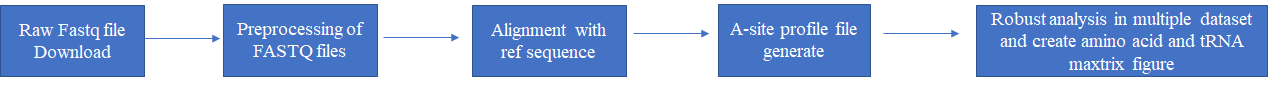

#### Raw fastq file - 
Download fastq file from SRA server

#### Processed fastq file - 
Filter out low quality reads. Many tools available to filter process. We used Standard processed which is given into respected research paper

#### Alignment - 
The processed reads were first aligned to the ribosomal RNA sequences using Bowtie 2 (v2.2.5). The
unaligned reads were then aligned to the Saccharomyces cerevisiae assembly (UCSC: sacCer3) using Tophat (v2.1.1)

#### A-site profile - 
A-site profile generated though in house generated webtool 'Ribo-Seq A-site Identifier' (https://a-site.vmhost.psu.edu/)

#### Robust analysis in multiple dataset - 
This part done by in house generated tool 'Asite_IP_method' (https://github.com/nabeel-bioinfo/Asite_IP_method) 


# List of data used in this study

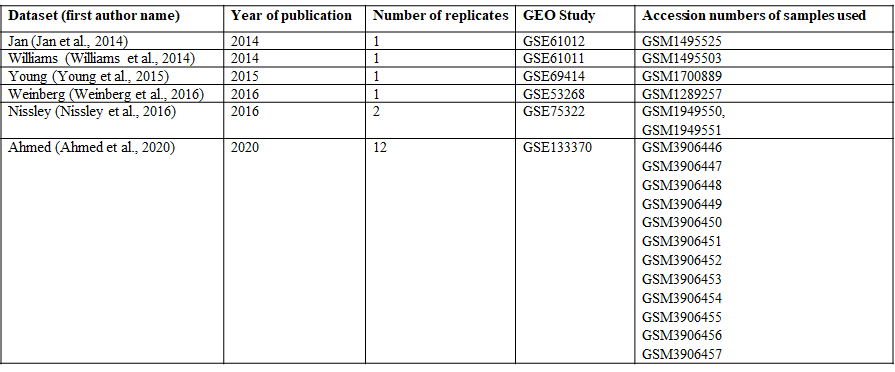


1. Jan, C. H., Williams, C. C., & Weissman, J. S. (2014). Principles of ER cotranslational translocation revealed by proximity-specific ribosome profiling. Science, 346(6210).

2. Williams, C. C., Jan, C. H., & Weissman, J. S. (2014). Targeting and plasticity of mitochondrial proteins revealed by proximity-specific ribosome profiling. Science, 346(6210), 748-751.

3. Young, D. J., Guydosh, N. R., Zhang, F., Hinnebusch, A. G., & Green, R. (2015). Rli1/ABCE1 recycles terminating ribosomes and controls translation reinitiation in 3′ UTRs in vivo. Cell, 162(4), 872-884.

4. Weinberg, D. E., Shah, P., Eichhorn, S. W., Hussmann, J. A., Plotkin, J. B., & Bartel, D. P. (2016). Improved ribosome-footprint and mRNA measurements provide insights into dynamics and regulation of yeast translation. Cell reports, 14(7), 1787-1799.

5. Nissley, D. A., Sharma, A. K., Ahmed, N., Friedrich, U. A., Kramer, G., Bukau, B., & O’Brien, E. P. (2016). Accurate prediction of cellular co-translational folding indicates proteins can switch from post-to co-translational folding. Nature communications, 7(1), 1-13.


6. Ahmed, N., Friedrich, U. A., Sormanni, P., Ciryam, P., Bukau, B., Kramer, G., & O'Brien, E. P. (2020). Pairs of amino acids at the P-and A-sites of the ribosome predictably and causally modulate translation-elongation rates. bioRxiv.

During A-site profile generation for all dataset only filtration part was different after that alignment with ref sequence, generating A-site profile and Robustness analysis was same for all dataset.


# Filtration

For all dataset use cutadapt (v 1.14) and Prinseq (PRINSEQ-lite v 0.20.4) tool for preprocess.

#### Jan dataset
$ cutadapt -a CTGTAGGCACCATCAAT --minimum-length 20 --maximum-length 45 -o 6 

#### Williams dataset

$ cutadapt -a CTGTAGGCACCATCAAT --minimum-length 20 --maximum-length 45 -o 6

#### Young dataset

$ cutadapt -a CTGTAGGCACCATCAAT --minimum-length 20 -M 45 -O 6 -q 20 


#### Nissley1 dataset

$ cutadapt -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG 

$ prinseq-lite.pl -min_len 20 -min_qual_score 20

#### Nissley2 dataset

$ cutadapt -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG 

$ prinseq-lite.pl -min_len 20 -min_qual_score 20

#### Weinberg dataset

$ cutadapt -a TCGTATGCCGTCTTCTGCTTG --cut 8 --minimum-length 12 -O 1 

$ prinseq-lite.pl -min_qual_score 15 


#### Ahmed dataset
$ cutadapt -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 

# Alignment

After filtration process alignment was done same for all. First, we will align with rRNA seq to remove unwanted sequence with Bowtie2. After that unaligned fastq file align with species reference sequence.

$ bowtie2 -q -p 12 -x Bowtie2_index_rRNA/rRNA -U processed.fastq -S output.sam --un unaligned_output.fastq --al aligned_output.fastq

$ tophat2 -a 4 -i 50 -I 5000 -g 20 -p 12 -o ./ --no-novel-juncs --no-coverage-search Bowtie2Index/genome unaligned_output.fastq

Finally we will get accepted hit bam file. This file we will use further for A-site profile generation.

# A-site profile generation

A-site profile generated through in house developed webtool (https://a-site.vmhost.psu.edu/). First, Bam file was uploaded and click on get A-site profiles. After that select the parameter and run for get A-site profile.  

#### Parameter used for generating A-site profile generation.
Fragment size - 24 to 34

Offset profile for all dataset 


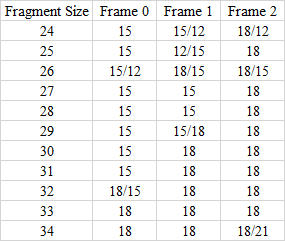

# How the pairs of amino acids at the P- and A-sites of the ribosome  modulate translation-elongation rates
This tool will help us to analysis translation speed at A-site, and we can identity how of the amino acids and tRNA’s at the A- and P-sites can influence translation speed. 

This tool divided into three part.

1. Calculating Translation time for A-site and P-site.
2. Create matrix A-site and P-site matrix file
3. Read tRNA and amino acid robust matrix and create matrix figure

 ## If packages is not install


module load python

conda create -n sra-toolkit python=3

source activate sra-toolkit

(sra-toolkit) $ conda install -c bioconda sra-tools -y

(sra-toolkit) $ source deactivate


.
.
.
.
.

module purge

module load python/2.7.14-anaconda5.0.1

conda create -n bio_env -y

source activate bio_env

conda install -c bioconda tophat

conda install -c bioconda prinseq

conda install -c bioconda trimmomatic

conda install -c bioconda biopython

conda install -c bioconda scipy

source deactivate

# Download Raw file and alignment with reference sequence

### Specify all file and parameters

In [1]:
#give destination path for whole process
path = '/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/'

#List of dataset
dataset = ['Jan','Williams']


#dataset = ['Jan','Williams','Young','Weinberg','Nissley1','Nissley2','Ahmed_YHR_REP1','Ahmed_YHR_REP2','Ahmed_YHR_REP3',
#           'Ahmed_YHR_REP4','Ahmed_YOL-A_REP1','Ahmed_YOL-A_REP2','Ahmed_YOL-A_REP3','Ahmed_YOL-A_REP4','Ahmed_YOL-B_REP1',
#           'Ahmed_YOL-B_REP2','Ahmed_YOL-B_REP3','Ahmed_YOL-B_REP4']

#SRR number for all dataset
sra_data = {'Jan':['SRR1562913'],
            'Williams':['SRR1562880','SRR1562879'],
            'Young':['SRR2046315','SRR2046316'],
            'Weinberg':['SRR1049521'],
            'Nissley1':['SRR2954348','SRR2954349','SRR2954350','SRR2954351'],
            'Nissley2':['SRR2954352','SRR2954353','SRR2954354','SRR2954355'],
            'Ahmed_YHR_REP1':['SRR9602893','SRR9602894','SRR9602895','SRR9602896','SRR9602897','SRR9602898','SRR9602899'],
            'Ahmed_YHR_REP2':['SRR9602900','SRR9602901','SRR9602902','SRR9602903','SRR9602904','SRR9602905','SRR9602906'],
            'Ahmed_YHR_REP3':['SRR9602907','SRR9602908','SRR9602909','SRR9602910','SRR9602911','SRR9602912','SRR9602913'],
            'Ahmed_YHR_REP4':['SRR9602914','SRR9602915','SRR9602916','SRR9602917','SRR9602918','SRR9602919','SRR9602920'],
            'Ahmed_YOL-A_REP1':['SRR9602921','SRR9602922','SRR9602923','SRR9602924','SRR9602925','SRR9602926','SRR9602927'],
            'Ahmed_YOL-A_REP2':['SRR9602928','SRR9602929','SRR9602930','SRR9602931','SRR9602932','SRR9602933','SRR9602934'],
            'Ahmed_YOL-A_REP3':['SRR9602935','SRR9602936','SRR9602937','SRR9602938','SRR9602939','SRR9602940','SRR9602941'],
            'Ahmed_YOL-A_REP4':['SRR9602942','SRR9602943','SRR9602944','SRR9602945','SRR9602946','SRR9602947','SRR9602948'],
            'Ahmed_YOL-B_REP1':['SRR9602949','SRR9602950','SRR9602951','SRR9602952','SRR9602953','SRR9602954','SRR9602955'],
            'Ahmed_YOL-B_REP2':['SRR9602956','SRR9602957','SRR9602958','SRR9602959','SRR9602960','SRR9602961','SRR9602962'],
            'Ahmed_YOL-B_REP3':['SRR9602963','SRR9602964','SRR9602965','SRR9602966','SRR9602967','SRR9602968','SRR9602969'],
            'Ahmed_YOL-B_REP4':['SRR9602970','SRR9602971','SRR9602972','SRR9602973','SRR9602974','SRR9602975','SRR9602976']}



#first value for cutadapt and second value for prinseq
filter_process = {'Jan':[' -a CTGTAGGCACCATCAAT --discard-untrimmed --minimum-length 20 --maximum-length 45 -q 20 '],
                  'Williams':[' -a CTGTAGGCACCATCAAT --discard-untrimmed --minimum-length 20 --maximum-length 45  '],
                 'Young':[' -a CTGTAGGCACCATCAAT --discard-untrimmed --minimum-length 20 -M 45 -O 6 -q 20 '],
                 'Weinberg':[' -a TCGTATGCCGTCTTCTGCTTG --cut 8 --minimum-length 12 -O 1 ',' -min_qual_score 15 '],
                 'Nissley1':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --discard-untrimmed ',' -min_len 20 -min_qual_score 20 '],
                 'Nissley2':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG -O 1 --minimum-length 20 ',' -min_qual_score 25 '],
                 'Ahmed_YHR_REP1':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 '],
                 'Ahmed_YHR_REP2':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 '],
                 'Ahmed_YHR_REP3':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 '],
                 'Ahmed_YHR_REP4':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 '],
                 'Ahmed_YOL-A_REP1':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 '],
                 'Ahmed_YOL-A_REP2':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 '],
                 'Ahmed_YOL-A_REP3':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 '],
                 'Ahmed_YOL-A_REP4':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 '],
                 'Ahmed_YOL-B_REP1':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 '],
                 'Ahmed_YOL-B_REP2':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 '],
                 'Ahmed_YOL-B_REP3':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 '],
                 'Ahmed_YOL-B_REP4':[' -a CTGTAGGCACCATCAATTCGTATGCCGTCTTCTGCTTG --minimum-length 20 -O 1 -q 15 ']}


# rRNA index folder path
rRNA_index = '/gpfs/group/epo2/default/nks5512/data/Bowtie2_index_rRNA/rRNA'

# ref genome index folder path
genome_index  = '/gpfs/group/epo2/default/nks5512/data/Bowtie2Index/genome'

#annotation file path
annotation_file_CDS_info = '/gpfs/group/epo2/default/nks5512/data/CDS_info.tab'

#ref seq file path
fasta_file = "/gpfs/group/epo2/default/nks5512/data/sacCer3_R64-2-1_genome.fa"

#Intronic gene list
Intronic_gene_list = '/gpfs/group/epo2/default/nks5512/data/intronic_genes.p'

#Overlap gene list
Overlap_gene_list = '/gpfs/group/epo2/default/nks5512/data/overlap_genes.p'

# convert gene nucleotide to codon for every gene
codon_type_dic = '/gpfs/group/epo2/default/nks5512/data/codon_type_dict.p'

#offset table path for A-site file generation
offset_file = "/gpfs/group/epo2/default/nks5512/data/A-site_offsets_pop.tab"

# 358 gene list to see robustness in data, This 358 gene data will be use to generate final amino acid metrix and tRNA matrix
Genelist_Williams_data = '/gpfs/group/epo2/default/nks5512/data/Genelist_Williams_data.tab'

# Threshold value for data (eg. Threshold value 4 for 6 data)
threshold_value = 1


#Minimum Maximum fragmentation 
Min_fragmentation = 24
Max_fragmentation = 34

print('\nDone')


Done


In [ ]:
from __future__ import division
import numpy as np
import math
import os
import pickle
from optparse import OptionParser
import matplotlib.backends.backend_pdf as pdf
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.table import Table
import sys
import statsmodels.sandbox.stats.multicomp as mc
import operator as op
from matplotlib.ticker import FormatStrFormatter
from time import localtime, strftime
import itertools
from matplotlib import rcParams
import shutil
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)
import multiprocessing
import time

### Define function for PBS file generation and monitor job

In [3]:
import os
import numpy as np
import sys
import subprocess

######################################################################################
def monitor_jobs(jobids):
    
    import time

    status = 'Queued'
    #print(jobids)
    #print('Monitoring Job status for: ', *jobids)
    
    #jobids = ','.join(jobids)
    #print(jobids)
    jobids = jobids.split(' ')
    #print(jobids)
    #job_status = []
    for i in jobids:
      #print(i)
      proc = subprocess.Popen('qstat ' + i, shell=True, stdout=subprocess.PIPE)
      #print(proc)
      output = proc.stdout.read()
      #print(output)
      jobstat = output.decode('utf-8')
      #print(jobstat)
      jobstat = jobstat.split()[-2]
      if jobstat == 'R':
        status = 'Running'
      elif jobstat == 'Q':
        status = 'Queued'
      elif jobstat == 'C':
        status = 'Completed'
      elif jobstat == 'S':
        status = 'Suspended'
      #job_status.append(status)

    return status


def chkList(lst): 
    if len(lst) < 0 : 
        res = True
    res = all(ele == 'Completed' for ele in lst) 
      
    if(res): 
        #print("Equal")
        all_status = "Equal"
    else: 
        #print("Not equal") 
        all_status = "Not equal"
    return all_status


def create_pbs(path,file_name,fastq_file,rRNA_index,genome_index,filter_process):
    
    #fastq_file = ','.join(fastq_file)
    #fastq_file = fastq_file.split(',')
    
    with open(path +'/'+ file_name+"_alingment.pbs", "w") as pfile:           
        pfile.write('#directives for PBS\n') 
        pfile.write('#!/bin/bash \n')
        pfile.write('#PBS -l walltime=24:00:00 \n')
        pfile.write('#PBS -l nodes=1:ppn=12 \n')
        pfile.write('#PBS -l mem=30gb \n')
        pfile.write('#PBS -j oe\n')
        pfile.write('#PBS -A epo2_f_g_sc_default \n\n') 
        pfile.write('cd '+path+'/ \n\n')
        pfile.write('module purge \n')
        pfile.write('module load python/2.7.14-anaconda5.0.1 \n')
        pfile.write('source activate bio_env  \n\n')
        pfile.write('echo "...started at $(date)" \n\n')
        
        #print(len(filter_process[file_name]))
        if len(filter_process[file_name]) == 1:
               pfile.write('cutadapt '+filter_process[file_name][0]+' -o output.fastq '+fastq_file+' > report.txt \n')
               pfile.write("cat output.fastq | awk '{if(NR%4==2) print length($1)}' | sort -n | uniq -c > read_length.txt \n")
               pfile.write("bowtie2 -q -p 12 -x "+rRNA_index+" -U output.fastq -S output.sam --un unaligned_output.fastq --al aligned_output.fastq \n")
               
 
        else:
               pfile.write('cutadapt '+filter_process[file_name][0]+' -o output.fastq '+fastq_file+' > report.txt \n')
               pfile.write('prinseq-lite.pl '+filter_process[file_name][1]+' -fastq output.fastq -out_format 3 -out_good filtered \n')
               pfile.write("cat filtered.fastq | awk '{if(NR%4==2) print length($1)}' | sort -n | uniq -c > read_length.txt \n")
               pfile.write("bowtie2 -q -p 12 -x "+rRNA_index+" -U filtered.fastq -S output.sam --un unaligned_output.fastq --al aligned_output.fastq \n")
        
        pfile.write('tophat -a 4 -i 50 -I 5000 -g 20 -p 12 -o ./ --no-novel-juncs --no-coverage-search '+genome_index+' unaligned_output.fastq \n\n')
        pfile.write('echo "...ended at $(date)" \n')
        pfile.write('####### ^---- JOB COMMANDS ABOVE ----^  \n')
        
        
    alingment_pbs_file_name = path +'/'+ file_name+"_alingment.pbs"
    bam_file_path = path +'/accepted_hits.bam'
    return alingment_pbs_file_name, bam_file_path
               
               
def raw_file_download(path,file_name,sra_file_name):
    with open(path +'/'+ file_name+".pbs", "w") as pfile:           
        pfile.write('#directives for PBS\n') 
        pfile.write('#!/bin/bash \n')
        pfile.write('#PBS -l walltime=24:00:00 \n')
        pfile.write('#PBS -l nodes=1:ppn=12 \n')
        pfile.write('#PBS -l mem=30gb \n')
        pfile.write('#PBS -j oe\n')
        pfile.write('#PBS -A epo2_f_g_sc_default \n\n') 
        pfile.write('cd '+path+' \n\n')
        pfile.write('module load python \n')
        pfile.write('source activate sra-toolkit \n\n')
        pfile.write('echo "...started at $(date)" \n\n')
        pfile.write('prefetch '+sra_file_name+' > srr_downlaod_result.text \n')
        
        list_for_fasq_dump = ''
        sra_file_name = sra_file_name.split(' ')
        for sra_file in sra_file_name:
            #sra_file = sra_file.split(' ')
            #print(sra_file)
            list_for_fasq_dump+=sra_file+'/'+sra_file+'.sra '
        #print(list_for_fasq_dump)
        
        pfile.write('fastq-dump '+list_for_fasq_dump+'\n')
        pfile.write('cat SRR*fastq > '+file_name+'_merged.fastq  \n\n')
        pfile.write('echo "...ended at $(date)" \n')
        pfile.write('####### ^---- JOB COMMANDS ABOVE ----^  \n')
    pfile.close
    pbs_file_name = path +'/'+ file_name+".pbs"
    fastq_merged_file = path +'/'+file_name+'_merged.fastq'
    
    return pbs_file_name, fastq_merged_file

print('\nDone')


Done


### Create PBS file and download raw fastq file

In [4]:
# Download fastq file
#print(sra_data['Williams'])
dataset_len = len(dataset)
print(dataset_len)
data_count = 1
n=0
jobid_list = []
fastq_file_list = []
id_path = dict()
for data in dataset:
    try:
        os.makedirs(path+data)
    except OSError:
        print("Creation of the directory %s failed")
    else:
        print("Successfully created the directory %s ")
        
    print(sra_data[data])
    sra_list = ' '.join(sra_data[data])
    
    file_path = path+data
    pbs_file_name, fastq_merged_file = raw_file_download(file_path,data,sra_list)
    print(pbs_file_name)
    print(fastq_merged_file)
    fastq_file_list.append(fastq_merged_file)
    print('data_count ',data_count)
    print('dataset_len',dataset_len)
    if data_count == dataset_len:
        proc = subprocess.Popen('qsub '+pbs_file_name, shell=True, stdout=subprocess.PIPE)
        output = proc.stdout.read()
        job_data = output.split(b'.')[0]
        jobID = str(job_data.decode('utf-8'))
        jobID_int = int(jobID)
        id_path[jobID_int] =file_path+','+data+','+sra_list
        print('id_path = ',id_path)
        jobid_list.append(jobID)
        #print('monitor_jobs',monitor_jobs(jobid_list))
        status = ''
        d=0
        jobid_len = len(jobid_list)
        while d < 1:
            n +=1
            if jobid_len > 1:
                for id in jobid_list:
                    #print(id)
                    monitor_status = monitor_jobs(id)
                    #print('monitor_status', monitor_status)
                    status = monitor_status
                    #print(status)
                    jobid_len = len(jobid_list)
                    if status == 'Completed':
                        #jobid_list.remove(id)
                        #jobid_len = len(jobid_list)
                        id_detail = id_path[int(id)]
                        id_detail = id_detail.split(',')
                        #print(id_detail[0])
                        #print(id_detail[1])
                        #print(id_detail[2])
                        #id_loc = id_path[int(id)]
                        srr_file_download_loc = id_detail[0]+'/'+'srr_downlaod_result.text'
                        file_read = open(srr_file_download_loc, 'r')
                        for line in file_read:
                            print(line)
                            if 'err' in line or 'failed' in line:
                                #jobid_list.remove(id)
                                pbs_file_name, fastq_merged_file = raw_file_download(id_detail[0],id_detail[1],id_detail[2])
                                proc = subprocess.Popen('qsub '+pbs_file_name, shell=True, stdout=subprocess.PIPE)
                                output = proc.stdout.read()
                                job_data = output.split(b'.')[0]
                                jobID = str(job_data.decode('utf-8'))
                                jobid_list.append(jobID)
                                jobid_len = len(jobid_list)
                            else:
                                pass
                        jobid_list.remove(id)
                        jobid_len = len(jobid_list)

                        

            else:
                for id in jobid_list:
                    monitor_status = monitor_jobs(id)
                    #print('monitor_status', monitor_status)
                    status = monitor_status
                    #print('2')
                    if status == 'Completed':
                        id_detail = id_path[int(id)]
                        id_detail = id_detail.split(',')
                        #print(id_detail[0])
                        #print(id_detail[1])
                        #print(id_detail[2])
                        #id_loc = id_path[int(id)]
                        srr_file_download_loc = id_detail[0]+'/'+'srr_downlaod_result.text'
                        file_read = open(srr_file_download_loc, 'r')
                        for line in file_read:
                            print(line)
                            if 'err' in line or 'failed' in line:
                                #jobid_list.remove(id)
                                pbs_file_name, fastq_merged_file = raw_file_download(id_detail[0],id_detail[1],id_detail[2])
                                proc = subprocess.Popen('qsub '+pbs_file_name, shell=True, stdout=subprocess.PIPE)
                                output = proc.stdout.read()
                                job_data = output.split(b'.')[0]
                                jobID = str(job_data.decode('utf-8'))
                                jobid_list.append(jobID)
                                jobid_len = len(jobid_list)
                                d-=1
                            else:
                                pass
                        jobid_list.remove(id)
                        jobid_len = len(jobid_list)
                        d+=1
            
        print('complete')
    else:
        proc = subprocess.Popen('qsub '+pbs_file_name, shell=True, stdout=subprocess.PIPE)
        output = proc.stdout.read()
        job_data = output.split(b'.')[0]
        jobID = str(job_data.decode('utf-8'))
        jobID_int = int(jobID)
        id_path[jobID_int] =file_path+','+data+','+sra_list
        jobid_list.append(jobID)
    data_count+=1   

    n+=1

print('\nDone')

2
Creation of the directory %s failed
['SRR1562913']
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Jan/Jan.pbs
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Jan/Jan_merged.fastq
data_count  1
dataset_len 2
Creation of the directory %s failed
['SRR1562880', 'SRR1562879']
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Williams/Williams.pbs
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Williams/Williams_merged.fastq
data_count  2
dataset_len 2
id_path =  {20710777: '/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Jan,Jan,SRR1562913', 20710778: '/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Williams,Williams,SRR1562880 SRR1562879'}


2020-07-21T21:26:46 prefetch.2.10.0: 'SRR1562913' is a local non-kart file



2020-07-21T21:26:46 prefetch.2.10.0: 'SRR1562880' is a local non-kart file



2020-07-21T21:26:46 prefetch.2.10.0: 'SRR1562879' is 

### Create PBS file and run for alingment

In [29]:
# create PBS file and run for alingment
dataset_len = len(dataset)
print(dataset_len)
data_count = 1
n=0
jobid_list = []
fastq_file_index = 0
bam_file_list = []
for data in dataset:
    print('data_count ',data_count)
    print('dataset_len',dataset_len)
    file_path = path+data
    
    if data_count == dataset_len:
        alingment_pbs_file_name, bam_file_path = create_pbs(file_path,data,fastq_file_list[fastq_file_index],rRNA_index,genome_index,filter_process)
        print(bam_file_path)
        bam_file_list.append(bam_file_path)
        print(alingment_pbs_file_name)
        proc = subprocess.Popen('qsub '+alingment_pbs_file_name, shell=True, stdout=subprocess.PIPE)
        output = proc.stdout.read()
        job_data = output.split(b'.')[0]
        jobID = str(job_data.decode('utf-8'))
        jobid_list.append(jobID)
        print(jobid_list)
        status = ''
        d=0
        jobid_len = len(jobid_list)
        while d < 1:
            n +=1
            if jobid_len > 1:
                for id in jobid_list:
                    #print(id)
                    monitor_status = monitor_jobs(id)
                    #print('monitor_status', monitor_status)
                    status = monitor_status
                    #print(status)
                    jobid_len = len(jobid_list)
                    if status == 'Completed':
                        jobid_list.remove(id)
                        jobid_len = len(jobid_list)

            else:
                for id in jobid_list:
                    monitor_status = monitor_jobs(id)
                    #print('monitor_status', monitor_status)
                    status = monitor_status
                    #print('2')
                    if status == 'Completed':
                        d+=1
            
            
        print('complete')
    else:
        alingment_pbs_file_name, bam_file_path = create_pbs(file_path,data,fastq_file_list[fastq_file_index],rRNA_index,genome_index,filter_process)
        print(bam_file_path)
        bam_file_list.append(bam_file_path)
        print(alingment_pbs_file_name)        
        proc = subprocess.Popen('qsub '+alingment_pbs_file_name, shell=True, stdout=subprocess.PIPE)
        output = proc.stdout.read()
        job_data = output.split(b'.')[0]
        jobID = str(job_data.decode('utf-8'))
        jobid_list.append(jobID)

    fastq_file_index+=1
    data_count+=1
    n+=1

    
print('\nDone')

2
data_count  1
dataset_len 2
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Jan/accepted_hits.bam
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Jan/Jan_alingment.pbs
data_count  2
dataset_len 2
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Williams/accepted_hits.bam
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Williams/Williams_alingment.pbs
['20701455', '20701456']
complete
done


# A-site profile calculation

If packages is not install

module load python

mkdir conda_env

cd conda_env/

conda create -y --prefix $PWD

source activate $PWD

conda install -y biopython

conda install -y scipy

source deactivate

## A-site profile calculation - Nabeel source code used here

In [4]:
### defined funtion for A-site profile
from __future__ import division
import logging
from optparse import OptionParser
from Bio import SeqIO
import sys
import subprocess
import os
import shutil
from collections import OrderedDict
import numpy as np
import scipy.stats as stat

logger = None
 
CODON_TYPES = ['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA',
               'GUG', 'UCU', 'UCC', 'UCA', 'UCG', 'CCU', 'CCC', 'CCA', 'CCG', 'ACU', 'ACC', 'ACA', 'ACG', 'GCU', 'GCC',
               'GCA', 'GCG', 'UAU', 'UAC', 'CAU', 'CAC', 'CAA', 'CAG', 'AAU', 'AAC', 'AAA', 'AAG', 'GAU', 'GAC', 'GAA',
               'GAG', 'UGU', 'UGC', 'UGG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGU', 'AGC', 'AGA', 'AGG', 'GGU', 'GGC', 'GGA',
               'GGG', 'UAA', 'UAG', 'UGA']

genetic_code = {'UUU': 'F', 'UCU': 'S', 'UAU': 'Y', 'UGU': 'C', 'UUC': 'F', 'UCC': 'S', 'UAC': 'Y', 'UGC': 'C',
                'UUA': 'L', 'UCA': 'S', 'UAA': '*', 'UGA': '*', 'UUG': 'L', 'UCG': 'S', 'UAG': '*', 'UGG': 'W',
                'CUU': 'L', 'CCU': 'P', 'CAU': 'H', 'CGU': 'R', 'CUC': 'L', 'CCC': 'P', 'CAC': 'H', 'CGC': 'R',
                'CUA': 'L', 'CCA': 'P', 'CAA': 'Q', 'CGA': 'R', 'CUG': 'L', 'CCG': 'P', 'CAG': 'Q', 'CGG': 'R',
                'AUU': 'I', 'ACU': 'T', 'AAU': 'N', 'AGU': 'S', 'AUC': 'I', 'ACC': 'T', 'AAC': 'N', 'AGC': 'S',
                'AUA': 'I', 'ACA': 'T', 'AAA': 'K', 'AGA': 'R', 'AUG': 'M', 'ACG': 'T', 'AAG': 'K', 'AGG': 'R',
                'GUU': 'V', 'GCU': 'A', 'GAU': 'D', 'GGU': 'G', 'GUC': 'V', 'GCC': 'A', 'GAC': 'D', 'GGC': 'G',
                'GUA': 'V', 'GCA': 'A', 'GAA': 'E', 'GGA': 'G', 'GUG': 'V', 'GCG': 'A', 'GAG': 'E', 'GGG': 'G'}

AMINO_ACIDS = ['A', 'R', 'D', 'N', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*']

MULTIPLE_MAPPED_GENE_READ_COUNTS_FILE = "Multiple_mapped_gene_read_counts.tab"


def processBamFile(folder,
                   bam_file):
    
    file_name, ext = os.path.splitext(bam_file)
    if ext == ".sam":
        # input file is already a sam file
        return bam_file
        
    try:
        sam_file = os.path.join(folder, 'samfile.sam')
        with open(sam_file, "w") as file:
            subprocess.run(["samtools", "view", bam_file], stdout=file, shell=False)        
    except Exception:
        message = 'Samtools failed. Check the input bam file.'
        logger.error(message)
        raise Exception(message)

    return sam_file

def processAnnotationFile(folder, species,
                         annotation_file):
    file_name, ext = os.path.splitext(annotation_file)
    
    if ext == '.gff' or ext == '.gff3':
        outfile = os.path.join(folder, "cds_info.tab")
        if species == 'yeast':
            process_gff_sacCer3(annotation_file, outfile)
        elif species == 'ecoli':
            process_gff_ecoli(annotation_file, outfile)
        else:
            message = 'GFF file is only accepted for sacCer3 and E.coli.'
            logger.error(message)
            raise Exception(message)
    else:
        outfile = annotation_file
        
    return outfile


def samparser_genome(sfile, frag_min, frag_max, three_prime):
    # Parse the SAM file and quantify mapped reads to chromosome positions.
    dict_count = {}  # This dictionary will contain the count values and other attributes for every genomic position
    dict_mul_count = {}  # This dictionary will contain the count values of multiple mapped reads
    dict_total = {}
    # Multiple mapped reads are counted separately and if they are greater than certain % of total reads mapped on a gene, that gene will not be considered for analysis
    frag_range = frag_max - frag_min + 1
    read_count = 0
    mul_read_count = 0
    if three_prime:
        logger.info('Mapping reads by 3\' end...')
    else:
        logger.info('Mapping reads by 5\' end...')
    counter = 0
    # Open the SAM file and parse the mapped reads according to chromosome positions, read length and strand
    with open(sfile) as sam_file:
        for line in sam_file:
            # Ignore header files
            if line[0] != '@':
                fields = line.split('\t')
                if len(fields) > 19:
                    multi_flag = fields[19].strip()  # Sometimes there are "NH:i:1\n"
                    # If the read has more than one alignment then report it as multiple mapping
                    if multi_flag != 'NH:i:1':
                        multi_align = True
                    else:
                        multi_align = False
                else:
                    multi_align = False
                sam_flag = int(fields[1])
                chr_no = fields[2]
                read_length = len(fields[9])

                if sam_flag in (0, 256):
                    # Assuming no insertions and deletions
                    # If mapping by 3' end
                    if three_prime:
                        position = int(fields[3]) + read_length - 1
                    # If mapping by 5' end
                    else:
                        position = int(fields[3])

                elif sam_flag in (16, 272):
                    # If mapping by 3' end
                    if three_prime:
                        position = int(fields[3])
                    # If mapping by 5' end
                    else:
                        position = int(fields[3]) + read_length - 1

                # Initialize the dict if not done already
                if chr_no not in dict_count:
                    dict_count[chr_no] = {}
                    dict_total[chr_no] = 0
                # Initialize an array of zeroes corresponding to reads of different lengths. Two values for each length representing the positive and negative strands
                # The last two zeroes will correspond to multiple aligned reads according to strand
                if position not in dict_count[chr_no]:
                    dict_count[chr_no][position] = [0] * (frag_range * 2 + 2)

                # If read is multiple mapped, then initialize the multiple count dict as well
                if multi_align: 
                    if chr_no not in dict_mul_count:
                        dict_mul_count[chr_no] = {}
                    if position not in dict_mul_count[chr_no]:
                        dict_mul_count[chr_no][position] = [0] * (frag_range * 2 + 2)

                pos_in_value = (read_length - frag_min) * 2
                # Count the read according to its length and strand
                if frag_min <= read_length <= frag_max:
                    try:
                        if sam_flag == 0:  # Primary alignment on forward strand
                            if multi_align:
                                # Multiple mapped reads are counted separately
                                dict_count[chr_no][position][-2] += 1
                                dict_mul_count[chr_no][position][pos_in_value] += 1
                                mul_read_count += 1
                            else:    
                                dict_count[chr_no][position][pos_in_value] += 1
                                dict_total[chr_no] += 1
                                read_count += 1
                            
                        elif sam_flag == 16:  # Primary alignment on reverse strand
                            if multi_align:
                                # Multiple mapped reads are counted separately. Last two columns are initialized for mul mapped reads for +ve and -ve strands respectively
                                dict_count[chr_no][position][-1] += 1
                                dict_mul_count[chr_no][position][pos_in_value + 1] += 1
                                mul_read_count += 1
                            else:
                                dict_count[chr_no][position][pos_in_value + 1] += 1
                                dict_total[chr_no] += 1
                                read_count += 1
                        # Not primary alignment. It will counted under multiple aligned reads
                        elif sam_flag == 256:
                            position = int(fields[3])
                            dict_count[chr_no][position][-2] += 1
                            dict_mul_count[chr_no][position][pos_in_value] += 1

                        elif sam_flag == 272:  # Not primary alignment and on reverse strand
                            position = int(fields[3]) + read_length - 1
                            dict_count[chr_no][position][-1] += 1
                            dict_mul_count[chr_no][position][pos_in_value + 1] += 1
                    except KeyError:
                        logger.error("KeyError in parsing sam file. Line %d: %s" % (counter, line))
            counter += 1

    logger.info('SAM file parsed with %d reads mapped onto %d chromosomes.' % (read_count, len(dict_count)))
    logger.info('%d reads are multiple mapped to %d chromosomes.' % (mul_read_count, len(dict_mul_count)))

    return dict_count, dict_mul_count


def samparser_transcriptome(sfile, frag_min, frag_max, three_prime):
    # Parse the SAM file and quantify mapped reads to chromosome positions.
    dict_count = {}  # This dictionary will contain the count values and other attributes for every genomic position
    dict_mul_count = {}  # This dictionary will contain the count values of multiple mapped reads
    total_count = {}
    # Multiple mapped reads are counted separately and if they are greater than 0.1% of total reads mapped on a gene, that gene will not be considered for analysis
    frag_range = frag_max - frag_min + 1
    read_count = 0
    mul_read_count = 0
    discarded_reads = 0
    if three_prime:
        logger.info('Mapping reads by 3\' end...')
    else:
        logger.info('Mapping reads by 5\' end...')
    counter = 0
    with open(sfile) as sam_file:
        for line in sam_file:
            # Ignore header files
            if line[0] != '@':
                fields = line.split('\t')
                sam_flag = int(fields[1])
                gene = fields[2]
                # if gene not in filtered_genes:
                #     continue
                if len(fields) > 19:
                    multi_flag = fields[19].strip()  # Sometimes there are "NH:i:1\n"
                    # If the read has more than one alignment then report it as multiple mapping
                    if multi_flag != 'NH:i:1':
                        multi_align = True
                    else:
                        multi_align = False
                else:
                    multi_align = False

                read_length = len(fields[9])
                pos_in_value = (read_length - frag_min)
                if gene not in dict_count:
                    dict_count[gene] = {}
                    total_count[gene] = 0
                # If mapping by 3' end
                if three_prime:
                    position = int(fields[3]) + read_length - 1
                # If mapping by 5' end
                else:
                    position = int(fields[3])
                if position not in dict_count[gene]:
                    dict_count[gene][position] = [0] * (frag_range + 1)
                if multi_align:
                    if gene not in dict_mul_count:
                        dict_mul_count[gene] = {}
                    if position not in dict_mul_count[gene]:
                        dict_mul_count[gene][position] = [0] * (frag_range + 1)

                if frag_min <= read_length <= frag_max:
                    try:
                        if sam_flag == 0:  # Primary alignment on forward strand
                            if multi_align:
                                # Multiple mapped reads are counted separately
                                dict_count[gene][position][-1] += 1
                                dict_mul_count[gene][position][pos_in_value] += 1
                                mul_read_count += 1
                            else:
                                dict_count[gene][position][pos_in_value] += 1
                                read_count += 1
                                total_count[gene] += 1
                        # Not primary alignment. It will counted under multiple aligned reads
                        elif sam_flag == 256:
                            dict_count[gene][position][-1] += 1
                            dict_mul_count[gene][position][pos_in_value] += 1
                        elif sam_flag == 16:
                            discarded_reads += 1

                    except KeyError:
                        logger.error("KeyError in parsing sam file. Line %d: %s" % (counter, line))
            counter += 1
    logger.info('SAM file parsed with %d reads mapped onto %d genes.' % (read_count, len(dict_count)))
    logger.info('%d reads are multiple mapped to %d genes.' % (mul_read_count, len(dict_mul_count)))
    logger.info('%d reads were mapped spuriously.' % discarded_reads)
    return dict_count, dict_mul_count, total_count


def create_cds_counts_transcriptome(idx_file, seq_file, folder, sam_count_dict, dict_mul_count, total_count, frag_min, frag_max, three_prime, fast_mode=True):
    frag_range = frag_max - frag_min + 1
    mul_gene_list = []
    dict_mul_genes = {}
    dict_len = {}
    idx_dict = {}
    dict_count_len = {}
    dict_mul_count_len = {}
    # These dicts will contain dicts of genes and their read counts (as lists) according to fragment length
    for fsize in range(frag_min, frag_max + 1):
        dict_count_len[fsize] = {}

    with open(idx_file) as f:
        for lines in f:
            fields = lines.strip().split('\t')
            # fields = [gene name, CDS start position, CDS length]
            idx_dict[fields[0]] = [int(fields[1]), int(fields[2])]

    seq_dict = {}

    for seq_record in SeqIO.parse(seq_file, "fasta"):
        gene_id = str(seq_record.id).split(' ')[0]
        seq_dict[gene_id] = seq_record.seq

    dict_start = {}
    logger.info('Starting to make the CDS table...')
    for gene in sam_count_dict:
        try:
            start_pos, cds_len = idx_dict[gene]
        except KeyError:
            logger.warn('No index available for gene %s. Skip.' % gene)
            continue
        # gene_count_file.write(gene + '\t' + str(total_count[gene]) + '\t' + str(cds_len) + '\n')

        if start_pos in [0, -1]:
            logger.warn('No UTR region for gene %s. Skip.' % gene)
            continue
        # If a gene has very sparse reads, it is better to leave it out as it will not meet the filtering criteria.
        # below criteria states that avg is less than 1. This is done for faster processing.
        if fast_mode and total_count[gene] < cds_len:
            continue
        dict_len[gene] = cds_len
        multi_genes = 'N'
        start_utr = -start_pos
        cds_pos = start_utr
        for pos in range(1, len(seq_dict[gene]) + 1):
            # for pos in sorted(sam_count_dict[gene]):
            nuc = seq_dict[gene][pos - 1]
            # We are not interested in positions beyond 50 nt around the CDS region. Hence we skip these positions
            if cds_pos < -50 or cds_pos > cds_len + 50:
                cds_pos += 1
                continue
            if cds_pos == 0:
                cds_pos += 1
            try:
                count_list = sam_count_dict[gene][pos][0:frag_range]
            except KeyError:
                count_list = [0] * frag_range

            try:
                multi_aligned = sam_count_dict[gene][pos][-1]
            except KeyError:
                multi_aligned = 0

            try:
                if multi_aligned > 0:
                    mul_count_list = dict_mul_count[gene][pos][0:frag_range]
            except KeyError:
                mul_count_list = [0] * frag_range

            # We will create dictionaries with fragment length as keys and dict of gene with list of read counts at every position as our values
            for fsize in range(frag_min, frag_max + 1):
                if gene not in dict_count_len[fsize]:
                    dict_count_len[fsize][gene] = []
                    dict_start[gene] = cds_pos
                dict_count_len[fsize][gene].append(count_list[fsize - frag_min])

            if multi_aligned > 0 and gene not in mul_gene_list:
                mul_gene_list.append(gene)
                if gene not in dict_mul_genes:
                    dict_mul_genes[gene] = {}
            if multi_aligned > 0:
                dict_mul_genes[gene][cds_pos] = ['X', cds_len, nuc, 'transcriptome', pos, multi_aligned, multi_genes] + mul_count_list
                # As done for actual counts, multiple mapped reads are counted according to fragment length
                for fsize in range(frag_min, frag_max + 1):
                    if gene not in dict_mul_count_len:
                        dict_mul_count_len[gene] = {}
                    if fsize not in dict_mul_count_len[gene]:
                        dict_mul_count_len[gene][fsize] = {0: 0, 1: 0, 2: 0}
                    if cds_pos < 0:
                        frame = cds_pos % 3
                    else:
                        frame = cds_pos % 3 - 1
                        if frame == -1:
                            frame = 2
                    if three_prime:
                        pos_range = range(1, cds_len + frag_max)
                    else:
                        pos_range = range(-frag_max, cds_len)
                    if cds_pos in pos_range:
                        dict_mul_count_len[gene][fsize][frame] += mul_count_list[fsize - frag_min]

            cds_pos += 1

    # Write out the number of mutliple mapped reads for each gene according to fragment size and frame. For each fragment size, write the reads for frame 0, 1 and 2.
    mul_out_file = open(os.path.join(folder,MULTIPLE_MAPPED_GENE_READ_COUNTS_FILE), 'w')

    for gene in dict_mul_count_len:
        mul_out_file.write(str(gene))
        for fsize in range(frag_min, frag_max + 1):
            for frame in range(3):
                mul_out_file.write('\t' + str(dict_mul_count_len[gene][fsize][frame]))
        mul_out_file.write('\n')
    mul_out_file.close()

    for fsize in range(frag_min, frag_max + 1):
        count_file = open(os.path.join(folder, 'Read_counts_' + str(fsize) + '.tab'), 'w')
        for gene, reads_list in dict_count_len[fsize].items():
            start_pos, cds_len = idx_dict[gene]
            start_idx = dict_start[gene]
            # Writing the read count for transcripts
            count_file.write(gene + '\t' + str(start_idx) + '\t' + str(cds_len) + '\t' + ','.join(map(str, reads_list)) + '\n')
        count_file.close()


def create_cds_counts_genome(data_name, annotation_file, genome, folder, sam_parsed_count_dict, dict_mul_count, frag_min, frag_max, three_prime, extra_overlap, remove_overlapped_genes=True):
    # This module will take the count dictionary parsed from the sam file containing the read counts at each genomic position and map it to gene positions
    dict_gene, dict_cds_count, dict_cds_info, genome_dict, overlap_genes, dict_len = cdsparser(annotation_file, genome, extra_overlap=extra_overlap)

    dict_count_len = {}
    dict_mul_count_len = {}
    # These dicts will contain dicts of genes and their read counts (as lists) according to fragment length
    for fsize in range(frag_min, frag_max + 1):
        dict_count_len[fsize] = {}

    counter = 0

    # For every gene in the dataset
    for gene_name in dict_cds_count:
        chr_num, strand = dict_gene[gene_name]
        frag_range = frag_max - frag_min + 1
        try:
            gene_length = dict_len[gene_name]
        except KeyError:
            logger.warn('KeyError in length calculation on gene %s. Skip.' % str(gene_name))
            continue

        # dict_cds_info contains lists of CDS start and end positions as a list. For example if there are two exons for a gene X
        # dict_cds_info['X'] = [[111234, 111345],[112122,112543]]
        # We get reads at 50 nt around the first cds position and the last cds position and update these lists
        dict_cds_info[gene_name][0][0] -= 50
        dict_cds_info[gene_name][-1][1] += 50
        # Gene position index
        gene_position_start = -50
        # For -ve strand, this will be start of position as they go in opposite direction
        gene_position_end = gene_length + 50
        for k in dict_cds_info[gene_name]:
            for pos in range(k[0], k[1] + 1):
                if gene_position_start == 0:
                    gene_position_start += 1
                if gene_position_end == 0:
                    gene_position_end += -1

                try:
                    counts_list = sam_parsed_count_dict[chr_num][pos][0:frag_range * 2]
                except KeyError:
                    # sam_parsed_count_dict is initialized only for genes with read counts.
                    # Positions with zero reads will lead to KeyErrors and we assign zero value to this position
                    counts_list = [0] * (frag_range * 2)
                # check if this position has multiple aligned reads
                if chr_num not in dict_mul_count:
                    pass
                elif pos in dict_mul_count[chr_num]:
                    mul_count_list = dict_mul_count[chr_num][pos][0:frag_range * 2]

                if strand == '+':
                    try:
                        multi_mapped = sam_parsed_count_dict[chr_num][pos][-2]
                    except KeyError:
                        multi_mapped = 0
                    # Get the read counts on the positive strand
                    strand_counts = counts_list[0::2]
                    if multi_mapped > 0:
                        # If there are multiple mapped reads at this position, get the read counts for those multiple mapped reads
                        mul_strand_counts = mul_count_list[0::2]
                    # For positive strand, the current position in "for" loop is from gene start side
                    current_pos = gene_position_start

                elif strand == '-':
                    try:
                        multi_mapped = sam_parsed_count_dict[chr_num][pos][-1]
                    except KeyError:
                        multi_mapped = 0

                    # Get the read counts on the negative strand
                    strand_counts = counts_list[1::2]
                    if multi_mapped > 0:
                        mul_strand_counts = mul_count_list[1::2]
                    current_pos = gene_position_end

                # We will create dictionaries with fragment length as keys and dict of gene with list of read counts at every position as our values
                for fsize in range(frag_min, frag_max + 1):
                    if gene_name not in dict_count_len[fsize]:
                        dict_count_len[fsize][gene_name] = []
                    dict_count_len[fsize][gene_name].append(strand_counts[fsize - frag_min])

                if multi_mapped > 0:
                    mul_mapped_reads = 0
                    # As done for actual counts, multiple mapped reads are counted according to fragment length
                    for fsize in range(frag_min, frag_max + 1):
                        if gene_name not in dict_mul_count_len:
                            dict_mul_count_len[gene_name] = {}
                        if fsize not in dict_mul_count_len[gene_name]:
                            dict_mul_count_len[gene_name][fsize] = {0: 0, 1: 0, 2: 0}
                        if current_pos < 0:
                            frame = current_pos % 3
                        else:
                            frame = current_pos % 3 - 1
                            if frame == -1:
                                frame = 2
                        if three_prime:
                            pos_range = range(1, gene_length + frag_max)
                        else:
                            pos_range = range(-frag_max, gene_length)
                        if current_pos in pos_range:
                            dict_mul_count_len[gene_name][fsize][frame] += mul_strand_counts[fsize - frag_min]
                            mul_mapped_reads += mul_strand_counts[fsize - frag_min]
                    if mul_mapped_reads == 0:
                        del dict_mul_count_len[gene_name]

                if strand == '-':
                    gene_position_end += -1
                if strand == '+':
                    gene_position_start += 1
        counter += 1

    # Determine the percentage of reads which are multiple mapped to a gene and discard it if it is greater than the threshold set for multiple map filter.
    # This is done specific to each fragment size
    frag_min_str = str(frag_min)
    frag_max_str = str(frag_max)
    mul_out_file = open(os.path.join(folder, data_name+'_Multiple_mapped_gene_read_counts_'+frag_min_str+'_'+frag_max_str+'.tab'), 'w')

    for gene in dict_mul_count_len:
        mul_out_file.write(gene)
        for fsize in range(frag_min, frag_max + 1):
            for frame in range(3):
                mul_out_file.write('\t' + str(dict_mul_count_len[gene][fsize][frame]))
        mul_out_file.write('\n')
    mul_out_file.close()

    for fsize in range(frag_min, frag_max + 1):
        count_file = open(os.path.join(folder, 'Read_counts_' + str(fsize) + '.tab'), 'w')
        for gene, reads_list in dict_count_len[fsize].items():
            chr_num, strand = dict_gene[gene]
            length = dict_len[gene]
            if remove_overlapped_genes and gene in overlap_genes:
                continue
            if strand == '-':
                # For negative strand, read count were appended from the opposite end
                reads_list = reversed(reads_list)
            count_file.write(gene + '\t-50\t' + str(length) + '\t' + ','.join(map(str, reads_list)) + '\n')
        count_file.close()


# Parse the genome reference file
def read_fasta(genome_file):
    chrom, sequence = None, []
    for line in genome_file:
        line = line.rstrip()  # Removing any trailing whitespace characters
        if line.startswith(">"):
            if chrom:
                yield (chrom, ''.join(sequence))
            chrom, sequence = line, []
        else:
            sequence.append(line)  # Appends each sequence line to list. Finally joins in at the end of chromosome
    if chrom:
        yield (chrom, ''.join(sequence))


# Parse the GFF file to get the positions and no. of CDS regions in a gene.
# Important data structures: dictcdscount and dictcdsinfo
def process_gff_sacCer3(gff, outfile):
    dictgene = {}  # Contains gene names as keys and their start and end positions as a list of values
    dictcdscount = {}  # Contains gene names as keys and no. of cds regions(exons) for that particular gene
    dictcdsinfo = {}  # Contains the start and end positions of the cds regions as list of lists
    
    with open(gff) as gff_file:
        for line in gff_file:
            line_list = line.strip().split('\t')
            if line.startswith('chr'):
                left_pos = int(line_list[3])
                right_pos = int(line_list[4])
                chrnum = line_list[0]
                strand = line_list[6]
                if line_list[2] == 'CDS':
                    cds_annotation = line_list[8]
                    # This is for sacCer3 genome annotation file
                    cds_name = cds_annotation.split(';')[0].split('=')[1].split('_')[0]
                    # cds_name = cds_annotation.split(';')[0].split('=')[1]
                    if cds_name not in dictcdscount:
                        dictcdscount[cds_name] = 1
                        dictcdsinfo[cds_name] = []
                    else:
                        dictcdscount[cds_name] += 1
                    dictgene[cds_name] = [chrnum, strand]
                    dictcdsinfo[cds_name].append([left_pos, right_pos])
             
    dict_len = {}
    for gene, cds_positions in dictcdsinfo.items():
        length_total = 0
        for each_pos in cds_positions:
            length_total += each_pos[1] - each_pos[0] + 1
        dict_len[gene] = length_total
    
    with open(outfile, "w") as cds_file:
        for gene in dictcdsinfo:
            chrnum, strand = dictgene[gene]
            #  Gene name  Chr number Strand  Length of gene (CDS regions only) No of CDS regions
            cds_file.write(gene + '\t' + chrnum + '\t' + strand + '\t' + str(dict_len[gene]) + '\t' + str(dictcdscount[gene]))
            # Start and end of each CDS region
            for cds in dictcdsinfo[gene]:
                cds_file.write('\t' + str(cds[0]) + '\t' + str(cds[1]))
            cds_file.write('\n')


def process_gff_ecoli(gff, outfile):
    dictgene = {}  # Contains gene names as keys and their start and end positions as a list of values
    dictcdsinfo = {}  # Contains the start and end positions of the cds regions as list of lists
    dict_psuedo = {}
    dict_len = {}

    with open(gff) as gff_file:
        for line in gff_file:
            line_list = line.strip().split('\t')
            if not line.startswith('##'):
                try:
                    left_pos = int(line_list[3])
                    right_pos = int(line_list[4])
                    strand = line_list[6]
                    chrom = line_list[0]
                    if line_list[2] == 'gene':
                        gene_anno = line_list[8]
                        fields = gene_anno.split(';')
                        gene_info = {}
                        for field in fields:
                            fd = field.split('=')
                            gene_info[fd[0]] = fd[1]
                        gene_name = gene_info['ID']
                        if 'pseudo' in gene_info:
                            if gene_info['pseudo'] == 'true':
                                dict_psuedo[gene_name] = [left_pos, right_pos, strand]
                                continue
                            else:
                                dictgene[gene_name] = [left_pos, right_pos, gene_info]
                        else:
                            dictgene[gene_name] = [left_pos, right_pos, gene_info]
                    if line_list[2] == 'CDS':
                        cds_annotation = line_list[8]
                        fields = cds_annotation.split(';')
                        cds_info = {}
                        for field in fields:
                            fd = field.split('=')
                            cds_info[fd[0]] = fd[1]
                        gene_alias = cds_info['Parent']
                        if gene_alias in dict_psuedo or 'pseudo' in cds_info:
                            continue
                        if gene_alias in dictgene:
                            cds_name = dictgene[gene_alias][2]['locus_tag']

                            if left_pos != dictgene[gene_alias][0]:
                                logger.info('CDS for gene %s does not start at gene start. The cds start is at %d and gene start is at %d.' % (cds_name, left_pos, dictgene[gene_alias][0]))
                                continue
                                
                            if right_pos != dictgene[gene_alias][1]:
                                logger.info('CDS for gene %s does not stop at gene stop. The cds stop is at %d and gene stop is at %d.' % (cds_name, right_pos, dictgene[gene_alias][1]))
                                continue
                            
                            if cds_name in dictcdsinfo:
                                logger.info('Second CDS present for gene %s.' % cds_name)
                            
                            dictcdsinfo[cds_name] = [left_pos, right_pos, strand]
                            dict_len[cds_name] = right_pos - left_pos + 1
                        else:
                            logger.info('Gene %s only has CDS annotation.' % gene_alias)
                       
                except IndexError:
                    logger.warn('Something might be wrong in the GFF file. Line: %s.' % line)
    with open(outfile, 'w') as cds_file:
        for gene in dictcdsinfo:
            left_pos, right_pos, strand = dictcdsinfo[gene]
            cds_file.write(gene + '\t' + str(chrom) + '\t' + str(strand) + '\t' + str(dict_len[gene]) + '\t1\t' + str(left_pos) + '\t' + str(right_pos) + '\n')

def cdsparser(annot_file, genome, extra_overlap=0):
    dict_cds_count = {}
    dict_cds_info = {}
    dict_len = {}
    dict_gene_info = {}

    with open(annot_file) as f:
        for lines in f:
            fields = lines.strip().split('\t')
            gene, chrnum, strand, length, count = fields[:5]
            dict_cds_count[gene] = int(count)
            dict_len[gene] = int(length)
            dict_gene_info[gene] = [chrnum, strand]
            dict_cds_info[gene] = []
            for i in range(5, len(fields), 2):
                dict_cds_info[gene].append([int(fields[i]), int(fields[i + 1])])

    genomedict = {}  # This dictionary contains chromosomes (chrI, chrII, etc) as keys and the sequence as its value
    with open(genome) as fp:
        for name, seq in read_fasta(fp):
            genomedict[name[1::]] = seq
    # Get the list of genes which have overlapping cds regions
    overlap_genes = find_overlapping_genes(dict_cds_info, dict_gene_info, extra_len=extra_overlap)

    return dict_gene_info, dict_cds_count, dict_cds_info, genomedict, overlap_genes, dict_len


# Find overlapping genes from a CDS dictionary of genes
def find_overlapping_genes(dict_cds_info, dict_gene, extra_len=0):
    dict_search_overlap = {}
    dict_overlap = {}
    overlap_list = []

    for gene_name in dict_cds_info:
        chrnum, strand = dict_gene[gene_name]
        # Left most position
        leftpos = int(dict_cds_info[gene_name][0][0])
        # Right most position
        rightpos = int(dict_cds_info[gene_name][-1][1])
        # Comparing the boundaries of individual transcripts
        try:
            regions = dict_search_overlap[chrnum]
            for gene in regions:

                if strand == gene[3]:
                    if leftpos - extra_len < gene[2] and rightpos + extra_len > gene[1]:
                        dict_overlap[gene[0]] = [chrnum, gene[1], gene[2], strand, gene_name, leftpos, rightpos, strand]
                        dict_overlap[gene_name] = [chrnum, leftpos, rightpos, strand, gene[0], gene[1], gene[2], strand]
            dict_search_overlap[chrnum].append([gene_name, leftpos, rightpos, strand])
        except KeyError:
            dict_search_overlap[chrnum] = [[gene_name, leftpos, rightpos, strand]]

    for gene, info in dict_overlap.items():
        overlap_list.append(gene)
    overlap_list.sort()

    return overlap_list


def generate_asite_profiles(frag_min, frag_max, offsets, scratch, folder, three_prime,data_name):
    # Current support only for quantified read counts from 5' end. Offset from 3' end can be implemented.

    dict_len = {}
    read_count_dict = {}
    # We parse the files for each fragment size which contain the read counts aligned by 5' end for CDS region along with a certain length before and beyond the CDS
    for fsize in range(frag_min, frag_max + 1):
        read_count_dict[fsize] = {}
        with open(os.path.join(scratch, 'Read_counts_' + str(fsize) + '.tab')) as count_file:
            for lines in count_file:
                fields = lines.strip().split('\t')
                gene = fields[0]
                start_index, length = int(fields[1]), int(fields[2])
                reads_list = list(map(int, fields[3].split(',')))
                dict_len[gene] = length
                read_count_dict[fsize][gene] = {}
                # We start by counting all the read counts listed from the starting index before the start position to similar length beyond stop position
                for i in range(start_index, abs(start_index)+length):
                    # Since there is no zero position, the listed value will shift directly from -1 to 1. So we need to add 1 here to properly index
                    if i >= 0:
                        try:
                            read_count_dict[fsize][gene][i+1] = reads_list[i - start_index]
                        except IndexError:
                            pass
                    else:
                        read_count_dict[fsize][gene][i] = reads_list[i - start_index]
    logger.info('Parsed the CDS read counts.')

    # Now we generate the A-site profiles according to offsets for specific fragment size and frames
    asite_dict = {}
    for fsize in range(frag_min, frag_max+1):
        for gene in read_count_dict[fsize]:
            if gene not in asite_dict:
                asite_dict[gene] = {}
            asite = [0] * dict_len[gene]
            for pos in sorted(read_count_dict[fsize][gene]):
                # First step is to get the frame of the nucleotide position. Have to careful before the start position
                if pos > 0:
                    frame = pos % 3 - 1  # 0 ,1 ,-1
                if pos < 0:
                    frame = (pos + 1) % 3 - 1  # 0,1,-1
                # the frame 2 is where we get the value of -1
                if frame == -1:
                    frame = 2
                try:
                    offset = int(offsets[fsize][frame])
                # Fsize and frame combinations with ambigious offsets will be of type '15/18' and hence will give value error. They will made offset=0
                except ValueError:
                    logger.warn = 'Ambigious offset provided for generating A-site profiles. Fragment size: %d, frame: %d, offset: %s. Skip.' % (fsize, frame, offsets[fsize][frame])
                    offset = 0
                except IndexError:
                    logger.warn = 'IndexError when getting offsets in generating A-site profiles. Fragment size: %d, frame: %d. Skip.' % (fsize, frame)
                    offset = 0

                if three_prime:
                    if offset != 0:
                        # Only those pos after length of CDS matter when offseted map to a position in CDS
                        if 0 < pos - offset - 1 < len(asite):
                            # -1 because the Asite profile is a list with index 0
                            asite[pos - offset - 1] += read_count_dict[fsize][gene][pos]
                else:
                    if offset != 0:
                        # Only those pos before 0 matter when offseted map to a position in CDS
                        if pos < 0 <= pos+offset < len(asite):
                            asite[pos+offset] += read_count_dict[fsize][gene][pos]
                        elif pos > 0 and pos+offset-1 < len(asite):
                            # -1 because the Asite profile is a list with index 0
                            asite[pos+offset-1] += read_count_dict[fsize][gene][pos]
            # This dictionary will store for every gene the A-site profiles for each fragment size
            asite_dict[gene][fsize] = asite

    # Output file for A-site profiles
    with open(os.path.join(folder, data_name+'_A-site_profiles.tab'), 'w') as asite_file:
        for gene in asite_dict:
            # This adds up the read count at every position from all fragment sizes for every gene
            asite_profile = [sum(x) for x in zip(*asite_dict[gene].values())]
            asite_file.write(gene + '\t' + str(dict_len[gene]) + '\t' + ','.join(map(str, asite_profile)) + '\n')
    

# Using cutoffs for all possible frag sizes
def select_high_cov_genes(folder, frag_min, frag_max, threshold, three_prime, filter_file, include):

    mul_map_file = os.path.join(folder, MULTIPLE_MAPPED_GENE_READ_COUNTS_FILE)
    # Parsing the cds file and getting the length of each gene transcript
    dict_length = {}
    # get the read dict for every gene according to fragment size and at each gene position
    reads_dict = {}
    # A dict containing the total number of reads mapped to a gene
    total_reads = {}
    for fsize in range(frag_min, frag_max + 1):
        if fsize not in reads_dict:
            reads_dict[fsize] = {}
        with open(os.path.join(folder, 'Read_counts_' + str(fsize) + '.tab')) as f:
            for lines in f:
                line_list = lines.strip().split('\t')
                gene_name = line_list[0]
                if gene_name not in reads_dict[fsize]:
                    reads_dict[fsize][gene_name] = {}
                start_index = int(line_list[1])
                gene_len = int(line_list[2])
                if gene_name not in dict_length:
                    dict_length[gene_name] = gene_len
                count_list = map(int, line_list[3].split(','))
                if gene_name not in total_reads:
                    total_reads[gene_name] = 0
                idx = start_index
                for val in count_list:
                    if three_prime:
                        # For 3' end alignments, we include mapped reads upto fragment size length beyond the stop codon
                        if 1 <= idx <= gene_len + fsize:
                            reads_dict[fsize][gene_name][idx] = val
                            total_reads[gene_name] += val
                    else:
                        # We will count reads from fsize positions before the start position upto the last nt position of the gene
                        if -fsize <= idx <= gene_len:
                            reads_dict[fsize][gene_name][idx] = val
                            total_reads[gene_name] += val
                    idx += 1
                    if idx == 0:
                        idx += 1

    logger.info('Parsed read counts for all fragment sizes.')

    # Get the number of mul mapped reads to decide whether to delete the gene or not. If a gene has more than 0.1% of reads multiple mapped, we delete it
    mul_map_dict = {}
    mul_map_gene_reads = {}
    with open(mul_map_file) as f:
        for lines in f:
            line_list = lines.strip().split('\t')
            gene_name = line_list[0]
            read_counts = list(map(int, line_list[1:]))
            mul_map_gene_reads[gene_name] = sum(read_counts)
            idx = 0
            for fsize in range(frag_min, frag_max + 1):
                if fsize not in mul_map_dict:
                    mul_map_dict[fsize] = {}
                mul_map_dict[fsize][gene_name] = {0: read_counts[idx], 1: read_counts[idx + 1], 2: read_counts[idx + 2]}
                idx += 3

        # List of all genes which have > 1% mul mapped reads and hence will not be considered
        mul_map_genes = []
        for gene in mul_map_gene_reads:
            if mul_map_gene_reads[gene] > 0 and gene in total_reads:
                # If the gene is not in total reads, it must be overlapping gene. Skip.
                perc_mul_map = float(mul_map_gene_reads[gene]) * 100 / float(mul_map_gene_reads[gene] + total_reads[gene])
                if perc_mul_map > 1:
                    mul_map_genes.append(gene)
    logger.info('Parsed the multiple mapped read counts.')
    dict_gene = {}
    good_genes = {}
    good_genes_mul_map = {}

    # If the IP algorithm has to be applied for a selected subset of genes, they must be loaded from a text file here. If include option is false, these genes will be excluded
    if filter_file:
        filter_genes = True
        select_genes = []
        with open(filter_file) as f:
            for lines in f:
                fields = lines.strip().split('\t')
                gene = fields[0]
                select_genes.append(gene)
    else:
        filter_genes = False

    logger.info('Starting to select genes for each fragment size and frame...')
    for fsize in range(frag_min, frag_max + 1):
        good_genes[fsize] = {}
        good_genes_mul_map[fsize] = {}
        for frame in range(3):
            good_genes[fsize][frame] = []
            good_genes_mul_map[fsize][frame] = []
        for gene_name, dict_reads in reads_dict[fsize].items():
            # If we want to exclude or include a set of genes
            if filter_genes:
                # If the include boolean is false, we will exclude the genes in the list select_genes
                if not include and gene_name in select_genes:
                    continue
                # Include only those genes which  are in the list select_genes
                elif include and gene_name not in select_genes:
                    continue
            if gene_name not in dict_gene:
                dict_gene[gene_name] = {}
                for size in range(frag_min, frag_max + 1):
                    dict_gene[gene_name][size] = {}
            reads = []

            try:
                short_utr = False
                # 5' end
                if not three_prime:
                    start = -fsize
                    end = dict_length[gene_name] + 1
                else:
                    start = 1
                    end = dict_length[gene_name] + fsize + 1
                for k in range(start, end):
                    # Ignoring since there is no zero position
                    if k == 0:
                        continue
                    try:
                        reads.append(dict_reads[int(k)])
                    except KeyError:
                        logger.warn("KeyError appending the number of reads for gene %s position %d length %d when selecting genes for fragment size %d." % (gene_name, k, dict_length[gene_name], fsize))
                        short_utr = True
            except KeyError:
                logger.warn('Length not available for gene %s when selecting genes for fragment size %d.' % (gene_name, fsize))
                short_utr = False
            for frame in range(3):
                if three_prime:
                    ref = reads[frame::3]

                else:
                    # The extra number of nucleotides on one side of CDS
                    if short_utr:
                        extra_s = min(dict_reads)
                        if extra_s < 12:
                            continue
                    else:
                        extra_s = fsize
                    # and then choose the reads in positions of multiples of 3 according to the frame
                    ref = reads[extra_s % 3 + frame::3]
                    # select the reads of the given 5' end frame  # last_off is -fsize. That many positions will be left out from the right side of the list (after gene ending)
                if gene_name in mul_map_genes:
                    mul_map_ref = mul_map_dict[fsize][gene_name][frame]

                avg_reads = np.mean(ref)

                dict_gene[gene_name][fsize][frame] = (sum(ref), len(ref), avg_reads)
                if avg_reads > threshold:
                    if gene_name in mul_map_genes:
                        try:
                            perc_mul_map_fs_fr = float(mul_map_ref) * 100 / float(mul_map_ref + sum(ref))
                        except ZeroDivisionError:
                            perc_mul_map_fs_fr = 0
                        if perc_mul_map_fs_fr > 1:
                            good_genes_mul_map[fsize][frame].append(gene_name)
                        else:
                            good_genes[fsize][frame].append(gene_name)
                    else:
                        good_genes[fsize][frame].append(gene_name)

    filtered_cds_dict = {}
    for i in range(frag_min, frag_max + 1):
        filtered_cds_dict[i] = {}
        for frame in range(3):
            filtered_cds_dict[i][frame] = {}
    for fsize in filtered_cds_dict:
        for frame in range(3):
            for name in good_genes[fsize][frame]:
                filtered_cds_dict[fsize][frame][name] = reads_dict[fsize][name]
    return filtered_cds_dict, dict_length


def asite_algorithm_improved_second_offset_correction(reads_dict, 
                                                      dict_len, 
                                                      frag_min, 
                                                      frag_max, 
                                                      folder, 
                                                      offset_threshold, 
                                                      off_correction_threshold, 
                                                      three_prime,
                                                      get_coverage_stats=True, 
                                                      advanced=True, 
                                                      conserve_frame=True, 
                                                      bootstrap=False, 
                                                      cov_range=(1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 45, 50)):
    # Used for debugging
    offset_dic = {}
    correction_dic = {}
    details = {}
    debug_details = {}

    for frame in range(3):
        details[frame] = {}
        debug_details[frame] = {}

    # The following dict will contain meta gene for every gene in every fsize and frame. The meta-data include no. of zeros, perc zeros, avg, avg at start and avg at end
    sum_total = {}
    dict_cov_info = {}
    # Initialize files for all fragment size and frame combinations
    for fsize in range(frag_min, frag_max + 1):
        dict_cov_info[fsize] = {}
        sum_total[fsize] = {}
        for frame in range(3):
            dict_cov_info[fsize][frame] = {}
            sum_total[fsize][frame] = 0

    # MAIN ANALYSIS STARTS HERE
    for fsize in range(frag_min, frag_max + 1):
        # The following will be used as an index in the read dictionary for each gene
        last_off = -fsize

        for frame in range(3):
            if frame not in offset_dic:
                offset_dic[frame] = {}
                correction_dic[frame] = {}
            if fsize not in offset_dic[frame]:
                offset_dic[frame][fsize] = {}
            '''
            FOLLOWING CODE FOR GENES IN EVERY FSIZE AND FRAME
            '''
            for gene in reads_dict[fsize][frame]:
                skip_gene = False
                short_utr = False

                """
                ***  PARSING THE READ VALUES   ***
                """
                # The following will be reads dictionary with nucleotide position as key and number of reads as value
                dict_reads = reads_dict[fsize][frame][gene]

                reads = []
                try:
                    # 5' end
                    if not three_prime:
                        start = -fsize
                        end = dict_len[gene] + 1
                    # For 3' end, we get the reads at the CDS nucleotide positions as well as fsize length after the end of CDS
                    else:
                        start = 1
                        end = dict_len[gene] + fsize + 1

                    for k in range(start, end):
                        # Ignoring since there is no zero position
                        if k == 0:
                            continue
                        try:
                            reads.append(dict_reads[k])
                        except KeyError:
                            logger.warn('KeyError in reads dictionary for %s at position %d with gene length %d in main analysis.' % (gene, k, dict_len[gene]))
                            short_utr = True
                            if k > 0:
                                skip_gene = True
                                logger.warn('Skip gene %s.' % gene)
                                # Using break instead of continue as this will break the inner for loop and continue the outer for loop
                                break
                except KeyError:
                    # Length not available for this gene
                    skip_gene = True
                    logger.warn('KeyError in length dictionary for gene %s in main analysis.' % gene)

                if skip_gene:
                    # If gene does not have proper read values, we will not consider it for analysis and hence we remove it and move to next gene in the for loop
                    continue
                # The extra number of nucleotides on one side of CDS
                if short_utr:
                    extra_s = min(dict_reads)
                    if extra_s < 12:
                        continue
                else:
                    extra_s = fsize

                if three_prime:
                    ref = [0] * frame
                    for r in reads[frame::3]:
                        ref += [r, 0, 0]
                else:
                    # To adjust for the len and replace zeroes for out of frame reads, we do the following. This will be followed by deletion/addition of
                    # additional zeroes to make length equal to original seq
                    ref = [0] * (extra_s % 3 + frame)
                    # Choose the reads in positions of multiples of 3 according to the frame
                    for r in reads[extra_s % 3 + frame::3]:  # select the reads of the given 5' end frame
                        ref += [r, 0, 0]
                ref = ref[:-2]  # we exclude the last [0,0] we added at the end
                if (len(reads) - len(ref)) > 0:
                    ref += (len(reads[:last_off]) - len(ref)) * [0]
                # we put it back to the original length (which might have changed when multiple of 3).
                if three_prime:
                    avg_reads = np.mean(ref[frame::3])
                else:
                    avg_reads = np.mean(ref[extra_s % 3 + frame::3])
                """
                ***    CALCULATING THE OFFSET FOR THE GENE  ***
                """
                # try:
                if conserve_frame:
                    if three_prime:
                        best_start_index, best_end_index, offset, score_per_offset = put_reads_in_orf_3_end(ref, extra_s, dict_len[gene], centre_on_p_not_on_a=False,
                                                                                                            advanced=advanced,
                                                                                                            go_three_at_a_time=True)
                    else:
                        best_start_index, best_end_index, offset, score_per_offset = put_reads_in_orf(ref, extra_s, dict_len[gene], centre_on_p_not_on_a=False,
                                                                                                      advanced=advanced, go_three_at_a_time=True)
                else:
                    # we get the offset to centre on frame 1, hence +1 and -2. (-2 is because we use the length to get to the last index by start+len,
                    # but we gave +1 to start so we need to take out an extra one to len).
                    best_start_index, best_end_index, offset, score_per_offset = put_reads_in_orf(ref, extra_s + 1, dict_len[gene] - 2, centre_on_p_not_on_a=False,
                                                                                                  advanced=advanced, go_three_at_a_time=True)

                # If secondary selection criteria is to be applied, we compare the scores of top two offset and the reads near the start codon.
                if advanced:
                    # sort the offsets based on scores.  If scores are same for two or more offsets, they will be sorted according to offset values.
                    sorted_scores = sorted(sorted(score_per_offset), key=score_per_offset.get, reverse=True)
                    # Quality check to make sure the highest offset is the same as the best offset we get from our function
                    if sorted_scores[0] != offset:
                        logger.warn('Sorted offsets do not match the offset we get from put_reads_in_orf function for gene %s in fragment size %d and frame %d.' % (gene, fsize, frame))

                    # Difference of top two offsets
                    diff = score_per_offset[offset] - score_per_offset[sorted_scores[1]]

                    # If the difference in scores is less than the avg number of reads across the gene, we apply the secondary selection criteria
                    if diff < avg_reads:
                        # Offsets wit diff less than avg will be listed in here
                        list_offsets_to_compare = []
                        # Add the top two offsets to the list of offsets to compare
                        if score_per_offset[sorted_scores[0]] >= score_per_offset[sorted_scores[1]]:
                            list_offsets_to_compare.append(sorted_scores[0])
                            list_offsets_to_compare.append(sorted_scores[1])
                            # If any other offsets down the order have equal scores with second best offset, then they get added to the list as well
                            for i in range(2, len(sorted_scores)):
                                if score_per_offset[sorted_scores[i]] == score_per_offset[sorted_scores[1]]:
                                    list_offsets_to_compare.append(sorted_scores[i])
                        # The offsets for which the condition is met will be added in here
                        off_true = []
                        # The dict will contain the difference between the average of R2, R3 and R4 and the reads in first codon R1
                        diff_dict = {}

                        # Check the secondary selection criteria of the listed offsets
                        for off in list_offsets_to_compare:
                            # quality check.
                            if off > fsize:
                                logger.warn('Unusual offset %d being considered for fsize %d frame %d in gene %s. Skip.' % (off, fsize, frame, gene))
                                continue
                            # quality check
                            if off % 3 != 0:
                                logger.warn('Unusual offset %d being considered for fsize %d frame %d in gene %s.' % (off, fsize, frame, gene))
                            # Getting the first 4 codon values in the particular offset
                            if three_prime:
                                reads_offset = reads[off:off + 12]
                            else:
                                reads_offset = reads[extra_s - off:extra_s - off + 12]
                            if not reads_offset:
                                logger.warn('Reads offset list is empty.')
                            # Checking the condition whether the R1 is less than one-fifth of the average of R2, R3 and R4
                            bool_off, diff_avg = secondary_selection_conditions(reads_offset, frame, threshold=off_correction_threshold)
                            # Adding this offset to the list if the condition is met
                            if bool_off:
                                off_true.append(off)
                                diff_dict[off] = diff_avg
                        # Select the offset which meets the secondary selection criteria
                        if len(off_true) == 1:
                            offset_correction = off_true[0]
                        # If more than one offset meets the secondary selection criteria, then choose the offset with the maximum score
                        elif len(off_true) > 1:
                            diff_compare = {}
                            # check if the scores are equal or not. If the scores are also equal, add the difference of avg(R2, R3, R4) and R1 to diff compare and
                            # choose the offset with max difference
                            max_score = score_per_offset[sorted_scores[0]]
                            for i in range(0, len(off_true)):
                                if score_per_offset[off_true[i]] == max_score:
                                    diff_compare[off_true[i]] = diff_dict[off_true[i]]
                            if len(diff_compare) > 1:
                                sorted_diff = sorted(diff_compare, key=diff_compare.get, reverse=True)
                                offset_correction = sorted_diff[0]
                            else:
                                # check if anything changes
                                # offset_correction = sorted_scores[0]
                                offset_correction = off_true[0]
                        # If no offset meets the secondary selection criteria, we let the offset with the maximum score remain the best offset.
                        # For offsets with equal scores, the smallest offset is the optimal offset
                        else:
                            offset_correction = sorted_scores[0]

                        ''' 
                        CHECK FOR OFFSET CORRECTION 
                        '''
                        # If the offset after applying secondary selection criteria is not the same as offset with top score, change the optimal offset
                        if offset_correction != offset:
                            offset = offset_correction
                        # If the offset is the same as the original one, no need to change the offset
                        elif offset_correction == offset:
                            pass
                        # If the offset correction did not yield any offset (secondary conditions not met for any offset), the initial offset remains the optimal offset
                        elif offset_correction == '':
                            pass

                # OFFSET IS ASSIGNED FOR THE GENE IN THIS FRAGMENT SIZE AND FRAME
                if not skip_gene:
                    offset_dic[frame][fsize][gene] = offset
                else:
                    continue

                if three_prime:
                    sum_total[fsize][frame] += sum(ref[frame::3])
                else:
                    sum_total[fsize][frame] += sum(ref[extra_s % 3 + frame::3])
                dict_cov_info[fsize][frame][gene] = avg_reads

    """
    ***   ANLAYSE DATA FOR DIFFERENT COVERAGE THRESHOLDS ***
    """
    if get_coverage_stats:
        # This dict will contain the bootstrapped distributions from which the error bars will be calculated
        bootstrap_dict = {}
        dict_most_prob_offsets = {}
        logger.info('Running the coverage analysis.')
        # Get coverage statistics
        for fsize in range(frag_min, frag_max + 1):
            # Needed to create the error bars for the plot for Figure 3.
            bootstrap_dict[fsize] = {}
            dict_most_prob_offsets[fsize] = {}
            for frame in range(3):
                bootstrap_dict[fsize][frame] = {}
                read_avg_dict = {}
                for off in range(0, fsize, 3):
                    bootstrap_dict[fsize][frame][off] = {}
                    read_avg_dict[off] = []
                dict_most_prob_offsets[fsize][frame] = {'off': '', 'perc': ''}
                gene_count = 0
                # Append the meta gene properties to their respective dictionaries according to the offsets
                for gene, offset in offset_dic[frame][fsize].items():
                    try:
                        # Get the meta data of each gene from the dict_cov_info dictionary
                        read_avg = dict_cov_info[fsize][frame][gene]
                    except KeyError:
                        logger.warn('KeyError for dict_cov_info in fragment size %d and frame %d. Skip.' % (fsize, frame))
                        continue
                    read_avg_dict[offset].append(read_avg)
                    gene_count += 1
                list_genes = []  # Required for bootstrapping

                for off in range(0, fsize, 3):
                    for j in read_avg_dict[off]:
                        # this is appending the offset value with the read average
                        list_genes.append((off, j))
                if len(list_genes) == 0:
                    continue

                got_offset = False
                # First list will contain the cutoff values and the second list will contain the percentage values
                trend_list = [[], []]
                for c in cov_range:
                    sum_dict, perc_dict = count_stuff_all_offsets(c, read_avg_dict, False)
                    no_of_genes = sum(sum_dict.values())
                    sorted_perc = sorted(perc_dict, key=perc_dict.get, reverse=True)
                    if not got_offset:
                        if no_of_genes >= 10:
                            if perc_dict[sorted_perc[0]] >= offset_threshold:
                                dict_most_prob_offsets[fsize][frame]['off'] = str(sorted_perc[0])
                                dict_most_prob_offsets[fsize][frame]['perc'] = str(perc_dict[sorted_perc[0]])
                                next_highest_perc = perc_dict[sorted_perc[1]]
                                next_best_off = sorted_perc[1]
                                got_offset = True
                            else:
                                dict_most_prob_offsets[fsize][frame]['off'] = str(sorted_perc[0]) + '/' + str(sorted_perc[1])
                                dict_most_prob_offsets[fsize][frame]['perc'] = str(perc_dict[sorted_perc[0]]) + '/' + str(perc_dict[sorted_perc[1]])

                        elif no_of_genes < 10 and dict_most_prob_offsets[fsize][frame]['off'] == '':
                            dict_most_prob_offsets[fsize][frame]['off'] = 'NA'
                            dict_most_prob_offsets[fsize][frame]['perc'] = str(perc_dict[sorted_perc[0]])
                    elif (perc_dict[sorted_perc[0]] == "NA" or perc_dict[sorted_perc[0]] >= offset_threshold) and no_of_genes >= 10:
                        dict_most_prob_offsets[fsize][frame]['perc'] = str(perc_dict[sorted_perc[0]])
                    if no_of_genes >= 10:
                        trend_list[0].append(c)
                        trend_list[1].append(perc_dict[sorted_perc[0]])

                # When the threshold is crossed at an higher cutoff, we do a linear trend analysis to check whether the trend is significant
                if trend_list[1] and trend_list[1][0] < offset_threshold and '/' not in dict_most_prob_offsets[fsize][frame]['off'] and 'NA' not in \
                        dict_most_prob_offsets[fsize][frame]['off']:
                    b1, b0, r, pval, std_err = stat.linregress(trend_list[0], trend_list[1])

                    if pval > 0.05:
                        dict_most_prob_offsets[fsize][frame]['off'] += '/' + str(next_best_off)
                        dict_most_prob_offsets[fsize][frame]['perc'] += '/' + str(next_highest_perc) + '(NS, slope = ' + str(np.round(b1, 3)) + ' pval =' + str(
                            np.round(pval, 3)) + ')'
                    else:
                        dict_most_prob_offsets[fsize][frame]['perc'] += '(Significant, slope = ' + str(np.round(b1, 3)) + ' pval =' + str(np.round(pval, 3)) + ')'

                if bootstrap:
                    mega_sum_dict, mega_perc_dict = bootstrap_gene_count(c, list_genes)
                    # Write the properties of the genes at each offset for eack threshold value
                    for off in range(0, fsize, 3):
                        if off not in mega_perc_dict:
                            # off was not in mega_perc_dict so adding an empty directory 
                            mega_perc_dict[off] = [0]
                        try:
                            avg = np.mean(mega_perc_dict[off])
                        except TypeError:
                            avg = 'TE'
                        if c == 1:
                            bootstrap_dict[fsize][frame][off]['avg'] = avg
                    for off in range(0, fsize, 3):
                        try:
                            se_mean = np.std(mega_perc_dict[off])
                        except TypeError:
                            se_mean = 'TE'

                        if c == 1:
                            bootstrap_dict[fsize][frame][off]['se_mean'] = se_mean
                    for off in range(0, fsize, 3):
                        try:
                            low_ci = np.percentile(mega_perc_dict[off], 2.5)
                        except TypeError:
                            low_ci = 'TE'

                        if c == 1:
                            bootstrap_dict[fsize][frame][off]['low_ci'] = low_ci
                    for off in range(0, fsize, 3):
                        try:
                            high_ci = np.percentile(mega_perc_dict[off], 97.5)
                        except TypeError:
                            high_ci = 'TE'
                        if c == 1:
                            bootstrap_dict[fsize][frame][off]['high_ci'] = high_ci
                    for off in range(0, fsize, 3):
                        if off not in mega_sum_dict:
                            # off was not in mega_sum_dict so adding an empty directory
                            mega_sum_dict[off] = [0]

    """
    ***    WRITE THE RESULTS AND PLOT DISTRIBUTION OF OFFSETS ***
    """
    outfile = open(os.path.join(folder, "A-site_offsets.tab"), "w")
    perc_file = open(os.path.join(folder, "Perc_of_genes_for_all_offsets.tab"), "w")

    outfile.write('\n\nMost probable Offsets for Fragment Size and Frame (including coverage data)\n')
    outfile.write('Frag size\tFrame_0\tFrame_1\tFrame_2\n')
    for fsize in range(frag_min, frag_max + 1):
        try:
            outfile.write(str(fsize) + '\t' + str(dict_most_prob_offsets[fsize][0]['off']) + '\t' + str(dict_most_prob_offsets[fsize][1]['off']) + '\t' + str(
                dict_most_prob_offsets[fsize][2]['off']) + '\n')
        except KeyError:
            outfile.write(str(fsize) + '\tNA\tNA\tNA\n')

    outfile.write('\n\nPerc of genes (including coverage data)\n')
    outfile.write('Frag size\tFrame_0\tFrame_1\tFrame_2\n')
    for fsize in range(frag_min, frag_max + 1):
        try:
            outfile.write(str(fsize) + '\t' + str(dict_most_prob_offsets[fsize][0]['perc']) + '\t' + str(dict_most_prob_offsets[fsize][1]['perc']) + '\t' + str(
                dict_most_prob_offsets[fsize][2]['perc']) + '\n')
        except KeyError:
            outfile.write(str(fsize) + '\tNA\tNA\tNA\n')

    outfile.write('\n\n\tNumber of genes\nFrag/Frame\t0\t1\t2\n')
    for fsize in range(frag_min, frag_max + 1):
        outfile.write(str(fsize))
        for frame in range(3):
            try:
                outfile.write('\t' + str(len(offset_dic[frame][fsize])))
            except KeyError:
                outfile.write('\tNA')
        outfile.write('\n')

    outfile.write('\n\n\tNumber of reads\nFrag/Frame\t0\t1\t2\n')
    for fsize in range(frag_min, frag_max + 1):
        outfile.write(str(fsize))
        for frame in range(3):
            outfile.write('\t' + str(sum_total[fsize][frame]))
        outfile.write('\n')

    perc_file.write('Percentage of genes\nFrag/Frame\t0\t1\t2\n')
    for fsize in range(frag_min, frag_max + 1):
        perc_file.write(str(fsize))
        for frame in range(3):
            offset_list = {}
            for off in range(0, fsize, 3):
                offset_list[off] = []
            try:
                for gene, val in offset_dic[frame][fsize].items():
                    if val in offset_list:
                        offset_list[val].append(gene)
                for off in sorted(offset_list):
                    try:
                        perc_file.write('\t' + str(float(len(offset_list[off])) * 100 / float(len(offset_dic[frame][fsize]))))
                    except KeyError:
                        perc_file.write('\tNA')
                    except ZeroDivisionError:
                        perc_file.write('\tNA')
            except KeyError:
                pass
            perc_file.write('\t')
        perc_file.write('\n')
    if bootstrap:
        perc_file.write('Perc of gene bootstrap results (AVERAGE)\nFrag\t0\t3\t6\t9\t12\t15\t18\t21\t0\t3\t6\t9\t12\t15\t18\t21\t0\t3\t6\t9\t12\t15\t18\t21\n')

        for fsize in range(frag_min, frag_max + 1):
            outfile.write(str(fsize))
            for frame in range(3):
                try:
                    for off in [0, 3, 6, 9, 12, 15, 18, 21]:
                        perc_file.write('\t' + str(bootstrap_dict[fsize][frame][off]['avg']))
                except KeyError:
                    perc_file.write('\tNA')
                perc_file.write('\t')
            perc_file.write('\n')

        perc_file.write('Perc of gene bootstrap results (SE)\nFrag\t0\t3\t6\t9\t12\t15\t18\t21\t0\t3\t6\t9\t12\t15\t18\t21\t0\t3\t6\t9\t12\t15\t18\t21\n')
        for fsize in range(frag_min, frag_max + 1):
            perc_file.write(str(fsize))
            for frame in range(3):
                try:
                    for off in [0, 3, 6, 9, 12, 15, 18, 21]:
                        perc_file.write('\t' + str(bootstrap_dict[fsize][frame][off]['se_mean']))
                except KeyError:
                    perc_file.write('\tNA')
                perc_file.write('\t')
            perc_file.write('\n')
        perc_file.write('Perc of gene bootstrap results (LOW CI)\nFrag\t0\t3\t6\t9\t12\t15\t18\t21\t0\t3\t6\t9\t12\t15\t18\t21\t0\t3\t6\t9\t12\t15\t18\t21\n')
        for fsize in range(frag_min, frag_max + 1):
            perc_file.write(str(fsize))
            for frame in range(3):
                try:
                    for off in [0, 3, 6, 9, 12, 15, 18, 21]:
                        perc_file.write('\t' + str(bootstrap_dict[fsize][frame][off]['low_ci']))
                except KeyError:
                    perc_file.write('\tNA')
                perc_file.write('\t')
            perc_file.write('\n')

        perc_file.write('Perc of gene bootstrap results (HIGH CI)\nFrag\t0\t3\t6\t9\t12\t15\t18\t21\t0\t3\t6\t9\t12\t15\t18\t21\t0\t3\t6\t9\t12\t15\t18\t21\n')
        for fsize in range(frag_min, frag_max + 1):
            perc_file.write(str(fsize))
            for frame in range(3):
                try:
                    for off in [0, 3, 6, 9, 12, 15, 18, 21]:
                        perc_file.write('\t' + str(bootstrap_dict[fsize][frame][off]['high_ci']))
                except KeyError:
                    perc_file.write('\tNA')
                perc_file.write('\t')
            perc_file.write('\n')
            
    return dict_most_prob_offsets


def count_stuff_all_offsets(count, dict_count, less=True):
    sum_dict = {}
    perc_dict = {}

    # for offset in [0,3,6,9,12,15,18,21]:

    for offset in dict_count:

        if less:
            sum_dict[offset] = sum(i < count for i in dict_count[offset])
        else:
            sum_dict[offset] = sum(i > count for i in dict_count[offset])

    for offset in dict_count:
        try:
            perc_dict[offset] = np.round(float(sum_dict[offset]) * 100 / float(sum(sum_dict.values())), 2)

        except ZeroDivisionError:
            perc_dict[offset] = 'NA'

    return sum_dict, perc_dict


#  Improved check of secondary offset correction.  Just checks the condition, whether it is valid or not
def secondary_selection_conditions(reads, frame, threshold=5):
    try:
        avg_three_codons = float(reads[3 + frame] + reads[6 + frame] + reads[9 + frame]) / 3
    except IndexError:
        logger.warn('IndexError in calculating the average of three codens. Set it to 0.')
        avg_three_codons = 0
    bool_first = False

    # The average of 2nd, 3rd and 4th codon should be greater than reads in first codon and reads in second codon must be greater in third and fourth codons
    if (avg_three_codons > threshold * reads[frame]) and (reads[3 + frame] > reads[6 + frame]):
        bool_first = True
    diff = avg_three_codons - reads[frame]

    return bool_first, diff


def put_reads_in_orf(reads, gene_start_index, gene_len, centre_on_p_not_on_a=False, advanced=True, go_three_at_a_time=False):
    """
    tries to put most of the reads in the ORF.
    Returns best_start_index, best_end_index, offset (the indices are in reads, offset is how much - in nucleotides - one should move the reads to be aligned with the A site).
     Note that if centre_on_P_not_on_A is False then best_end_index-best_start_index+1 == gene_len-3 since we exclude the first codon when we centre on the A site
     (translation initiate at with AUG in the P site).
     ASSUMES missing reads value is zero
     Assumes the offset is positive (it never moves backward.. reverse genes should be 'straightened beforehand (this happens when they are annotated with reads from parsing of
     SAM file).

    Parameters
    ----------
    go_three_at_a_time
    advanced
    centre_on_p_not_on_a
    gene_len
    gene_start_index
    reads
    """
    if not centre_on_p_not_on_a:
        # Start from second codon
        gene_start_index += 3
        # The length of gene will be counted from second codon until stop codon
        gene_len -= 3
    off = gene_start_index
    # It looks like iteration will happen in opposite direction Starting from the fragment size value+3 (since we are dealing from second codon).
    # However the offset is 0 below even though we are looking at pos with index off and off+gene_len. We are using pos indexes to get sum of the reads while offset is 0.
    reads_in_cds = sum(reads[off: off + gene_len])  # this is for the initial guessed start_index equal to gene_start_index
    score = reads_in_cds
    best_offset = off
    score_per_offset = None
    if advanced:
        score_per_offset = OrderedDict()
        # gene_start_index-off is our actual offset and now we create a dict of scores with offsets as keys
        score_per_offset[gene_start_index - off] = reads_in_cds
    # We are increasing the offset by 3 by shifting the pos indexes by -3 positions to calculate sum of reads
    if go_three_at_a_time:
        off -= 3
    else:
        off -= 1
    while off > 3:
        if go_three_at_a_time:
            reads_in_cds = reads_in_cds + sum(reads[off:off + 3]) - sum(reads[off + gene_len:off + 3 + gene_len])
        else:
            reads_in_cds = reads_in_cds + reads[off] - reads[off + gene_len]
        if advanced:
            score_per_offset[gene_start_index - off] = reads_in_cds
        if reads_in_cds > score:
            # If the read sum is greater than the best score, make it the best score and the offset
            score = reads_in_cds
            best_offset = off
        if go_three_at_a_time:
            off -= 3
        else:
            off -= 1

    return best_offset, best_offset + gene_len - 1, gene_start_index - best_offset, score_per_offset


def put_reads_in_orf_3_end(reads, fsize, gene_len, centre_on_p_not_on_a=False, advanced=True, go_three_at_a_time=False):
    """
    tries to put most of the reads in the ORF.
    Returns best_start_index, best_end_index, offset (the indices are in reads, offset is how much - in nucleotides - one should move the reads to be aligned with the A site).
     Note that if centre_on_P_not_on_A is False then best_end_index-best_start_index+1 == gene_len-3 since we exclude the first codon when we centre on the A site
     (translation initiate at with AUG in the P site).
     ASSUMES missing reads value is zero
     Assumes the offset is positive (it never moves backward.. reverse genes should be 'straightened beforehand (this happens when they are annotated with reads from parsing of
     SAM file).

    Parameters
    ----------
    go_three_at_a_time
    advanced
    centre_on_p_not_on_a
    gene_len
    fsize
    reads
    """
    if not centre_on_p_not_on_a:
        # Start from second codon
        gene_start_index = 3
        # The length of gene will be counted from second codon until stop codon
        gene_len -= 3
    off = gene_start_index
    # Iteration will happen in opposite direction. Starting from the fragment size value+3 (since we are dealing from second codon).
    # However the offset is 0 below even though we are looking at pos with index off and off+gene_len. We are using pos indexes to get sum of the reads while offset is 0.
    reads_in_cds = sum(reads[off: off + gene_len])  # this is for the initial guessed start_index equal to gene_start_index
    score = reads_in_cds
    best_offset = off
    score_per_offset = None
    if advanced:
        score_per_offset = OrderedDict()
        # gene_start_index-off is our actual offset and now we create a dict of scores with offsets as keys
        score_per_offset[gene_start_index - off] = reads_in_cds
    # We are increasing the offset by 3 by shifting the pos indexes by -3 positions to calculate sum of reads
    # if go_three_at_a_time:
    #     off += 3
    # else:
    #     off += 1
    while off < fsize:
        if go_three_at_a_time:
            reads_in_cds = reads_in_cds - sum(reads[off:off + 3]) + sum(reads[off + gene_len:off + 3 + gene_len])
        else:
            reads_in_cds = reads_in_cds + reads[off] - reads[off + gene_len]
        if go_three_at_a_time:
            off += 3
        else:
            off += 1
        if advanced:
            score_per_offset[off - gene_start_index] = reads_in_cds
        if reads_in_cds > score:
            # If the read sum is greater than the best score, make it the best score and the offset
            score = reads_in_cds
            best_offset = off

    return best_offset, best_offset + gene_len - 1, best_offset - gene_start_index, score_per_offset


def bootstrap_gene_count(cutoff, list_genes):
    mega_sum_dict = {}
    mega_perc_dict = {}
    for itr in range(1, 10001):
        # For each iteration, declare a random dict
        rand_dict = {}
        # Select randomly with replacement the indexes of the actual dict
        list_rand_idx = list(np.random.choice(range(0, len(list_genes)), size=len(list_genes)))
        # Populate the random dict with the actual value of offset and the read avg
        for l in list_rand_idx:
            offset, value = list_genes[l]
            if offset not in rand_dict:
                rand_dict[offset] = []
            # Append the gene value
            rand_dict[offset].append(value)
        # Calculate the no of genes for each offset along with the percentage of genes according to offsets for the total genes at this threshold
        sum_dict, perc_dict = count_stuff_all_offsets(cutoff, rand_dict, less=False)
        for off in [0, 3, 6, 9, 12, 15, 18, 21]:
            if off not in mega_sum_dict:
                mega_sum_dict[off] = []
                mega_perc_dict[off] = []
            try:
                mega_sum_dict[off].append(sum_dict[off])
                mega_perc_dict[off].append(perc_dict[off])
            except KeyError:
                mega_sum_dict[off].append(0)
                mega_perc_dict[off].append(0)

    return mega_sum_dict, mega_perc_dict

def set_logger(folder):
    global logger
    logger = logging.getLogger(__name__)
    handler = logging.FileHandler(os.path.join(folder, "aip.log"))
    formatter = logging.Formatter('%(asctime)s %(levelname)-8s %(message)s')
    handler.setFormatter(formatter)
    logger.addHandler(handler)
    logger.setLevel(logging.DEBUG)

def run_offset(folder, 
            species,
            bam_file, 
            annotation_file, 
            fasta_file,
            min_frag, 
            max_frag, 
            three_prime, 
            overlap, 
            threshold_avg_reads,
            threshold_gene_pct,
            threshold_start_codon,
            filter_file,
            include,
            alignment_type,
            get_profile):
    # set file logger
    set_logger(folder)
    
    # create the scratch folder    
    scratch = os.path.join(folder, "scratch")
    if not os.path.exists(scratch):
        os.makedirs(scratch, exist_ok=True)

    try:
        sam_file = processBamFile(scratch, bam_file)

        annotation_file = processAnnotationFile(scratch, species, annotation_file)

        if alignment_type == "genome" :
            count_dict, mul_count_dict = samparser_genome(sam_file, min_frag, max_frag, three_prime)
            logger.info('Parsed the SAM file. Starting to quantify CDS read counts.')
            create_cds_counts_genome(annotation_file, fasta_file, scratch, count_dict, mul_count_dict, min_frag, max_frag, three_prime, overlap)
        else:
            count_dict, mul_count_dict, total_dict = samparser_transcriptome(sam_file, min_frag, max_frag, three_prime)
            logger.info('Parsed the SAM file aligned to the transcriptome. Starting to quantify CDS read counts.')
            create_cds_counts_transcriptome(annotation_file, fasta_file, scratch, count_dict, mul_count_dict, total_dict, min_frag, max_frag, three_prime)

        # Filter genes which have greater than threshold (default=1) reads per codon on average
        filtered_genes, dataset_gene_len = select_high_cov_genes(scratch, min_frag, max_frag, threshold_avg_reads, three_prime, filter_file, include)
        logger.info('Parsed the CDS file.')

        offset_dict = asite_algorithm_improved_second_offset_correction(filtered_genes, dataset_gene_len, min_frag, max_frag, folder, threshold_gene_pct, threshold_start_codon, three_prime)

        if get_profile:
            offset_dict = {fsize: {frame: offset_dict[fsize][frame]["off"] for frame in offset_dict[fsize]} for fsize in offset_dict}
            generate_asite_profiles(min_frag, max_frag, offset_dict, scratch, folder, three_prime)
        
        # remove the scratch folder
        shutil.rmtree(scratch)
    except Exception as e:
        logger.error("Error getting A-site offsets: %s", str(e))
        # remove the scratch folder
        shutil.rmtree(scratch)
        raise e

def get_offset_dict_from_file(offset_file): 
    offsets = {}
    with open(offset_file) as f:
        for lines in f:
            fields = lines.strip().split('\t')
            offsets[int(fields[0])] = {0:fields[1], 1:fields[2], 2:fields[3]}

    return offsets


def run_profile(folder, 
                species,
                bam_file, 
                annotation_file, 
                fasta_file,
                offset_file,
                min_frag, 
                max_frag, 
                three_prime, 
                overlap, 
                alignment_type, data_name):
    # set filer logger
    set_logger(folder)
    
    # create the scratch folder    
    scratch = os.path.join(folder, "scratch")
    if not os.path.exists(scratch):
        os.makedirs(scratch, exist_ok=True)
        
    try: 
        sam_file = processBamFile(scratch, bam_file)

        annotation_file = processAnnotationFile(scratch, species, annotation_file)

        if alignment_type == "genome" :
            count_dict, mul_count_dict = samparser_genome(sam_file, min_frag, max_frag, three_prime)
            logger.info('Parsed the SAM file. Starting to quantify CDS read counts')
            create_cds_counts_genome(data_name, annotation_file, fasta_file, scratch, count_dict, mul_count_dict, min_frag, max_frag, three_prime, overlap)
        else:
            count_dict, mul_count_dict, total_dict = samparser_transcriptome(sam_file, min_frag, max_frag, three_prime)
            logger.info('Parsed the SAM file aligned to the transcriptome. Starting to quantify CDS read counts')
            create_cds_counts_transcriptome(annotation_file, fasta_file, scratch, count_dict, mul_count_dict, total_dict, min_frag, max_frag, three_prime)

        offset_dict = get_offset_dict_from_file(offset_file)
        generate_asite_profiles(min_frag, max_frag, offset_dict, scratch, folder, three_prime,data_name)
        
        # remove the scratch folder
        #shutil.rmtree(scratch)
    except Exception as e:
        logger.error("Error getting A-site profiles: %s", str(e))
        # remove the scratch folder
        #shutil.rmtree(scratch)
        raise e
    
print('\nDone')


Done


### A-site profile generation (Nabeel source code function used here)

In [16]:
#from pexecute.process import ProcessLoom
#loom = ProcessLoom(max_runner_cap=10)
import multiprocessing
import time
import sys


dataset_len = len(dataset)
print(dataset_len)
#print(v )
bam_count=0
a_site_profile_list = []
Multiple_mapped_gene_read_counts_list = []
jobs = []
for data in dataset:
    folder = path+data
    print(folder)
    bam_file = bam_file_list[bam_count] #path+data+"/accepted_hits.bam"
    bam_count+=1
    print(bam_file)
    annotation_file = annotation_file_CDS_info
    min_frag = Min_fragmentation 
    max_frag = Max_fragmentation 
    three_prime = False 
    overlap = 0
    threshold_avg_reads = 1
    threshold_gene_pct = 70
    threshold_start_codon = 5
    filter_file = ""
    include = True
    alignment_type = "genome" # or "transcriptome"
    get_profile = True
    species = "yeast"   #"ecoli" # or "yeast" or something else
    #print(gbjc)
    
    #loom.add_function(run_profile, (folder, species, bam_file, annotation_file, fasta_file, offset_file, min_frag, max_frag, three_prime, overlap, alignment_type,data))
    a_site_profile_file_path = path+data+'/'+data+'_A-site_profiles.tab'
    
    min_frag_str = str(min_frag)
    max_frag_str = str(max_frag)
    Multiple_mapped_gene_read_file = path+data+'/scratch/'+data+'_Multiple_mapped_gene_read_counts_'+min_frag_str+'_'+max_frag_str+'.tab'
    
    a_site_profile_list.append(a_site_profile_file_path)
    
    Multiple_mapped_gene_read_counts_list.append(Multiple_mapped_gene_read_file)
    
    
    p = multiprocessing.Process(target=run_profile, args=(folder, species, bam_file, annotation_file, fasta_file, offset_file, min_frag, max_frag, three_prime, overlap, alignment_type,data))
    jobs.append(p)
    p.start()


print(a_site_profile_list)
print(Multiple_mapped_gene_read_counts_list)

d = p.is_alive()
while d == True:
    #print('Running..')
    sys.stdout.write("Running..\n")
    sys.stdout.flush()
    time.sleep(60)
    d = p.is_alive()

print ('\nDone')

2
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Jan
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Jan/accepted_hits.bam
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Williams
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Williams/accepted_hits.bam
['/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Jan/Jan_A-site_profiles.tab', '/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Williams/Williams_A-site_profiles.tab']
['/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Jan/scratch/Jan_Multiple_mapped_gene_read_counts_24_34.tab', '/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Williams/scratch/Williams_Multiple_mapped_gene_read_counts_24_34.tab']
Running..Running..Running..Running..Running..Running..Running..Running..Running..Running..Running..
Done


## Create new directory and move all A-site profile file in new directory¶

In [59]:
print(path)
try:
    os.makedirs(path+'A_site_profile_file')
except OSError:
    print("Creation of the directory %s failed")
else:
    print("Successfully created the directory %s ")

#subprocess.Popen('qsub '+pbs_file_name, shell=True, stdout=subprocess.PIPE)

destination_path = path+'A_site_profile_file/'
for file_path in a_site_profile_list:
    print(file_path)
    subprocess.Popen('cp '+file_path+' '+destination_path, shell=True, stdout=subprocess.PIPE)

for file_path in Multiple_mapped_gene_read_counts_list:
    print(file_path)
    subprocess.Popen('cp '+file_path+' '+destination_path, shell=True, stdout=subprocess.PIPE)

print ('\nDone')

/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/
Successfully created the directory %s 
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Jan/Jan_A-site_profiles.tab
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Williams/Williams_A-site_profiles.tab
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Jan/scratch/Jan_Multiple_mapped_gene_read_counts_24_34.tab
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/Williams/scratch/Williams_Multiple_mapped_gene_read_counts_24_34.tab

Done


# Asite_IP_method tool

This tool will help us to analysis translation speed, and we can how identity of the amino acids and tRNA’s at the A- and P-sites can influence translation speed. 

This tool divided into three part.

1. Calculating Translation time for A-site and P-site.
2. Create matrix A-site and P-site matrix file
3. Read tRNA and amino acid robust matrix and create matrix figure

## To genrate A-site and P-site translation time(Ribosome density) for multiple dataset A-site profile file (Nabeel source code used)

In [60]:
from __future__ import division
import numpy as np
import math
import os
#import cPickle as Pickle
import pickle
print('Imported numpy, math, os and cPickle')
from optparse import OptionParser
#import plotter
print('Imported optionparser, plotter and misc')
import matplotlib.backends.backend_pdf as pdf
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.table import Table
import sys
# from Bio import pairwise2  # for pairwise alignment
# from Bio.SubsMat import MatrixInfo  # contains matrices such as blosum62
import statsmodels.sandbox.stats.multicomp as mc
# from itertools import groupby
# print 'Imported Bio stuff'
# import mybio
# from operator import add
# import matplotlib as mpl
import operator as op
from matplotlib.ticker import FormatStrFormatter
from time import localtime, strftime
# from operator import add
# from Bio import SeqIO
# import subprocess
import itertools
from matplotlib import rcParams
#plt.switch_backend('agg')
import shutil
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)
import multiprocessing
import time




CODON_TYPES = ['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA',
               'GUG', 'UCU', 'UCC', 'UCA', 'UCG', 'CCU', 'CCC', 'CCA', 'CCG', 'ACU', 'ACC', 'ACA', 'ACG', 'GCU', 'GCC',
               'GCA', 'GCG', 'UAU', 'UAC', 'CAU', 'CAC', 'CAA', 'CAG', 'AAU', 'AAC', 'AAA', 'AAG', 'GAU', 'GAC', 'GAA',
               'GAG', 'UGU', 'UGC', 'UGG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGU', 'AGC', 'AGA', 'AGG', 'GGU', 'GGC', 'GGA',
               'GGG', 'UAA', 'UAG', 'UGA']

genetic_code = {'UUU': 'F', 'UCU': 'S', 'UAU': 'Y', 'UGU': 'C', 'UUC': 'F', 'UCC': 'S', 'UAC': 'Y', 'UGC': 'C',
                'UUA': 'L', 'UCA': 'S', 'UAA': '*', 'UGA': '*', 'UUG': 'L', 'UCG': 'S', 'UAG': '*', 'UGG': 'W',
                'CUU': 'L', 'CCU': 'P', 'CAU': 'H', 'CGU': 'R', 'CUC': 'L', 'CCC': 'P', 'CAC': 'H', 'CGC': 'R',
                'CUA': 'L', 'CCA': 'P', 'CAA': 'Q', 'CGA': 'R', 'CUG': 'L', 'CCG': 'P', 'CAG': 'Q', 'CGG': 'R',
                'AUU': 'I', 'ACU': 'T', 'AAU': 'N', 'AGU': 'S', 'AUC': 'I', 'ACC': 'T', 'AAC': 'N', 'AGC': 'S',
                'AUA': 'I', 'ACA': 'T', 'AAA': 'K', 'AGA': 'R', 'AUG': 'M', 'ACG': 'T', 'AAG': 'K', 'AGG': 'R',
                'GUU': 'V', 'GCU': 'A', 'GAU': 'D', 'GGU': 'G', 'GUC': 'V', 'GCC': 'A', 'GAC': 'D', 'GGC': 'G',
                'GUA': 'V', 'GCA': 'A', 'GAA': 'E', 'GGA': 'G', 'GUG': 'V', 'GCG': 'A', 'GAG': 'E', 'GGG': 'G'}

# In the following dict, synonymous codons for each amino acid are grouped in list such that they are decoded by similar tRNA.
# For example, in amino acid 'A', GCU and GCC codons are decoded by one type of tRNA while GCA and GCG are decoded by another kind of tRNA
synonymous = {'A': [['GCU', 'GCC'], ['GCA', 'GCG']],
              'C': [['UGU', 'UGC']],
              'D': [['GAU', 'GAC']],
              'E': [['GAA'], ['GAG']],
              'F': [['UUU', 'UUC']],
              'G': [['GGU', 'GGC'], ['GGA'], ['GGG']],
              'H': [['CAU', 'CAC']],
              'I': [['AUU', 'AUC'], ['AUA']],
              'K': [['AAG'], ['AAA']],
              'L': [['UUG'], ['UUA'], ['CUC', 'CUU'], ['CUA', 'CUG']],
              'M': [['AUG']],
              'N': [['AAU', 'AAC']],
              'P': [['CCA', 'CCG'], ['CCU', 'CCC']],
              'Q': [['CAA'], ['CAG']],
              'R': [['AGA'], ['CGU', 'CGC'], ['CGG', 'CGA'], ['AGG']],
              'S': [['UCU', 'UCC'], ['AGU', 'AGC'], ['UCA'], ['UCG']],
              'T': [['ACU', 'ACC'], ['ACA'], ['ACG']],
              'V': [['GUU', 'GUC'], ['GUG'], ['GUA']],
              'W': [['UGG']],
              'Y': [['UAU', 'UAC']],
              '*': [['UAA', 'UAG', 'UGA']]
              }

AMINO_ACIDS = ['A', 'R', 'D', 'N', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*']

base_pairing = {'A': {'Wobble': ['GCC', 'GCG'], 'Watson-Crick': ['GCA', 'GCU']}, 'R': {'Wobble': ['CGA', 'CGC'], 'Watson-Crick': ['AGA', 'AGG', 'CGG', 'CGU']},
                'D': {'Wobble': ['GAU'], 'Watson-Crick': ['GAC']},
                'N': {'Wobble': ['AAU'], 'Watson-Crick': ['AAC']}, 'C': {'Wobble': ['UGU'], 'Watson-Crick': ['UGC']}, 'E': {'Wobble': [], 'Watson-Crick': ['GAA', 'GAG']},
                'Q': {'Wobble': [], 'Watson-Crick': ['CAA', 'CAG']}, 'G': {'Wobble': ['GGU'], 'Watson-Crick': ['GGA', 'GGC', 'GGG']},
                'H': {'Wobble': ['CAU'], 'Watson-Crick': ['CAC']},
                'I': {'Wobble': ['AUC'], 'Watson-Crick': ['AUA', 'AUU']}, 'L': {'Wobble': ['CUG', 'CUU'], 'Watson-Crick': ['CUA', 'CUC', 'UUA', 'UUG']},
                'K': {'Wobble': [], 'Watson-Crick': ['AAA', 'AAG']},
                'M': {'Wobble': [], 'Watson-Crick': ['AUG']}, 'F': {'Wobble': ['UUU'], 'Watson-Crick': ['UUC']}, 'P': {'Wobble': ['CCC', 'CCG'], 'Watson-Crick': ['CCA', 'CCU']},
                'S': {'Wobble': ['UCC', 'AGU'], 'Watson-Crick': ['UCA', 'UCG', 'UCU', 'AGC']}, 'T': {'Wobble': ['ACC'], 'Watson-Crick': ['ACA', 'ACU', 'ACG']},
                'W': {'Wobble': [], 'Watson-Crick': ['UGG']}, 'Y': {'Wobble': ['UAU'], 'Watson-Crick': ['UAC']}, 'V': {'Wobble': ['GUC'], 'Watson-Crick': ['GUA', 'GUG', 'GUU']},
                '*': {'Wobble': [], 'Watson-Crick': ['UAA', 'UAG', 'UGA']}}

# Optimal codons selected based on their corresponding tRNA abundance (measured by RNA-Seq in Weinberg et al). Wobble only pairs are measured by 0.64*cognate tRNA concentration.
# Corrected mistake for G. Earlier it was 'G': {'Non-optimal': ['GGC', 'GGG'], 'Optimal': ['GGA', 'GGU']},
optimal_codon_usage = {'A': {'Non-optimal': ['GCC', 'GCG'], 'Optimal': ['GCA', 'GCU']}, 'C': {'Non-optimal': ['UGU'], 'Optimal': ['UGC']}, 'D': {'Non-optimal': ['GAU'], 'Optimal': ['GAC']},
                       'E': {'Non-optimal': ['GAG'], 'Optimal': ['GAA']}, 'F': {'Non-optimal': ['UUU'], 'Optimal': ['UUC']}, 'G': {'Non-optimal': ['GGA', 'GGG'], 'Optimal': ['GGC', 'GGU']},
                       'H': {'Non-optimal': ['CAU'], 'Optimal': ['CAC']}, 'I': {'Non-optimal': ['AUA'], 'Optimal': ['AUC', 'AUU']}, 'K': {'Non-optimal': ['AAA'], 'Optimal': ['AAG']},
                       'L': {'Non-optimal': ['CUA', 'CUC', 'CUG', 'CUU'], 'Optimal': ['UUA', 'UUG']}, 'M': {'Non-optimal': [], 'Optimal': ['AUG']}, 'N': {'Non-optimal': ['AAU'], 'Optimal': ['AAC']},
                       'P': {'Non-optimal': ['CCC', 'CCU'], 'Optimal': ['CCA', 'CCG']}, 'Q': {'Non-optimal': ['CAG'], 'Optimal': ['CAA']},
                       'R': {'Non-optimal': ['AGG', 'CGG', 'CGA', 'CGC'], 'Optimal': ['AGA', 'CGU']}, 'S': {'Non-optimal': ['UCA', 'UCG', 'AGU', 'AGC'], 'Optimal': ['UCC', 'UCU']},
                       'T': {'Non-optimal': ['ACA', 'ACG'], 'Optimal': ['ACC', 'ACU']}, 'V': {'Non-optimal': ['GUA', 'GUG'], 'Optimal': ['GUC', 'GUU']}, 'W': {'Non-optimal': [], 'Optimal': ['UGG']},
                       'Y': {'Non-optimal': ['UAU'], 'Optimal': ['UAC']}}

# Most optimal codon for every amino acid
most_optimal_codon = {'A': 'GCU', 'C': 'UGC', 'D': 'GAC', 'E': 'GAA', 'F': 'UUC', 'G': 'GGC', 'H': 'CAC', 'I': 'AUU', 'K': 'AAG', 'L': 'UUG', 'M': 'AUG', 'N': 'AAC', 'P': 'CCA', 'Q': 'CAA', 'R': 'AGA',
                      'S': 'UCU', 'T': 'ACU', 'V': 'GUU', 'W': 'UGG', 'Y': 'UAC', '*': 'UAA'}

# Optimal and non-optimal codons based on Penchman, Frydman, tAI cutoff of 0.47 as well as used for codon optimality in Jeff Coller's paper.
optimal_dict = {'Optimal': ['GCU', 'GCC', 'GAC', 'GAA', 'UUC', 'GGC', 'AUU', 'AUC', 'AAG', 'UUG', 'AUG', 'AAC', 'CCA', 'CAA', 'AGA', 'UCU', 'UCC', 'ACU', 'ACC', 'GUU', 'GUC', 'UAC'],
                'Non-optimal': ['GCA', 'GCG', 'UGC', 'UGU', 'GAU', 'GAG', 'UUU', 'GGU', 'GGA', 'GGG', 'CAC', 'CAU', 'AUA', 'AAA', 'UUA', 'CUA', 'CUC', 'CUG', 'CUU', 'AAU', 'CCG', 'CCU', 'CCC',
                                'CAG', 'CGU', 'AGG', 'CGC', 'CGG', 'CGA', 'UCA', 'AGC', 'UCG', 'AGU', 'ACA', 'ACG', 'GUG', 'GUA', 'UGG', 'UAU']}

CHROMOSOMES = ['chrI', 'chrII', 'chrIII', 'chrIV', 'chrV', 'chrVI', 'chrVII', 'chrVIII', 'chrIX', 'chrX', 'chrXI', 'chrXII', 'chrXIII', 'chrXIV', 'chrXV', 'chrXVI', 'chrM']

print ('\nDone')


Imported numpy, math, os and cPickle
Imported optionparser, plotter and misc

Done


In [1]:
# Parse transcriptome file to get a dictionary of codon types for genes.
def parse_sequence(transcript_file, out_loc='/gpfs/group/null/default/nxa176/reference/sacCer3/Reference_files/'):
    codon_type_dict = {}
    with open(transcript_file) as f:
        for lines in f:
            fields = lines.strip().split('\t')
            gene = fields[0]
            if gene.startswith('Q'):
                continue
            start_index = int(fields[1])
            length = int(fields[2])
            # utr5 = list(fields[3])[:abs(start_index)]
            cds = list(fields[3])[abs(start_index):abs(start_index) + length]
            # Since we are looking at mRNA, convert any 'T' to 'U'
            codon_list = ['U' if x == 'T' else x for x in cds]
            codon_type_dict[gene] = []
            for x in range(0, len(codon_list), 3):
                codon_type_dict[gene].append(''.join(codon_list[x:x + 3]))

            # Sanitary checks for start and stop codons
            try:
                if codon_type_dict[gene][0] != "AUG":
                    print (gene + " does not have a AUG start codon and the start codon is " + codon_type_dict[gene][0])
            except KeyError:
                print ('KeyError in finding the start codon for gene ', gene, codon_type_dict[gene])
            if codon_type_dict[gene][-1] not in ["UAA", "UAG", "UGA"]:
                print (gene + " does not have UAA/UAG/UGA stop codon and stop codon is " + codon_type_dict[gene][-1])

    pickle.dump(codon_type_dict, open(out_loc + 'codon_type_dict.p', 'wb'))

    return codon_type_dict




# Get the dict containing the codon types of each codon in genes.
    if organism == 'yeast':
        if not os.path.isfile("C:/Users/Nishant_admin/Desktop/ribosome_profiling_test/P-site_project_published_samples/reference_sacCer3/codon_type_dict.p"):
            dict_cdn_types = parse_sequence('C:/Users/Nishant_admin/Desktop/ribosome_profiling_test/P-site_project_published_samples/reference_sacCer3/Transcript_sequence.tab')
        else:
            dict_cdn_types = pickle.load(open('C:/Users/Nishant_admin/Desktop/ribosome_profiling_test/P-site_project_published_samples/reference_sacCer3/codon_type_dict.p', 'rb'))
    elif organism == 'ecoli':
        if not os.path.isfile("/gpfs/group/null/default/nxa176/Asite_project/Code_testing/data_files/ecoli/codon_type_dict.p"):
            dict_cdn_types = parse_sequence('/gpfs/group/null/default/nxa176/Asite_project/Code_testing/data_files/ecoli/ecoli_transcript_sequence.tab',
                                            out_loc='/gpfs/group/null/default/nxa176/Asite_project/Code_testing/data_files/ecoli/')
            print ('Dumped the codon type dict into a pickle')
        else:
            dict_cdn_types = pickle.load(open('/gpfs/group/null/default/nxa176/Asite_project/Code_testing/data_files/ecoli/codon_type_dict.p', 'rb'))
            print ('Parsed codon types from /gpfs/group/null/default/nxa176/Asite_project/Code_testing/data_files/ecoli/codon_type_dict.p')
    else:
        print ('Organism not identified for getting codon types. Current options are only 1) yeast 2)ecoli ')
        print ('Exiting...')
        sys.exit()


        
class StrToBytes:
    def __init__(self, fileobj):
        self.fileobj = fileobj
    def read(self, size):
        return self.fileobj.read(size).encode()
    def readline(self, size=-1):
        return self.fileobj.readline(size).encode()
        
# Parses A-site file for reads per nucleotide.
# Converts reads per nucleotide to reads per codon.
# Filters genes according to the criteria specified in options: genes which have at least 3 reads per codon or/and do not overlap with any other genes or/and do not have introns
def gene_codon_filter_1(asite_file, mul_map_file, mul_map_threshold=1, filter_threshold=0.1, read_threshold=1, strict=True, window=False, relaxed=False):
    # Total reads mapped to a gene
    unique_mapped_reads = {}
    # Total multiple mapped reads mapped to a gene
    mul_mapped_reads = {}
    # Genes with multiple mapped reads to be filtered out from analysis. Default threshold of 1%. Genes with more than 1% multiple mapped reads will be removed.
    mul_map_genes = []

    path1 = path+"A_site_profile_file/gene_codon_filter/"

    try:
        os.makedirs(path1)
    except OSError:
        print("Creation of the directory %s failed")
    else:
        print("Successfully created the directory %s ")

    # print(asite_file)
    asite_name = asite_file.split('_')
    file_name = asite_name[-2] + '_' + asite_name[-1]
    file_name = file_name.split('.')
    file_name = file_name[0]
    # print(asite_name)
    # print(file_name)
    # print(v)
    print(Overlap_gene_list)
    overlap_genes = pickle.load(StrToBytes(open(Overlap_gene_list)))
    intronic_genes = pickle.load(StrToBytes(open(Intronic_gene_list)))

    stats_file = open(path1 + 'Summary_stats_' + file_name + '.tab', 'w')

    total_read_count = 0
    dict_len = {}
    codon_dict = {}
    # Parse the A-site file to get the reads for each position of each gene
    # We get the reads info in dict_gene_count and the nucleotide info in nuc_dict
    with open(asite_file) as file_asite_table:
        for lines in file_asite_table:
            line_list = lines.strip().split('\t')
            gene = line_list[0]
            # print(gene)
            gene_length = int(line_list[1])
            count_list = list(map(int, line_list[2].split(',')))
            list_len = len(count_list)
            # print(list_len)
            # print(len(count_list))
            # Quality check
            if len(count_list) % 3 != 0:
                print(
                    'QUALITY CHECK NOT MET: Gene ' + gene + ' have a length not a multiple of 3. The length is ' + str(
                        len(count_list)))
            if gene.startswith('Q'):
                continue
            codon_dict[gene] = []
            # Convert the reads per nucleotide to reads per codon
            for i in range(0, list_len, 3):
                codon_dict[gene].append(sum(count_list[i:i + 3]))
            dict_len[gene] = gene_length
            unique_mapped_reads[gene] = sum(count_list)
            total_read_count += sum(count_list)
    print('Parsed the A-site file.')

    # Get the number of mul mapped reads to decide whether to delete the gene or not. If a gene has more than 0.1% of reads multiple mapped, we delete it
    with open(mul_map_file) as f:
        for lines in f:
            line_list = lines.strip().split('\t')
            gene = line_list[0]
            read_count = map(int, line_list[1:])
            mul_mapped_reads[gene] = sum(read_count)

    stats_file.write('Number of genes with A-site profiles: ' + str(len(dict_len)) + '\n')
    stats_file.write('Number of genes containing introns: ' + str(len(intronic_genes)) + '\n')
    stats_file.write('Number of genes containing overlaps: ' + str(len(overlap_genes)) + '\n')
    stats_file.write('Number of genes containing multiple aligned reads: ' + str(len(mul_mapped_reads)) + '\n')
    stats_file.write('Number of reads mapped to the yeast transcriptome: ' + str(total_read_count) + '\n')


    codon_raw_file = open(path1 + "Codon_reads_all_genes_" + file_name + ".tab", 'w')
    #file_name = path1 + "Codon_reads_all_genes_" + file_name + ".tab", 'w'
    if relaxed:
        codon_filtered_file = open(
            path1 + "Codon_reads_filtered_genes_relaxed_" + str((1 - filter_threshold) * 100) + file_name + ".tab", 'w')
    elif strict:
        codon_filtered_file = open(
            path1 + "Codon_reads_filtered_genes_strict_threshold_" + str(read_threshold) + file_name + ".tab", 'w')
    else:
        codon_filtered_file = open(
            path1 + "Codon_reads_filtered_genes_window_median_greater_than_" + str(read_threshold) + file_name + ".tab",
            'w')
    exp_file = open(path1 + "Expression_levels_genes_" + file_name + ".tab", "w")
    exp_file.write('Gene\tLength(codons)\tAverage reads (per codon)\tSum of reads\n')
    codon_raw_file.write('Gene\tLength(codons)\tRaw read profile\n')

    # Count variables to determine the statistics of gene counts in each category
    no_of_genes = 0
    filtered_multistatus = 0
    filtered_1 = 0
    filtered_2 = 0
    filtered_overlap = 0
    filtered_intron = 0

    for gene, gene_len in dict_len.items():
        if gene in mul_mapped_reads:
            try:
                perc_mul_map = float(mul_mapped_reads[gene]) * 100 / float(
                    mul_mapped_reads[gene] + unique_mapped_reads[gene])
            except ZeroDivisionError:
                print('ZeroDivisionError for mul map calculation for gene ' + str(gene))
                print(mul_mapped_reads[gene], unique_mapped_reads[gene])
                continue
            if perc_mul_map > mul_map_threshold:
                mul_map_genes.append(gene)

        # Writing out a file at codon level
        cod_len = len(codon_dict[gene])
        # Sanitary check
        if cod_len != gene_len / 3:
            print('Discrepancy in populating codon dicts. Length of codon dict (' + str(
                cod_len) + ') not equal to one-third of gene length (' + str(gene_len) + ')')

        codon_raw_file.write(gene + '\t' + str(cod_len) + '\t' + ','.join(map(str, codon_dict[gene])) + '\n')
        avg_reads = np.mean(codon_dict[gene])
        sum_reads = np.sum(codon_dict[gene])

        # Select for high coverage genes based on how many positions have non-zero reads
        number_of_zeroes = codon_dict[gene].count(0)

        # By default, the threshold is 0.1 which means we will select genes which have less than 10% positions with zero reads
        if relaxed and number_of_zeroes <= math.ceil(filter_threshold * cod_len):
            if gene not in overlap_genes and gene not in mul_map_genes and gene not in intronic_genes:
                if gene in mul_map_genes:
                    filtered_multistatus += 1
                    continue
                else:
                    no_of_genes += 1

                exp_file.write(gene + '\t' + str(cod_len) + '\t' + str(avg_reads) + '\t' + str(sum_reads) + '\n')
                codon_filtered_file.write(gene + '\t' + str(cod_len) + '\t' + ','.join(map(str, codon_dict[gene])) + '\n')

        # If we apply the strict criteria where every codon position needs to have greater than read_threshold (default=1) reads
        if strict:
            # We remove the first two codons from the analysis since start codon is expected not to contain any reads and the second codon's ribosome density is influenced by initiation
            # now each codon position should contain at least the read_threhsold number of reads for the gene to be included
            if all(v > read_threshold for v in
                   codon_dict[gene][2:]) and gene not in overlap_genes and gene not in intronic_genes:
                if gene in mul_map_genes:
                    filtered_multistatus += 1
                    continue
                else:
                    no_of_genes += 1

                exp_file.write(gene + '\t' + str(cod_len) + '\t' + str(avg_reads) + '\t' + str(sum_reads) + '\n')
                codon_filtered_file.write(gene + '\t' + str(cod_len) + '\t' + ','.join(map(str, codon_dict[gene])) + '\n')

            elif read_threshold >= 1 and all(v > read_threshold - 1 for v in codon_dict[gene][
                                                                             2:]) and gene not in overlap_genes and gene not in intronic_genes and gene not in mul_map_genes:
                filtered_2 += 1
            elif read_threshold >= 2 and all(v > read_threshold - 2 for v in codon_dict[gene][
                                                                             2:]) and gene not in overlap_genes and gene not in intronic_genes and gene not in mul_map_genes:
                filtered_1 += 1
            elif all(v > read_threshold for v in codon_dict[gene][
                                                 2:]) and gene in overlap_genes and gene not in intronic_genes and gene not in mul_map_genes:
                filtered_overlap += 1
            elif all(v > read_threshold for v in
                     codon_dict[gene][2:]) and gene not in overlap_genes and gene in intronic_genes:
                filtered_intron += 1

        if window:
            # Excluding first 15 codons and last 5 codons
            read_list = codon_dict[gene][15:-5]
            if not read_list:
                continue
            window_medians = []
            for i in range(0, len(read_list), 5):
                # window_medians.append(np.median(read_list[i:i+5]))
                window_medians.append(np.sum(read_list[i:i + 5]))
            # if window_medians and all(v > read_threshold for v in window_medians):
            if np.median(window_medians) > read_threshold:
                if gene in mul_map_genes:
                    filtered_multistatus += 1
                    continue
                else:
                    no_of_genes += 1
                codon_filtered_file.write(gene + '\t' + str(cod_len) + '\t' + ','.join(map(str, codon_dict[gene])) + '\n')

    codon_filtered_file.close()

    if relaxed:
        print(
            "No. of genes which have which have greater than " + str(filter_threshold * 100) + "% of positions > 0: " + str(
                no_of_genes))
        stats_file.write(
            "No. of genes which have which have greater than " + str(filter_threshold * 100) + "% of positions > 0: " + str(
                no_of_genes) + '\n')
    if strict:
        print("No. of genes with atleast " + str(read_threshold) + " reads in each codon position is: " + str(no_of_genes))
        stats_file.write(
            "No. of genes with greater than " + str(read_threshold) + " reads in each codon: " + str(no_of_genes) + '\n')
        stats_file.write(
            "No. of genes missed out earlier with greater than 1 reads in each codon: " + str(filtered_1) + '\n')
        stats_file.write(
            "No. of genes missed out earlier with greater than 0 reads in each codon: " + str(filtered_2) + '\n')
        stats_file.write("No. of genes missed out earlier with greater than " + str(
            read_threshold) + " reads in each codon but overlapping genes: " + str(filtered_overlap) + '\n')
        stats_file.write("No. of genes missed out earlier with greater than " + str(
            read_threshold) + " reads in each codon but intronic genes: " + str(filtered_intron) + '\n')
        stats_file.write("No. of genes missed out earlier with greater than " + str(
            read_threshold) + " reads in each codon but contains multiple mapped reads: " + str(
            filtered_multistatus) + '\n')
    if window:
        print("No. of genes with atleast " + str(
            read_threshold) + " median reads in each 5 codon nonoverlapping window: " + str(no_of_genes))
    # print(dj)
    return codon_raw_file.name


# Convert the reads per codon of the filtered genes to translation times of codons
def reads_to_translation_times(codon_file, filename, genelist=''):
    translation_times = {}
    #print(codon_file)
    #print(sf)
    path1 = path+"A_site_profile_file/translation_time/"

    try:
        os.makedirs(path1)
    except OSError:
        print("Creation of the directory %s failed")
    else:
        print("Successfully created the directory %s ")


    time_file = open(path1+filename+"Translation_times_profiles.tab", 'w')
    #  If the translation times is to be calculated using instances from a constant set of genes, that list will be parsed here.
    # Make sure the times_dict passed here contain info for all genes and not just for filtered genes.
    list_of_genes = []
    if genelist:
        with open(genelist) as f:
            for lines in f:
                list_of_genes.append(lines.strip())
    # Parse the codon file to get the reads for each codon position of each gene
    # We get the reads info in dict_gene_count and the nucleotide info in nuc_dict
    with open(codon_file) as f:
        next(f)
        for lines in f:
            line_list = lines.strip().split('\t')
            gene = line_list[0]
            if genelist and gene not in list_of_genes:                
                continue
            count_list = list(map(int, line_list[2].split(',')))
            no_of_codons = len(count_list)
            synthesis_time = no_of_codons * 200
            # We remove the first two codons from the analysis since start codon is expected not to contain any reads and the second codon's ribosome density is influenced by initiation
            summed_reads = sum(count_list)
            if summed_reads == 0:
                continue
            ttime = [(float(reads) / float(summed_reads)) * synthesis_time for reads in count_list]
            translation_times[gene] = ttime
            time_file.write(gene + '\t' + str(len(ttime)) + '\t' + ','.join(map(str, ttime)) + '\n')

    time_file.close()
    trans_time_file_name = (path1+filename+"Translation_timesss.p")
    #print(trans_time_file_name)
    pickle.dump(translation_times, open(path1+filename+"Translation_timesss.p", "wb"))

    return translation_times, trans_time_file_name


print ('\nDone')


Done


### Translation time file create

In [2]:
# python Robust_trna_matrix.py -o 4 -l 'Genelist_Williams_data.tab' -1 'folder_name/'
input_folder = path+'A_site_profile_file/'
print(path)
gene_list = Genelist_Williams_data
files = os.listdir(input_folder)
print(files)
#path = input_folder
# outpath = 'gene_codon_filter/'
asite_profile = []
mapped_read_count = []
summary = []
for file in files:
    # print(file)
    
    # print(vf)
    if 'A-site' in file:
        asite_profile += [file]
    elif '20_35' in file:
        mapped_read_count += [file]
    elif 'Summary' in file:
        summary += [file]
    else:
        pass

count = 0
for loop in asite_profile:
    # print(loop)
    filename = asite_profile[count]
    filename = filename.split('.')
    filename = filename[0]
    # print(filename)
    filter_file = gene_codon_filter_1(input_folder + asite_profile[count], 
                                      mul_map_threshold=0.1, read_threshold=0, strict=False,
                                      filter_threshold=0.5, relaxed=True, window=False)
    count += 1
    translation_times, trans_time_file_name = reads_to_translation_times(filter_file, filename, genelist=gene_list)

    
print ('\nDone')

NameError: name 'path' is not defined

# To genrate A-site and P-site matrix file for differant experiments files ((Nabeel source code used)

In [64]:
#ASITE_PSITE MATRIX FOR tRNA
def psite_asite_matrix_tRNA_level(times_dict, codon_type_dict, filename, time=True):
    dict_amino_acids = {}
    dict_aa_class_psite = {}
    tRNA_list = []

    path1 = path+"A_site_profile_file/psite_asite_matrix_tRNA/"

    try:
        os.makedirs(path1)
    except OSError:
        print("Creation of the directory %s failed")
    else:
        print("Successfully created the directory %s ")

    for aa in AMINO_ACIDS:
        for idx, val in enumerate(synonymous[aa]):
            dict_amino_acids[aa + '-t' + str(idx + 1)] = []
            dict_aa_class_psite[aa + '-t' + str(idx + 1)] = {}
            if aa + '-t' + str(idx + 1) not in tRNA_list:
                tRNA_list.append(aa + '-t' + str(idx + 1))
            for psite_aa in AMINO_ACIDS:
                if psite_aa == '*':
                    continue
                for idx2, val2 in enumerate(synonymous[psite_aa]):
                    dict_aa_class_psite[aa + '-t' + str(idx + 1)][psite_aa + '-t' + str(idx2 + 1)] = []
    print (dict_aa_class_psite.keys())
    # We will store P-site aa for each gene and codon position in psite_aa_dict
    psite_aa_dict = {}
    asite_aa_dict = {}
    log_file = open(path1+filename+'asite_psite_trna.log', 'w')
    # Get all the aa info by translation codon_type_dict codons to corresponding amino acids
    for gene, dict_time in times_dict.items():
        psite_aa_dict[gene] = {}
        asite_aa_dict[gene] = {}
        for codon, trans_time in enumerate(dict_time):
            # Ignoring the first two codons
            if codon in [0, 1]:
                continue
            # Get the P-site aa for that codon
            try:
                psite_codon = codon_type_dict[gene][codon - 1]
            except KeyError:
                print ('KeyError in codon type dict for gene ' + gene + ' at codon ' + str(codon))
            psite_aa = genetic_code[psite_codon]
            # Get the A-site aa for that codon
            try:
                asite_codon = codon_type_dict[gene][codon]
            except KeyError:
                print ('KeyError in codon type dict for gene ' + gene + ' at codon ' + str(codon + 1))
            asite_aa = genetic_code[asite_codon]
            key1, key2 = '', ''
            for idx, val in enumerate(synonymous[asite_aa]):
                if asite_codon in val:
                    key1 = asite_aa + '-t' + str(idx + 1)
            for idx2, val2 in enumerate(synonymous[psite_aa]):
                if psite_codon in val2:
                    key2 = psite_aa + '-t' + str(idx2 + 1)
            # dict_amino_acids will have trans time for each amino acid
            if time:
                dict_amino_acids[key1].append(float(trans_time))
            else:
                dict_amino_acids[key1].append(float(trans_time) / 200)
            # dict_aa_class_psite will have a dict of p-site and t-times for all a-site aa. This is a dictionary initialized before for all combo of aa
            # dict_aa_class_psite[Asite_AA][P-site_AA] = [trans_time, gene, codon number, P-site codon type, A-site codon type]
            if time:
                dict_aa_class_psite[key1][key2].append((float(trans_time), gene, codon, codon_type_dict[gene][codon - 1], codon_type_dict[gene][codon]))
            else:
                dict_aa_class_psite[key1][key2].append((float(trans_time) / 200, gene, codon, codon_type_dict[gene][codon - 1], codon_type_dict[gene][codon]))

    # Initializing a dict for medians for each a-site aa
    dict_median_aa = {}

    # Initializing a dict for metrics to store for each pair of a-site and p-site
    dict_aa_psite_perc_change = {}
    dict_aa_psite_prop_change = {}
    dict_aa_psite_global_median = {}
    dict_aa_psite_pval = {}
    dict_aa_psite_sample_size = {}
    
    #added for yang
    dict_aa_psite_median = {}
    dict_aa_psite_median_not = {}

    # Initializing the inner dict for each a-site aa as key
    for trna in tRNA_list:
        dict_aa_psite_perc_change[trna] = {}
        dict_aa_psite_prop_change[trna] = {}
        dict_aa_psite_global_median[trna] = {}
        dict_aa_psite_pval[trna] = {}
        dict_aa_psite_sample_size[trna] = {}
        dict_aa_psite_median[trna] = {}
        dict_aa_psite_median_not[trna] = {}

    global_trans_list = []

    # Calculating the median value of trans times for A-site aa irrespective of the chemical identity of P-site aa
    for trna, trans_list in dict_amino_acids.items():
        dict_median_aa[trna] = np.median(trans_list)
        global_trans_list += trans_list
        '''
        If we want to get a confidence interval for medians
        dict_bs_medians_aa = {}
        aa_sample = misc.get_bootstrap_ensemble(trans_list, bootstrap_runs=100000)
        bootstrap_medians = np.median(aa_sample, axis=1)  # all the medians
        dict_bs_medians_aa[aa] = bootstrap_medians
        '''
    # Global median of all the trans times irrespective of chemical identity of A-site and P-site
    # global_median = np.median(global_trans_list)

    # For each amino acid in A-site,
    for aa_trna, dict_psite in dict_aa_class_psite.items():
        # for all combinations of aa in P-site and their list of trans time
        for psite_trna, trans_list in dict_psite.items():
            times_list = []
            # the times_list will contain only float values of translation times. trans_list contain many other values like gene name, codon number, codon type etc
            for ttime in trans_list:
                times_list.append(ttime[0])
                if aa_trna == "P-t2" and psite_trna == "L-t3":
                    print (ttime)
            # Create the list of trans time for all other amino acids in the P-site excluding the one being compared
            alt_times_list = []
            for alt_aa, list_trans in dict_psite.items():
                if alt_aa != psite_trna:
                    for ttime in list_trans:
                        alt_times_list.append(ttime[0])
                else:
                    continue
            log_file.write('A-site tRNA ' + aa_trna + '\n')
            log_file.write('P-site tRNA ' + psite_trna + '\n')
            log_file.write('Length of trans_list' + str(len(times_list)) + '\n')
            if len(times_list) >= 5:
                # aa_psite_sample = misc.get_bootstrap_ensemble(trans_list, bootstrap_runs=bootstrap_cycles)
                # aa_psite_bootstrap_medians = np.median(aa_psite_sample, axis=1)  # all the medians
                # u, p = stats.mannwhitneyu(times_list, dict_amino_acids[aa])
                u, p = stats.mannwhitneyu(times_list, alt_times_list)
                log_file.write('Mann Whitney U test is:\n')
                log_file.write(str(u) + '\t' + str(p) + '\n')
                
                perc_change = ((np.median(times_list) - np.median(alt_times_list)) / np.median(alt_times_list)) * 100
                dict_aa_psite_median[aa_trna][psite_trna] = np.median(times_list)
                dict_aa_psite_median_not[aa_trna][psite_trna] = np.median(alt_times_list)
                # global_perc_change = ((np.median(times_list) - global_median)/global_median)*100
                global_perc_change = ((np.median(times_list) - np.median(alt_times_list)) / ((np.median(times_list) + np.median(alt_times_list)) / 2)) * 100
                prop_change = (np.median(times_list) / dict_median_aa[aa_trna]) * 100
                dict_aa_psite_perc_change[aa_trna][psite_trna] = perc_change
                dict_aa_psite_prop_change[aa_trna][psite_trna] = prop_change
                dict_aa_psite_global_median[aa_trna][psite_trna] = global_perc_change
                dict_aa_psite_pval[aa_trna][psite_trna] = p
                dict_aa_psite_sample_size[aa_trna][psite_trna] = [len(times_list), len(alt_times_list)]
                if aa_trna == "P-t2" and psite_trna == "L-t3":
                    print ("Length of the times list is " + str(len(times_list)))
                    print ("Length of the alt times list is " + str(len(alt_times_list)))
            else:
                dict_aa_psite_perc_change[aa_trna][psite_trna] = 0  # 'Sample_less_than_5'
                dict_aa_psite_prop_change[aa_trna][psite_trna] = 0
                dict_aa_psite_global_median[aa_trna][psite_trna] = 0
                dict_aa_psite_pval[aa_trna][psite_trna] = 1  # 'Sample_less_than_5'
                dict_aa_psite_sample_size[aa_trna][psite_trna] = [len(times_list), len(alt_times_list)]
                dict_aa_psite_median[aa_trna][psite_trna] = 0
                dict_aa_psite_median_not[aa_trna][psite_trna] = 0

    times_file = open(path1+filename+"Asite_Psite_times_coordinates_tRNA_level.tab", "w")
    times_file.write("Asite_tRNA\tPsite_tRNA\tTranslation_time_Asite_codon\tGene\tAsite_codon_number\tPsite_codon\tAsite_codon\n")
    for aa, dict_psite in dict_aa_class_psite.items():
        for psite, trans_list in dict_psite.items():
            for codon in sorted(trans_list, reverse=True):
                times_file.write(aa + '\t' + psite + '\t' + str(codon[0]) + '\t' + str(codon[1]) + '\t' + str(codon[2]) + '\t' + str(codon[3]) + '\t' + codon[4] + '\n')
    times_file.close()

    outf = open(path1+filename+'Asite_Psite_matrix_tRNA_level.tab', 'w')

    '''
    FDR BH correction at each P-site aa level
    for aa, data in dict_aa_psite_perc_change.items():
        list_of_pval = []
        # it1, it2 = itertools.tee(data, n=2)
        for p_site in data:
            print p_site
            list_of_pval.append(dict_aa_psite_pval[aa][p_site])
        hyp_test, pval_adj, alpsidac, alpbonf = mc.multipletests(list_of_pval, method='fdr_bh')
        i = 0
        for p_site, perc_change in data.items():
            outf.write(aa+'\t'+p_site+'\t'+str(perc_change)+'%\t'+str(dict_aa_psite_pval[aa][p_site]) + '\t' +
                       str(pval_adj[i]) + '\n')
            i += 1
    '''

    # Benjamini-Hochberg correction. We get all the p-values and pool them together in a list and adjust it
    list_of_pval = []
    for aa, data in sorted(dict_aa_psite_perc_change.items()):
        for p_site in sorted(data):
            if dict_aa_psite_pval[aa][p_site] == 2:
                continue
            else:
                list_of_pval.append(dict_aa_psite_pval[aa][p_site])
    hyp_test, pval_adj, alpsidac, alpbonf = mc.multipletests(list_of_pval, method='fdr_bh')

    dict_aa_psite_pval_adj = {}
    # Very naive way of extracting back the the adjusted p-values into corresponding cells
    i = 0
    for aa, data in sorted(dict_aa_psite_perc_change.items()):
        dict_aa_psite_pval_adj[aa] = {}
        for p_site, perc_change in sorted(data.items()):
            if dict_aa_psite_pval[aa][p_site] == 2:
                dict_aa_psite_pval_adj[aa][p_site] = 1
            else:
                dict_aa_psite_pval_adj[aa][p_site] = pval_adj[i]
                i += 1
            outf.write(aa + '\t' + p_site + '\t' + str(perc_change) + '%\t' + str(dict_aa_psite_pval[aa][p_site]) + '\t' + str(dict_aa_psite_pval_adj[aa][p_site]) + '\t' + str(dict_aa_psite_sample_size[aa][p_site][0]) + '\t' + str(dict_aa_psite_sample_size[aa][p_site][1]) + '\t' + str(dict_aa_psite_median[aa][p_site])  + '\t' + str(dict_aa_psite_median_not[aa][p_site])  + '\n')

    return dict_aa_psite_perc_change, dict_aa_psite_prop_change, dict_aa_psite_global_median, dict_aa_psite_pval_adj, dict_aa_class_psite



#ASITE_PSITE MATRIX FOR AMINO ACID
def psite_asite_matrix(times_dict, codon_type_dict, filename, time=True, do_perc_change=True, genelist=''):
    # If the Matrix is to be calculated using instances from a constant set of genes, that list will be parsed here.
    # Make sure the times_dict passed here contain info for all genes and not just for filtered genes.
    list_of_genes = []

    path1 = path+"A_site_profile_file/psite_asite_matrix_for_amino_acid/"

    try:
        os.makedirs(path1)
    except OSError:
        print("Creation of the directory %s failed")
    else:
        print("Successfully created the directory %s ")
        
    #print(test4)
    if genelist:
        #print(genelist)
        #print(test3)
        with open(genelist) as f:
            for lines in f:
                list_of_genes.append(lines.strip())
        print ('\nRunning matrix analysis for set of ' + str(len(list_of_genes)) + ' genes specified in file ' + str(genelist))

    dict_amino_acids = {}
    dict_aa_class_psite = {}

    for aa in AMINO_ACIDS:
        dict_amino_acids[aa] = []
        dict_aa_class_psite[aa] = {}
        for psite_aa in AMINO_ACIDS:
            # Stop codon cannot be in P-site
            if psite_aa == '*':
                continue
            dict_aa_class_psite[aa][psite_aa] = []
    #print(dict_aa_class_psite)
    # We will store P-site aa for each gene and codon position in psite_aa_dict
    psite_aa_dict = {}
    asite_aa_dict = {}
    log_file = open(path1+filename+'_asite_psite.log', 'w')

    # Get all the aa info by translating codon_type_dict codons to corresponding amino acids
    #print(times_dict)
    #print(cvjb)
    for gene, dict_time in times_dict.items():
        #print(gene)
        if list_of_genes and gene not in list_of_genes:
            continue
        psite_aa_dict[gene] = {}
        asite_aa_dict[gene] = {}
        for codon, trans_time in enumerate(dict_time):
            #print(codon)
            try:
                # Ignoring the first two codons
                if codon in [0, 1]:
                    continue
                # Get the P-site aa for that codon
                #print('A-site',genetic_code[codon_type_dict[gene][codon]])
                #print('P-site',genetic_code[codon_type_dict[gene][codon-1]])
                #print('E-site',genetic_code[codon_type_dict[gene][codon-2]])
                #print(codon)
                #print(codon+1)
                #print(flj)
                psite_aa = genetic_code[codon_type_dict[gene][codon - 1]]
                ###for Esite
                ###psite_aa = genetic_code[codon_type_dict[gene][codon - 2]]
                # Get the A-site aa for that codon
                asite_aa = genetic_code[codon_type_dict[gene][codon]]
                # dict_amino_acids will have trans time for each amino acid
                # Ignore instances which have zero reads. This will most likely happen when we are using instances from constant set of genes which may not have necessarily met the filtering criteria.
                if trans_time > 0:
                    # Time based on translation time calculation. Otherwise normalized ribosome density will be used.
                    if time:
                        dict_amino_acids[asite_aa].append(float(trans_time))
                    else:
                        dict_amino_acids[asite_aa].append(float(trans_time) / 200)
                    # dict_aa_class_psite will have a dict of p-site and t-times for all a-site aa. This is a dictionary initialized before for all combo of aa
                    # dict_aa_class_psite[Asite_AA][P-site_AA] = [trans_time, gene, A-site codon number, P-site codon type, A-site codon type]
                    if time:
                        #print(dv)
                        dict_aa_class_psite[asite_aa][psite_aa].append((float(trans_time), gene, codon + 1, codon_type_dict[gene][codon - 1], codon_type_dict[gene][codon]))
                    else:
                        #print('h') # loop going only in this loop
                        dict_aa_class_psite[asite_aa][psite_aa].append((float(trans_time) / 200, gene, codon + 1, codon_type_dict[gene][codon - 1], codon_type_dict[gene][codon]))

            except KeyError:
                print (gene, codon)

    # Initializing a dict for metrics to store for each pair of a-site and p-site
    dict_aa_psite_effect_size = {}
    dict_aa_psite_pval = {}
    dict_aa_psite_sample_size = {}

    # Initializing the inner dict for each a-site aa as key
    for aa in AMINO_ACIDS:
        dict_aa_psite_effect_size[aa] = {}
        dict_aa_psite_pval[aa] = {}
        dict_aa_psite_sample_size[aa] = {}

    # For each amino acid in A-site,
    for aa, dict_psite in dict_aa_class_psite.items():
        # for all combinations of aa in P-site and their list of trans time
        for psite_aa, trans_list in dict_psite.items():
            times_list = []
            # the times_list will contain only float values of translation times. trans_list contain many other values like gene name, codon number, codon type etc
            for ttime in trans_list:
                times_list.append(ttime[0])
            # Create the list of trans time for all other amino acids in the P-site excluding the one being compared
            alt_times_list = []
            for alt_aa, list_trans in dict_psite.items():
                if alt_aa != psite_aa:
                    for ttime in list_trans:
                        alt_times_list.append(ttime[0])
                else:
                    continue
            log_file.write('A-site Amino acid ' + aa + '\n')
            log_file.write('P-site Amino acid ' + psite_aa + '\n')
            log_file.write('Length of trans_list' + str(len(times_list)) + '\n')
            if len(times_list) >= 5:
                u, p = stats.mannwhitneyu(times_list, alt_times_list)
                log_file.write('Mann Whitney U test is:\n')
                log_file.write(str(u) + '\t' + str(p) + '\n')
                if aa == 'R' and psite_aa == 'N':
                    print ('Median(N-R)\tMedian(Others)')
                    print (np.median(times_list), np.median(alt_times_list))
                    # fig, ax2 = plt.subplots()
                    # sns.distplot(times_list, ax=ax2, kde=True, label=psite_aa + '_' + aa)
                    # sns.distplot(times_list_new, ax=ax2, kde=True, label=psite_new + '_' + aa)
                    # N = max(max(set(times_list)), max(set(alt_times_list)))
                    pickle.dump(times_list, open(path1+filename+aa + '_' + psite_aa + '_instances.p', 'wb'))
                    pickle.dump(alt_times_list, open(path1+filename+aa + 'not' + psite_aa + '_instances.p', 'wb'))
                perc_change = ((np.median(times_list) - np.median(alt_times_list)) / np.median(alt_times_list)) * 100
                perc_diff = ((np.median(times_list) - np.median(alt_times_list)) / ((np.median(times_list) + np.median(alt_times_list)) / 2)) * 100
                # Mostly use perc change as you want to know how much X in P-site causes slowdown/speedup in X-Y pair relative to when X is not present
                if do_perc_change:
                    dict_aa_psite_effect_size[aa][psite_aa] = perc_change
                else:
                    # Use perc_diff when you are comparing two specific AA pairs X-Y and Z-Y
                    dict_aa_psite_effect_size[aa][psite_aa] = perc_diff
                dict_aa_psite_pval[aa][psite_aa] = p
                dict_aa_psite_sample_size[aa][psite_aa] = [len(times_list), len(alt_times_list)]
            else:
                dict_aa_psite_effect_size[aa][psite_aa] = 0  # 'Sample_less_than_5'
                dict_aa_psite_pval[aa][psite_aa] = 1  # 'Sample_less_than_5'
                dict_aa_psite_sample_size[aa][psite_aa] = [len(times_list), len(alt_times_list)]

    times_file = open(path1+filename+"Asite_Psite_times_coordinates.tab", "w")
    times_file.write("Asite\tPsite\tTranslation_time_Asite_codon\tGene\tAsite_codon_number\tPsite_codon\tAsite_codon\n")
    for aa, dict_psite in dict_aa_class_psite.items():
        #print(aa)
        #print(vd)
        for psite, trans_list in dict_psite.items():
            for codon in sorted(trans_list, reverse=True):
                #print(aa)
                #print(psite)
                #print(codon)
                #print(v)
                times_file.write(aa + '\t' + psite + '\t' + str(codon[0]) + '\t' + str(codon[1]) + '\t' + str(codon[2]) + '\t' + str(codon[3]) + '\t' + codon[4] + '\n')
    times_file.close()

    if do_perc_change:
        outf = open(path1+filename+'Asite_Psite_matrix_perc_change.tab', 'w')
    else:
        outf = open(path1+filename+'Asite_Psite_matrix_perc_diff.tab', 'w')

    # Benjamini-Hochberg correction. We get all the p-values and pool them together in a list and adjust it
    list_of_pval = []
    for aa, data in sorted(dict_aa_psite_effect_size.items()):
        for p_site in sorted(data):
            if dict_aa_psite_pval[aa][p_site] == 2:
                continue
            else:
                list_of_pval.append(dict_aa_psite_pval[aa][p_site])
    hyp_test, pval_adj, alpsidac, alpbonf = mc.multipletests(list_of_pval, method='fdr_bh')  # bonferonni

    dict_aa_psite_pval_adj = {}
    outf.write('A-site AA\tP-site AA\tPercent change\tp-value\tAdjusted p-value\tN(P-A pair)\t(Alt P-A pair)\n')
    # Extract back the adjusted p-values into corresponding cells making sure that the keys are sorted according to when it was put in the list for multiple test correction
    i = 0
    for aa, data in sorted(dict_aa_psite_effect_size.items()):
        #print(aa, data)
        #print(dd)
        dict_aa_psite_pval_adj[aa] = {}
        for p_site, perc_change in sorted(data.items()):
            if dict_aa_psite_pval[aa][p_site] == 2:
                dict_aa_psite_pval_adj[aa][p_site] = 1
            else:
                dict_aa_psite_pval_adj[aa][p_site] = pval_adj[i]
                i += 1
            #print(dict_aa_psite_pval_adj)
            #print(vnll)
            outf.write(aa + '\t' + p_site + '\t' + str(perc_change) + '%\t' + str(dict_aa_psite_pval[aa][p_site]) + '\t' + str(dict_aa_psite_pval_adj[aa][p_site]) + '\t' + str(dict_aa_psite_sample_size[aa][p_site][0]) +
                       '\t' + str(dict_aa_psite_sample_size[aa][p_site][1]) + '\n')

    #shutil.copyfile(outf.name,path2+filename+'Asite_Psite_matrix_perc_change.tab')
    return dict_aa_psite_effect_size, dict_aa_psite_pval_adj, dict_aa_class_psite



'''
The following two set of functions are for measuring the robustness of the amino acid pairs across a pair of datasets
'''

def copy_matrix_file():
    path2 = path+"A_site_profile_file/matrix/"
    try:
        os.makedirs(path2)
    except OSError:
        print("Creation of the directory %s failed")
    else:
        print("Successfully created the directory %s ")

    amino_acid_matrix_folder = path+'A_site_profile_file/psite_asite_matrix_for_amino_acid/'
    amino_acid_matrix_files = os.listdir(amino_acid_matrix_folder)
    for file in amino_acid_matrix_files:
        if 'Psite_matrix_perc_change' in file:
            print(file)
            shutil.copyfile(amino_acid_matrix_folder+file,path2+file)
        else:
            pass

    tRNA_matrix_folder = path+'A_site_profile_file/psite_asite_matrix_tRNA/'
    tRNA_matrix_files = os.listdir(tRNA_matrix_folder)
    for file in tRNA_matrix_files:
        if 'Psite_matrix_tRNA_level' in file:
            print(file)
            shutil.copyfile(tRNA_matrix_folder+file,path2+file)
        else:
            pass
    return

print ('\nDone')


Done


### A-site and P-site matrix file create through nabeel source code define function

In [65]:
input1 = path+'A_site_profile_file/translation_time/'
print(input1)
files = os.listdir(input1)
print(files)
#path = input1
#outpath = 'gene_codon_filter/'

translation_time = []
for file in files:
    if 'Translation_timesss' in file:
        translation_time += [file]
    else:
        pass

count = 0

for tm_file in translation_time:
    filename = translation_time[count]
    filename = filename.split('.')
    filename = filename[0]
    count+=1
    print ('Loading translation times from pickle dicts')
    trans_time_dict = pickle.load(open(input1+tm_file, 'rb'))
    # Get the dict containing the codon types of each codon in genes.
    dict_cdn_types = pickle.load(StrToBytes(open(codon_type_dic)))
    print ('Got the codon dict as well as translation times')
    print ('\nStarting the Asite Psite matrix analysis at tRNA level')

    gene_list = ''
    #ASITE_PSITE MATRIX FOR tRNA
    psite_asite_matrix_tRNA_level(trans_time_dict, dict_cdn_types, filename, time=False)
    #print(fbfb)
    #ASITE_PSITE MATRIX FOR AMINO ACID
    psite_asite_matrix(trans_time_dict, dict_cdn_types, filename, time=False)
    #print(fb)
    copy_matrix_file()

print ('\nDone')

/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/A_site_profile_file/translation_time/
['Jan_A-site_profilesTranslation_times_profiles.tab', 'Williams_A-site_profilesTranslation_times_profiles.tab', 'Williams_A-site_profilesTranslation_timesss.p', 'Jan_A-site_profilesTranslation_timesss.p']
Loading translation times from pickle dicts
Got the codon dict as well as translation times

Starting the Asite Psite matrix analysis at tRNA level
Successfully created the directory %s 
dict_keys(['A-t1', 'A-t2', 'R-t1', 'R-t2', 'R-t3', 'R-t4', 'D-t1', 'N-t1', 'C-t1', 'E-t1', 'E-t2', 'Q-t1', 'Q-t2', 'G-t1', 'G-t2', 'G-t3', 'H-t1', 'I-t1', 'I-t2', 'L-t1', 'L-t2', 'L-t3', 'L-t4', 'K-t1', 'K-t2', 'M-t1', 'F-t1', 'P-t1', 'P-t2', 'S-t1', 'S-t2', 'S-t3', 'S-t4', 'T-t1', 'T-t2', 'T-t3', 'W-t1', 'Y-t1', 'V-t1', 'V-t2', 'V-t3', '*-t1'])
(0.9783269589094833, 'YMR108W', 529, 'CUC', 'CCU')
(1.0417402138926384, 'YAL012W', 91, 'CUU', 'CCU')
(1.5026218516289864, 'YMR072W', 114, 'CUU', 'CCU'

# Read tRNA and amino acid robust matrix and create matrix figure (Nabeel and Yang source code used) (Nabeel source code - Robust matrix file, Yang source code - Amino acid and tRNA matrix figure create)

In [66]:
def parse_psite_matrix_info_amino_acid(matrix_file):
    dict_pairs = {}
    dict_perc_change = {}
    dict_pval = {}
    print(matrix_file)
    # Parse the matrix file and get the percent change, pvalue and sample size information
    with open(matrix_file,'r') as f:
        # Skip the header
        next(f)
        for lines in f:
            fields = lines.strip().split('\t')
            aa_pair = fields[1] + fields[0]
            perc = float(fields[2].split('%')[0])
            adj_p_val = float(fields[4])
            samp_size = int(fields[5])
            compared_size = int(fields[6])
            dict_pairs[aa_pair] = [perc, adj_p_val, samp_size, compared_size]
            if fields[0] not in dict_perc_change:
                dict_perc_change[fields[0]] = {}
                dict_pval[fields[0]] = {}
            dict_perc_change[fields[0]][fields[1]] = perc
            dict_pval[fields[0]][fields[1]] = adj_p_val

    return dict_pairs, dict_perc_change, dict_pval


def parse_psite_matrix_info(matrix_file):
    dict_pairs = {}
    dict_perc_change = {}
    dict_pval = {}
    # Parse the matrix file and get the percent change, pvalue and sample size information
    with open(matrix_file) as f:
        # Skip the header
        #f.next()
        next(f)
        for lines in f:
            fields = lines.strip().split('\t')
            ##aa_pair = fields[1] + fields[0]
            aa_pair = fields[0]+','+fields[1]
            perc = float(fields[2].split('%')[0])
            adj_p_val = float(fields[4])
            samp_size = int(fields[5])
            compared_size = int(fields[6])
            dict_pairs[aa_pair] = [perc, adj_p_val, samp_size, compared_size]
            if fields[0] not in dict_perc_change:
                dict_perc_change[fields[0]] = {}
                dict_pval[fields[0]] = {}
            dict_perc_change[fields[0]][fields[1]] = perc
            dict_pval[fields[0]][fields[1]] = adj_p_val

    return dict_pairs, dict_perc_change, dict_pval




def measure_robustness_of_pairs(dict_of_pairs, datsets, threshold=3, control_factor='', compare_uncontrolled=''):
    pair_stats = {}
    path1 = path+"A_site_profile_file/robust_tRNA_matrix"
    path2 = path+"A_site_profile_file/robust_tRNA_matrix/"
    try:
        os.makedirs(path1)
    except OSError:
        print("Creation of the directory %s failed")
    else:
        print("Successfully created the directory %s ")
    # Populating a dict with all the statistics
    for data_set in datsets:
        for pair in dict_of_pairs[data_set]:
            if pair not in pair_stats:
                pair_stats[pair] = {'perc': [], 'adj_pval': [], 'samp_size': [], 'other_size': []}
            pair_stats[pair]['perc'].append(dict_of_pairs[data_set][pair][0])
            pair_stats[pair]['adj_pval'].append(dict_of_pairs[data_set][pair][1])
            pair_stats[pair]['samp_size'].append(dict_of_pairs[data_set][pair][2])
            pair_stats[pair]['other_size'].append(dict_of_pairs[data_set][pair][3])

    if control_factor:
        outfile = open(path2+'Merged_pair_statistics_'+control_factor+'.tab', 'w')
    else:
        outfile = open(path2+'Merged_pairs_statistics.tab', 'w')
    # Putting all the stats together for all datasets
    for pair in pair_stats:
        outfile.write(pair + '\t' + '\t'.join(map(str, pair_stats[pair]['perc'])) + '\t' + '\t'.join(map(str, pair_stats[pair]['adj_pval']))
                      + '\t' + '\t'.join(map(str, pair_stats[pair]['samp_size'])) + '\t' + '\t'.join(map(str, pair_stats[pair]['other_size'])) + '\n')

    robust_pairs = {'Fast': [], 'Slow': [], 'Mixed': [], 'Not Robust':[]}
    dict_robust_perc = {}
    dict_robust_pval = {}

    for pair in pair_stats:
        if pair[5:] not in dict_robust_perc:
            #print('wkf')
            dict_robust_perc[pair[5:]] = {}
            dict_robust_pval[pair[5:]] = {}
        percs = pair_stats[pair]['perc']
        #print(percs)
        pvals = pair_stats[pair]['adj_pval']
        counter = 0
        #print(pair)
        #print(pair[5:])
        #print(pair[:4])
        #print(pair[1])
        #print(pair[0]) 
        #print(fbl)
        for pval in pvals:
            #print (pval)
            if pval < 0.05:
                counter += 1
        # The threshold is the number of datasets in which there should be a significant change in speed.
        if counter >= threshold:
            # All the pairs should show translational speed change in the same direction to be considered robust
            if all(p > 0 for p in percs):
                robust_pairs['Slow'].append(pair)
                dict_robust_perc[pair[5:]][pair[:4]] = np.mean(percs)
                # Assigning a constant pvalue of 0 for significant pairs.
                dict_robust_pval[pair[5:]][pair[:4]]  = 0
            elif all(p < 0 for p in percs):
                robust_pairs['Fast'].append(pair)
                dict_robust_perc[pair[5:]][pair[:4]]  = np.mean(percs)
                # Assigning a constant pvalue of 0 for significant pairs.
                dict_robust_pval[pair[5:]][pair[:4]]  = 0
            else:
                # Determine the trend in data
                # if at least the 'threshold' number of datasets show same direction
                if sum(p > 0 for p in percs) >= threshold:
                    updated_percs = []
                    for idx, val in enumerate(pvals):
                        if val < 0.05:
                            updated_percs.append(percs[idx])
                elif sum(p < 0 for p in percs) >= threshold:
                    updated_percs = []
                    for idx, val in enumerate(pvals):
                        if val < 0.05:
                            updated_percs.append(percs[idx])
                else:
                    updated_percs = percs
                # in addition to condition in above comment, if all significant data sets show same direction
                if all(p > 0 for p in updated_percs):
                    robust_pairs['Slow'].append(pair)
                    dict_robust_perc[pair[5:]][pair[:4]]  = np.mean(percs)
                    # Assigning a constant p-value of 0 for significant pairs.
                    dict_robust_pval[pair[5:]][pair[:4]]  = 0
                elif all(p < 0 for p in updated_percs):
                    robust_pairs['Fast'].append(pair)
                    dict_robust_perc[pair[5:]][pair[:4]]  = np.mean(percs)
                    # Assigning a constant p-value of 0 for significant pairs.
                    dict_robust_pval[pair[5:]][pair[:4]]  = 0
                else:
                    robust_pairs['Mixed'].append(pair)
                    dict_robust_perc[pair[5:]][pair[:4]]  = np.mean(percs)
                    # Assigning a constant p-value of 0.5 for insignificant pairs.
                    dict_robust_pval[pair[5:]][pair[:4]] = 0.5
        else:
            robust_pairs['Not Robust'].append(pair)
            dict_robust_perc[pair[5:]][pair[:4]]  = np.mean(percs)
            # Assigning a constant p-value of 0.5 for insignificant pairs.
            dict_robust_pval[pair[5:]][pair[:4]]  = 0.5
    if control_factor:
        outf = open(path2+'Robust_aminoacid_pairs_' + control_factor+'_'+str(threshold) + '_datasets.tab', 'w')
    else:
        outf = open(path2+'Robust_aminoacid_pairs_'+str(threshold)+'_datasets.tab', 'w')
    outf.write('Pair\tPair_type\tAvg(Perc change)')
    for data_set in datsets:
        outf.write('\t Perc change('+str(data_set)+')')
    outf.write('\t')
    for data_set in datsets:
        outf.write('\t p-value('+str(data_set)+')')
    outf.write('\n')
    for pair_type in robust_pairs:
        for pair in robust_pairs[pair_type]:
            outf.write(pair + '\t' + pair_type + '\t' + str(np.mean(pair_stats[pair]['perc'])) + '\t' + '\t'.join(map(str, pair_stats[pair]['perc'])) + '\t' +
                       '\t'.join(map(str, pair_stats[pair]['adj_pval'])) + '\n')

    return



def measure_robustness_of_pairs_amino_acid(dict_of_pairs, datsets, threshold=4, control_factor='', compare_uncontrolled=''):
    pair_stats = {}
    path1 = path+"A_site_profile_file/robust_amino_acid_matrix"
    path2 = path+"A_site_profile_file/robust_amino_acid_matrix/"
    try:
        os.makedirs(path1)
    except OSError:
        print("Creation of the directory %s failed")
    else:
        print("Successfully created the directory %s ")
    # Populating a dict with all the statistics
    for data_set in datsets:
        for pair in dict_of_pairs[data_set]:
            if pair not in pair_stats:
                pair_stats[pair] = {'perc': [], 'adj_pval': [], 'samp_size': [], 'other_size': []}
            pair_stats[pair]['perc'].append(dict_of_pairs[data_set][pair][0])
            pair_stats[pair]['adj_pval'].append(dict_of_pairs[data_set][pair][1])
            pair_stats[pair]['samp_size'].append(dict_of_pairs[data_set][pair][2])
            pair_stats[pair]['other_size'].append(dict_of_pairs[data_set][pair][3])

    if control_factor:
        outfile = open(path2+'Merged_pair_statistics_' + control_factor + '.tab', 'w')
    else:
        outfile = open(path2+'Merged_pairs_statistics.tab', 'w')
    # Putting all the stats together for all datasets
    for pair in pair_stats:
        outfile.write(pair + '\t' + '\t'.join(map(str, pair_stats[pair]['perc'])) + '\t' + '\t'.join(
            map(str, pair_stats[pair]['adj_pval']))
                      + '\t' + '\t'.join(map(str, pair_stats[pair]['samp_size'])) + '\t' + '\t'.join(
            map(str, pair_stats[pair]['other_size'])) + '\n')

    robust_pairs = {'Fast': [], 'Slow': [], 'Mixed': [], 'Not Robust': []}
    dict_robust_perc = {}
    dict_robust_pval = {}

    for pair in pair_stats:
        if pair[1] not in dict_robust_perc:
            dict_robust_perc[pair[1]] = {}
            dict_robust_pval[pair[1]] = {}
        percs = pair_stats[pair]['perc']
        pvals = pair_stats[pair]['adj_pval']
        counter = 0
        for pval in pvals:
            if pval < 0.05:
                counter += 1
        # The threshold is the number of datasets in which there should be a significant change in speed.
        if counter >= threshold:
            # All the pairs should show translational speed change in the same direction to be considered robust
            if all(p > 0 for p in percs):
                robust_pairs['Slow'].append(pair)
                dict_robust_perc[pair[1]][pair[0]] = np.mean(percs)
                # Assigning a constant pvalue of 0 for significant pairs.
                dict_robust_pval[pair[1]][pair[0]] = 0
            elif all(p < 0 for p in percs):
                robust_pairs['Fast'].append(pair)
                dict_robust_perc[pair[1]][pair[0]] = np.mean(percs)
                # Assigning a constant pvalue of 0 for significant pairs.
                dict_robust_pval[pair[1]][pair[0]] = 0
            else:
                # Determine the trend in data
                # if at least the 'threshold' number of datasets show same direction
                if sum(p > 0 for p in percs) >= threshold:
                    updated_percs = []
                    for idx, val in enumerate(pvals):
                        if val < 0.05:
                            updated_percs.append(percs[idx])
                elif sum(p < 0 for p in percs) >= threshold:
                    updated_percs = []
                    for idx, val in enumerate(pvals):
                        if val < 0.05:
                            updated_percs.append(percs[idx])
                else:
                    updated_percs = percs
                # in addition to condition in above comment, if all significant data sets show same direction
                if all(p > 0 for p in updated_percs):
                    robust_pairs['Slow'].append(pair)
                    dict_robust_perc[pair[1]][pair[0]] = np.mean(percs)
                    # Assigning a constant p-value of 0 for significant pairs.
                    dict_robust_pval[pair[1]][pair[0]] = 0
                elif all(p < 0 for p in updated_percs):
                    robust_pairs['Fast'].append(pair)
                    dict_robust_perc[pair[1]][pair[0]] = np.mean(percs)
                    # Assigning a constant p-value of 0 for significant pairs.
                    dict_robust_pval[pair[1]][pair[0]] = 0
                else:
                    robust_pairs['Mixed'].append(pair)
                    dict_robust_perc[pair[1]][pair[0]] = np.mean(percs)
                    # Assigning a constant p-value of 0.5 for insignificant pairs.
                    dict_robust_pval[pair[1]][pair[0]] = 0.5
        else:
            robust_pairs['Not Robust'].append(pair)
            dict_robust_perc[pair[1]][pair[0]] = np.mean(percs)
            # Assigning a constant p-value of 0.5 for insignificant pairs.
            dict_robust_pval[pair[1]][pair[0]] = 0.5
    if control_factor:
        outf = open(path2+'Robust_aminoacid_pairs_' + control_factor + '_' + str(threshold) + '_datasets.tab', 'w')
    else:
        outf = open(path2+'Robust_aminoacid_pairs_' + str(threshold) + '_datasets.tab', 'w')
    outf.write('Pair\tPair_type\tAvg(Perc change)')
    for data_set in datsets:
        outf.write('\t Perc change(' + str(data_set) + ')')
    outf.write('\t')
    for data_set in datsets:
        outf.write('\t p-value(' + str(data_set) + ')')
    outf.write('\n')
    for pair_type in robust_pairs:
        for pair in robust_pairs[pair_type]:
            outf.write(pair + '\t' + pair_type + '\t' + str(np.mean(pair_stats[pair]['perc'])) + '\t' + '\t'.join(
                map(str, pair_stats[pair]['perc'])) + '\t' +
                       '\t'.join(map(str, pair_stats[pair]['adj_pval'])) + '\n')


    return


#File filter, select only fast and slow
def tab_file_filter(filename_for_filter):
    tab_file = open(filename_for_filter,'r')
    outf = open(path+'A_site_profile_file/robust_tRNA_matrix/robust_trna.tab', 'w')
    outf.write('Asite,Psite,percent-diff\n')
    next(tab_file)
    for line in tab_file:
        line = line.split('\t')
        if '*' in line:
            continue
        if 'Fast' in line or 'Slow' in line:
            #print(line)
            #print(dgb)
            outf.write(line[0]+','+line[2]+'\n')
    return outf.name


# color assign for figure
def assign_color(val):
    if val < -25:
        color = 'blue'
    elif val < -10:
        color = 'green'
    elif val < -5:
        color = 'mediumseagreen'     # darkcyan
    elif val < 0:
        color = 'lightgreen'   # cyan
    elif val > 100:
        # color = 'red'
        color = 'maroon'
    elif val > 75:
        # color = 'darkorange'  red
        color = 'red'
    elif val > 50:
        color = 'tomato'   #darkorange
    elif val > 25:
        color = 'orange'
    elif val > 0:
        color = 'gold'   # yellow
    elif np.isnan(val):
        color = 'silver'
    return matplotlib.colors.ColorConverter().to_rgb(color)



#matrix figure geneate
def matrix_fig():
    # read data for AA matrix
    f = open(path+'A_site_profile_file/robust_amino_acid_matrix/Robust_aminoacid_pairs_Not_controlled_for_any_factors_amino_acid_matrix_'+threshold_value_str+'_datasets.tab')
    lines = f.readlines()
    f.close()
    data_1 = [lines[i].strip().split('\t')[0:3] for i in range(1,len(lines))]
    for i in range(len(data_1)):
        data_1[i][-1] = float(data_1[i][-1])

    # read data for tRNA matrix
    f = open(path+'A_site_profile_file/robust_tRNA_matrix/robust_trna.tab')
    lines = f.readlines()
    f.close()
    data_2 = [lines[i].strip().split(',') for i in range(1,len(lines))]
    for i in range(len(data_2)):
        data_2[i][-1] = float(data_2[i][-1])






    # control parameters for figure appearance
    axis_label_fontsize = 18
    legend_fontsize = 14
    pannel_label_fontsize = 20
    ticklabel_fontsize = 12
    spine_linewidth = 2
    tick_width = 2
    tick_length = 4

    matplotlib.rcParams['font.family'] = 'sans-serif'
    matplotlib.rcParams['font.sans-serif'] = ['Arial']
    matplotlib.rcParams['figure.dpi']= 600
    ###



    # AA matrix plot (Fig.3)
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    PA_label = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
    AA_label = ['Y','W','V','T','S','R','Q','P','N','M','L','K','I','H','G','F','E','D','C','A']
    data = np.zeros((len(AA_label), len(PA_label), 3))
    for i in range(len(AA_label)):
        for j in range(len(PA_label)):
            label = PA_label[j]+AA_label[i]
            for k in range(len(data_1)):
                if data_1[k][0] == label:
                    if data_1[k][1] == 'Not Robust':
                        data[i,j,:] = assign_color(np.nan)
                    else:
                        data[i,j,:] = assign_color(data_1[k][2])
                    break
    ax.imshow(data, extent=[-0.5, data.shape[1]-0.5, data.shape[0]-0.46, -0.46])
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(PA_label, fontsize=ticklabel_fontsize, fontweight='normal')
    ax.set_yticklabels(AA_label, fontsize=ticklabel_fontsize, fontweight='normal')
    for edge, spine in ax.spines.items():
        spine.set_color('k')
        spine.set_linewidth(spine_linewidth-1)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="k", linestyle='-', linewidth=spine_linewidth-1)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.set_xlabel('P-site Amino Acid', fontsize=axis_label_fontsize)
    ax.set_ylabel('A-site Amino Acid', fontsize=axis_label_fontsize)
    ax.xaxis.set_tick_params(width=tick_width-1, length=tick_length)
    ax.yaxis.set_tick_params(width=tick_width-1, length=tick_length)
    ax.set_anchor('W')
    # legend 
    cell_text = [['', '', ' < -25%'],
                 ['', '', ' < -10%'],
                 ['', '', ' < -5%'],
                 ['', '', ' < 0%'],
                 ['', '', ' > 0%'],
                 ['', '', ' > 25%'],
                 ['', '', ' > 50%'],
                 ['', '', ' > 75%'],
                 ['', '', ' > 100%'],
                 ['', '', 'Not significant'],]
    cell_color = [['w', 'blue', 'w'],
                  ['w', 'green', 'w'],
                  ['w', 'mediumseagreen', 'w'],
                  ['w', 'lightgreen', 'w'],
                  ['w', 'gold', 'w'],
                  ['w', 'orange', 'w'],
                  ['w', 'tomato', 'w'],
                  ['w', 'red', 'w'],
                  ['w', 'maroon', 'w'],
                  ['w', 'silver', 'w']]
    handle = ax.table(cellText=cell_text, cellColours=cell_color, cellLoc='left',
                      loc='right', colWidths=[0.05, 0.1, 0.5])
    for i in range(len(cell_text)):
        for j in range(len(cell_text[0])):
            handle[i,j].visible_edges = ''
    for i in range(len(cell_text)):
        handle[i,1].visible_edges = 'BRTL'
    handle.set_fontsize(legend_fontsize)
    handle.scale(0.85, 2)
    fig.savefig(path+'A_site_profile_file/Fig_3.png')
    #fig3 = plt.show()
    #plt.close()




    # tRNA matrix plot (Fig.4)
    fig = plt.figure(figsize=(6,8))
    ax = fig.add_subplot(1,1,1)

    f = open(path+'A_site_profile_file/robust_tRNA_matrix/robust_all_not_filtered.tab')
    lines = f.readlines()
    f.close()
    data = [lines[i].strip().split()[0].split(',') for i in range(1,len(lines))]

    AA_label = [d[0] for d in data]
    AA_label = list(dict.fromkeys(AA_label))
    AA_label.sort()
    AA_label.pop(0)
    PA_label = [d[1] for d in data]
    PA_label = list(dict.fromkeys(PA_label))
    PA_label.sort()

    data = np.zeros((len(AA_label), len(PA_label), 3))
    for i in range(len(AA_label)):
        for j in range(len(PA_label)):
            if_label = False
            for k in range(len(data_2)):
                if data_2[k][0] == AA_label[i] and data_2[k][1] == PA_label[j]:
                    #abcd = int(data_2[k][2])
                    data[i,j,:] = assign_color(data_2[k][2])
                    if_label = True
                    break
            if not if_label:
                data[i,j,:] = assign_color(np.nan)
    ax.imshow(data, origin='lower', extent=[-0.5, data.shape[1]-0.5, -0.55, data.shape[0]-0.55])
    AA_label = [''.join(p.split('-t')) for p in AA_label]
    PA_label = [''.join(p.split('-t')) for p in PA_label]
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(PA_label, fontsize=ticklabel_fontsize*3/4, fontweight='normal', rotation=90)
    ax.set_yticklabels(AA_label, fontsize=ticklabel_fontsize*3/4, fontweight='normal')
    for edge, spine in ax.spines.items():
        spine.set_color('k')
        spine.set_linewidth(spine_linewidth-1)
    ax.set_xticks(np.arange(data.shape[1]+1)-0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-0.5, minor=True)
    ax.grid(which="minor", color="k", linestyle='-', linewidth=spine_linewidth-1)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.set_xlabel('P-site tRNA', fontsize=axis_label_fontsize)
    ax.set_ylabel('A-site tRNA', fontsize=axis_label_fontsize)
    ax.xaxis.set_tick_params(width=tick_width-1, length=tick_length)
    ax.yaxis.set_tick_params(width=tick_width-1, length=tick_length)
    ax.set_anchor('W')
    # legend
    cell_text = [['', '', '<-25%'],
                 ['', '', '<-10%'],
                 ['', '', '<-5%'],
                 ['', '', '<0%'],
                 ['', '', '>0%'],
                 ['', '', '>25%'],
                 ['', '', '>50%'],
                 ['', '', '>75%'],
                 ['', '', '>100%'],
                 ['', '', 'Not significant'],]
    cell_color = [['w', 'blue', 'w'],
                  ['w', 'green', 'w'],
                  ['w', 'mediumseagreen', 'w'],
                  ['w', 'lightgreen', 'w'],
                  ['w', 'gold', 'w'],
                  ['w', 'orange', 'w'],
                  ['w', 'tomato', 'w'],
                  ['w', 'red', 'w'],
                  ['w', 'maroon', 'w'],
                  ['w', 'silver', 'w']]
    cell_text = np.array(cell_text)
    cell_text = np.rot90(cell_text)
    cell_color = np.array(cell_color)
    cell_color = np.rot90(cell_color)
    handle = ax.table(cellText=cell_text, cellColours=cell_color, cellLoc='center',
                      loc='top')
    for i in range(len(cell_text)):
        for j in range(len(cell_text[0])):
            handle[i,j].visible_edges = ''
    for i in range(len(cell_text[0])):
        handle[1,i].visible_edges = 'BRTL'
    cellDict = handle.get_celld()
    for i in range(len(cell_text[0])):
        cellDict[(0,i)].set_height(0.05)
        cellDict[(1,i)].set_height(0.09)
        cellDict[(2,i)].set_height(0.02)
        for j in range(3):
            cellDict[(j,i)].set_width(0.09)
    cellDict[(0,len(cell_text[0])-1)].set_width(0.2)
    handle.auto_set_font_size(False)
    handle.set_fontsize(legend_fontsize/3*2)
    fig.savefig(path+'A_site_profile_file/Fig_4.png')
    fig4 = plt.show()
    #plt.close()

    return

print ('\nDone')


Done


### Using Nabeel and Yang souce code define fuction matrix file create

['Williams_A-site_profilesTranslation_timesssAsite_Psite_matrix_tRNA_level.tab', 'Jan_A-site_profilesTranslation_timesssAsite_Psite_matrix_perc_change.tab', 'Williams_A-site_profilesTranslation_timesssAsite_Psite_matrix_perc_change.tab', 'Jan_A-site_profilesTranslation_timesssAsite_Psite_matrix_tRNA_level.tab']
Successfully created the directory %s 
Matrix for amino acid
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/A_site_profile_file/matrix/Jan_A-site_profilesTranslation_timesssAsite_Psite_matrix_perc_change.tab
/gpfs/group/epo2/default/nks5512/jupyter_notebook_test/test_with_update/A_site_profile_file/matrix/Williams_A-site_profilesTranslation_timesssAsite_Psite_matrix_perc_change.tab
Successfully created the directory %s 


/storage/home/nks5512/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


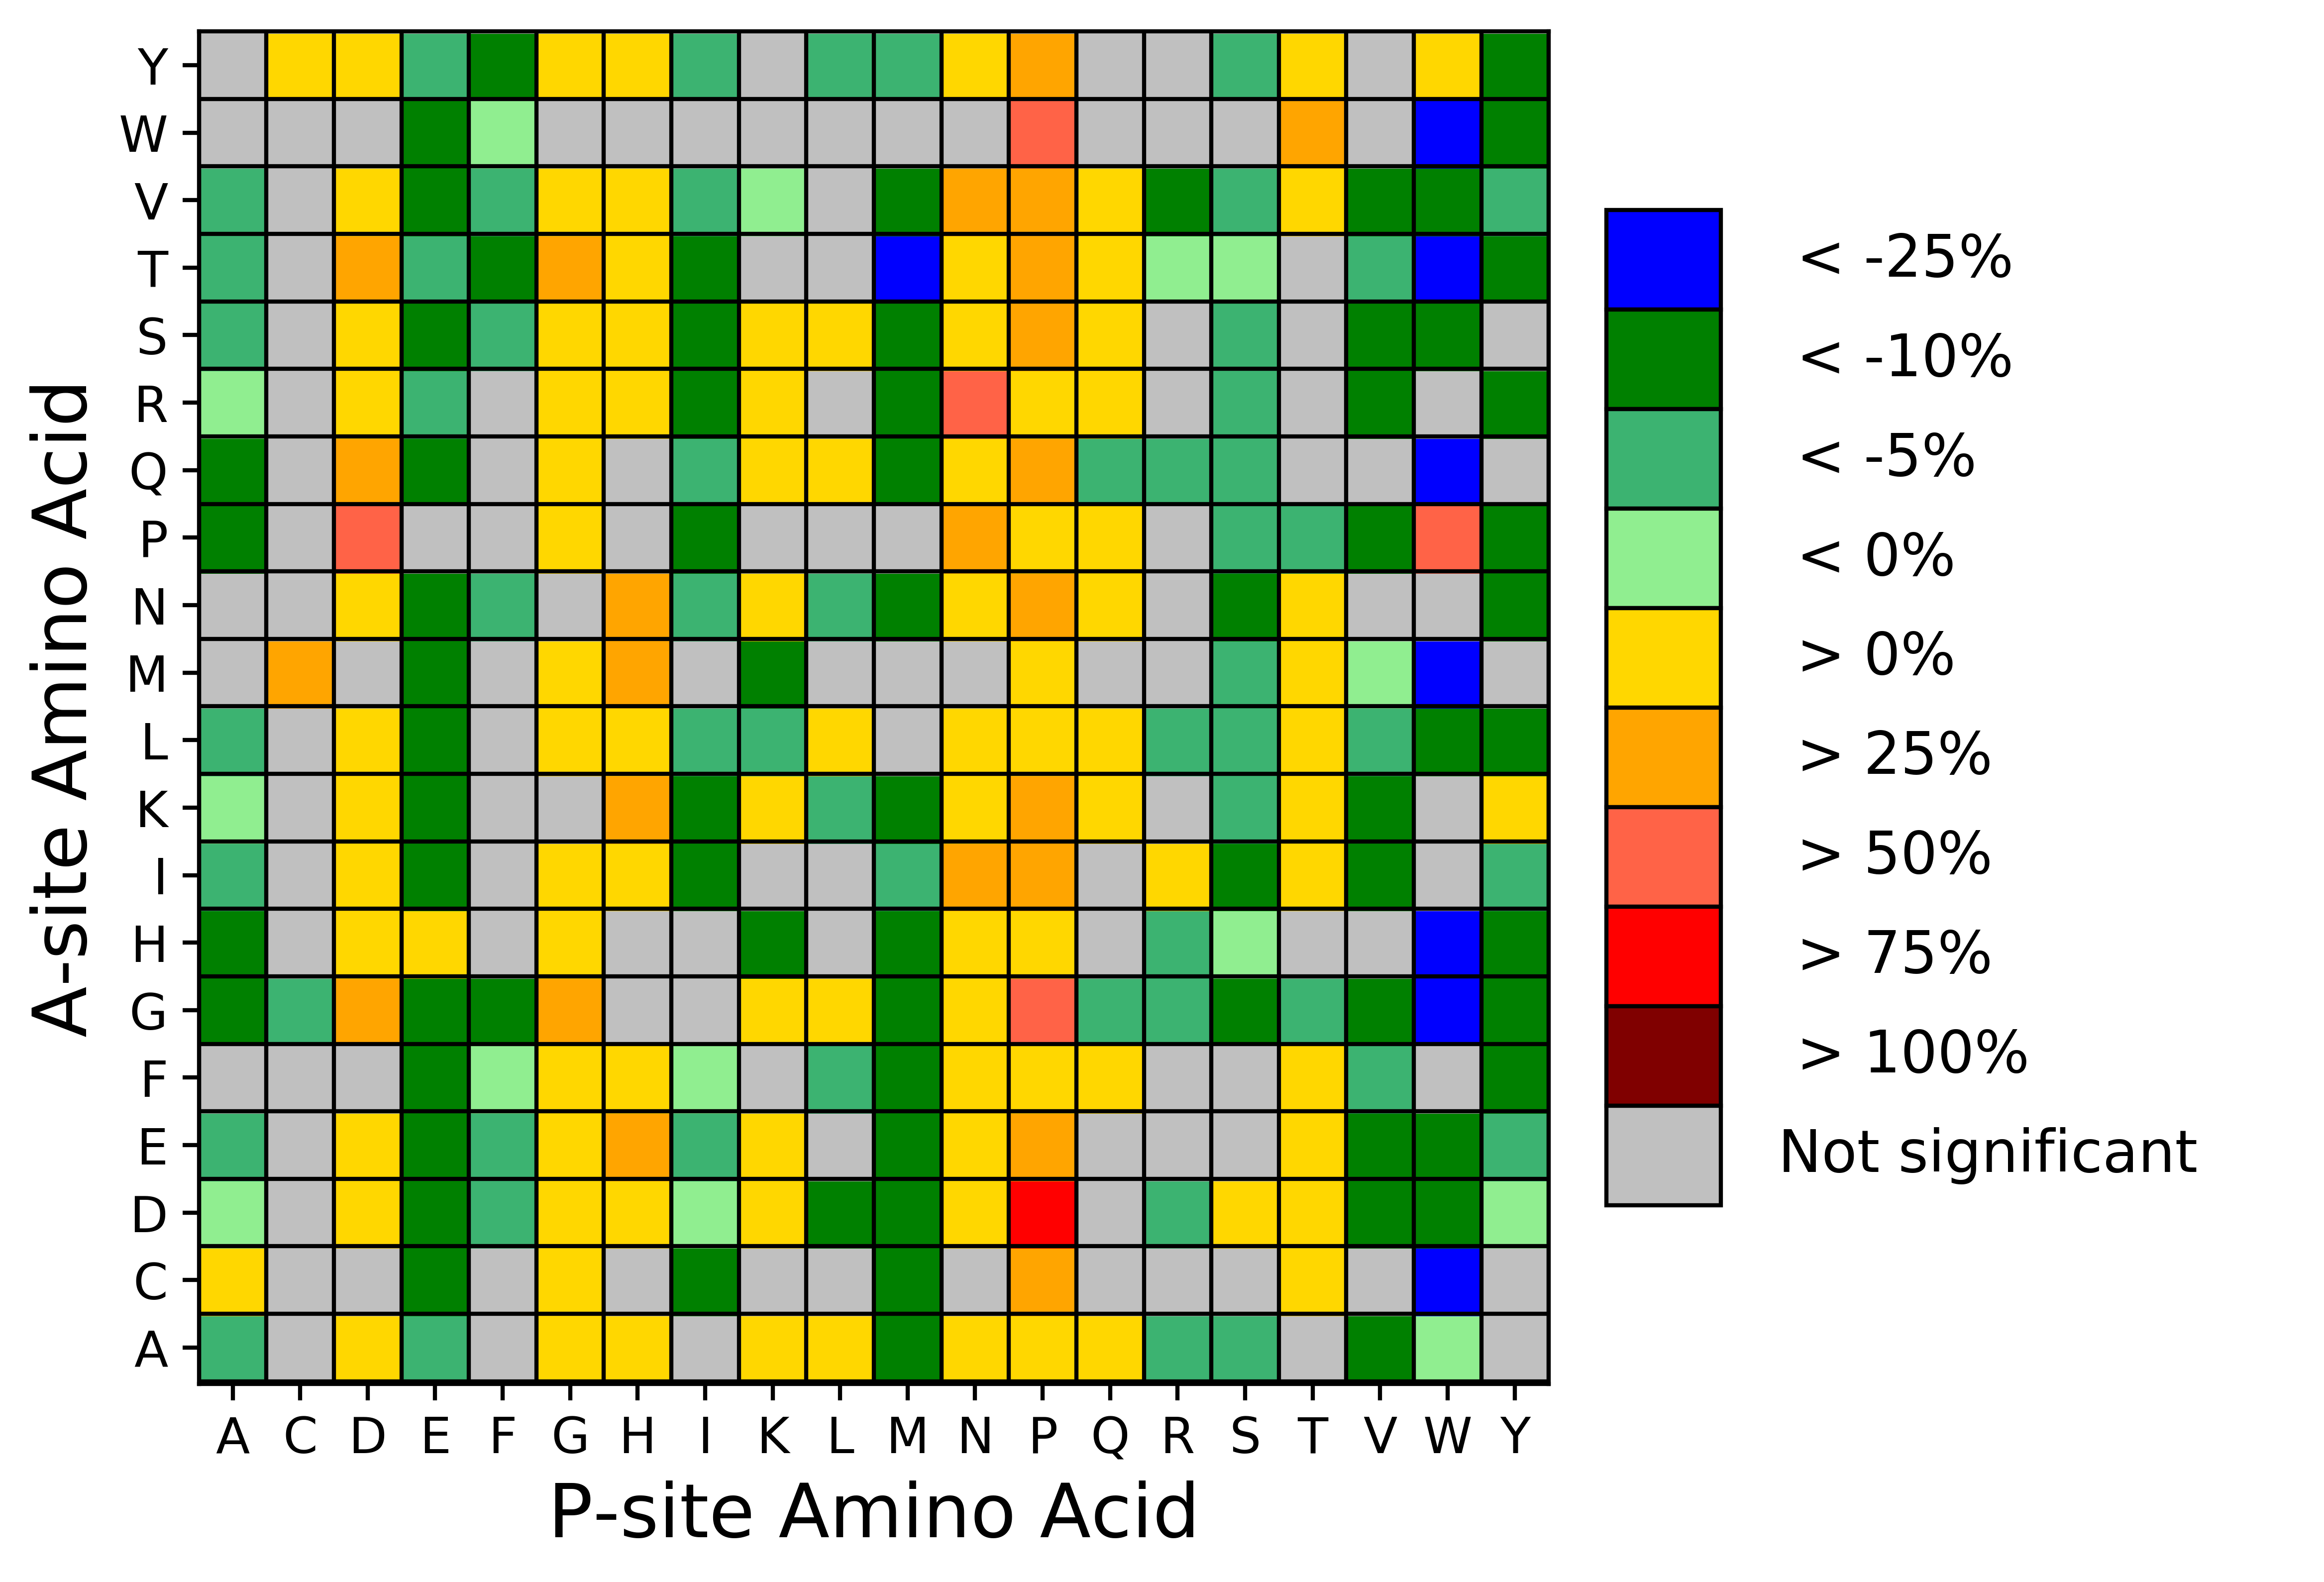

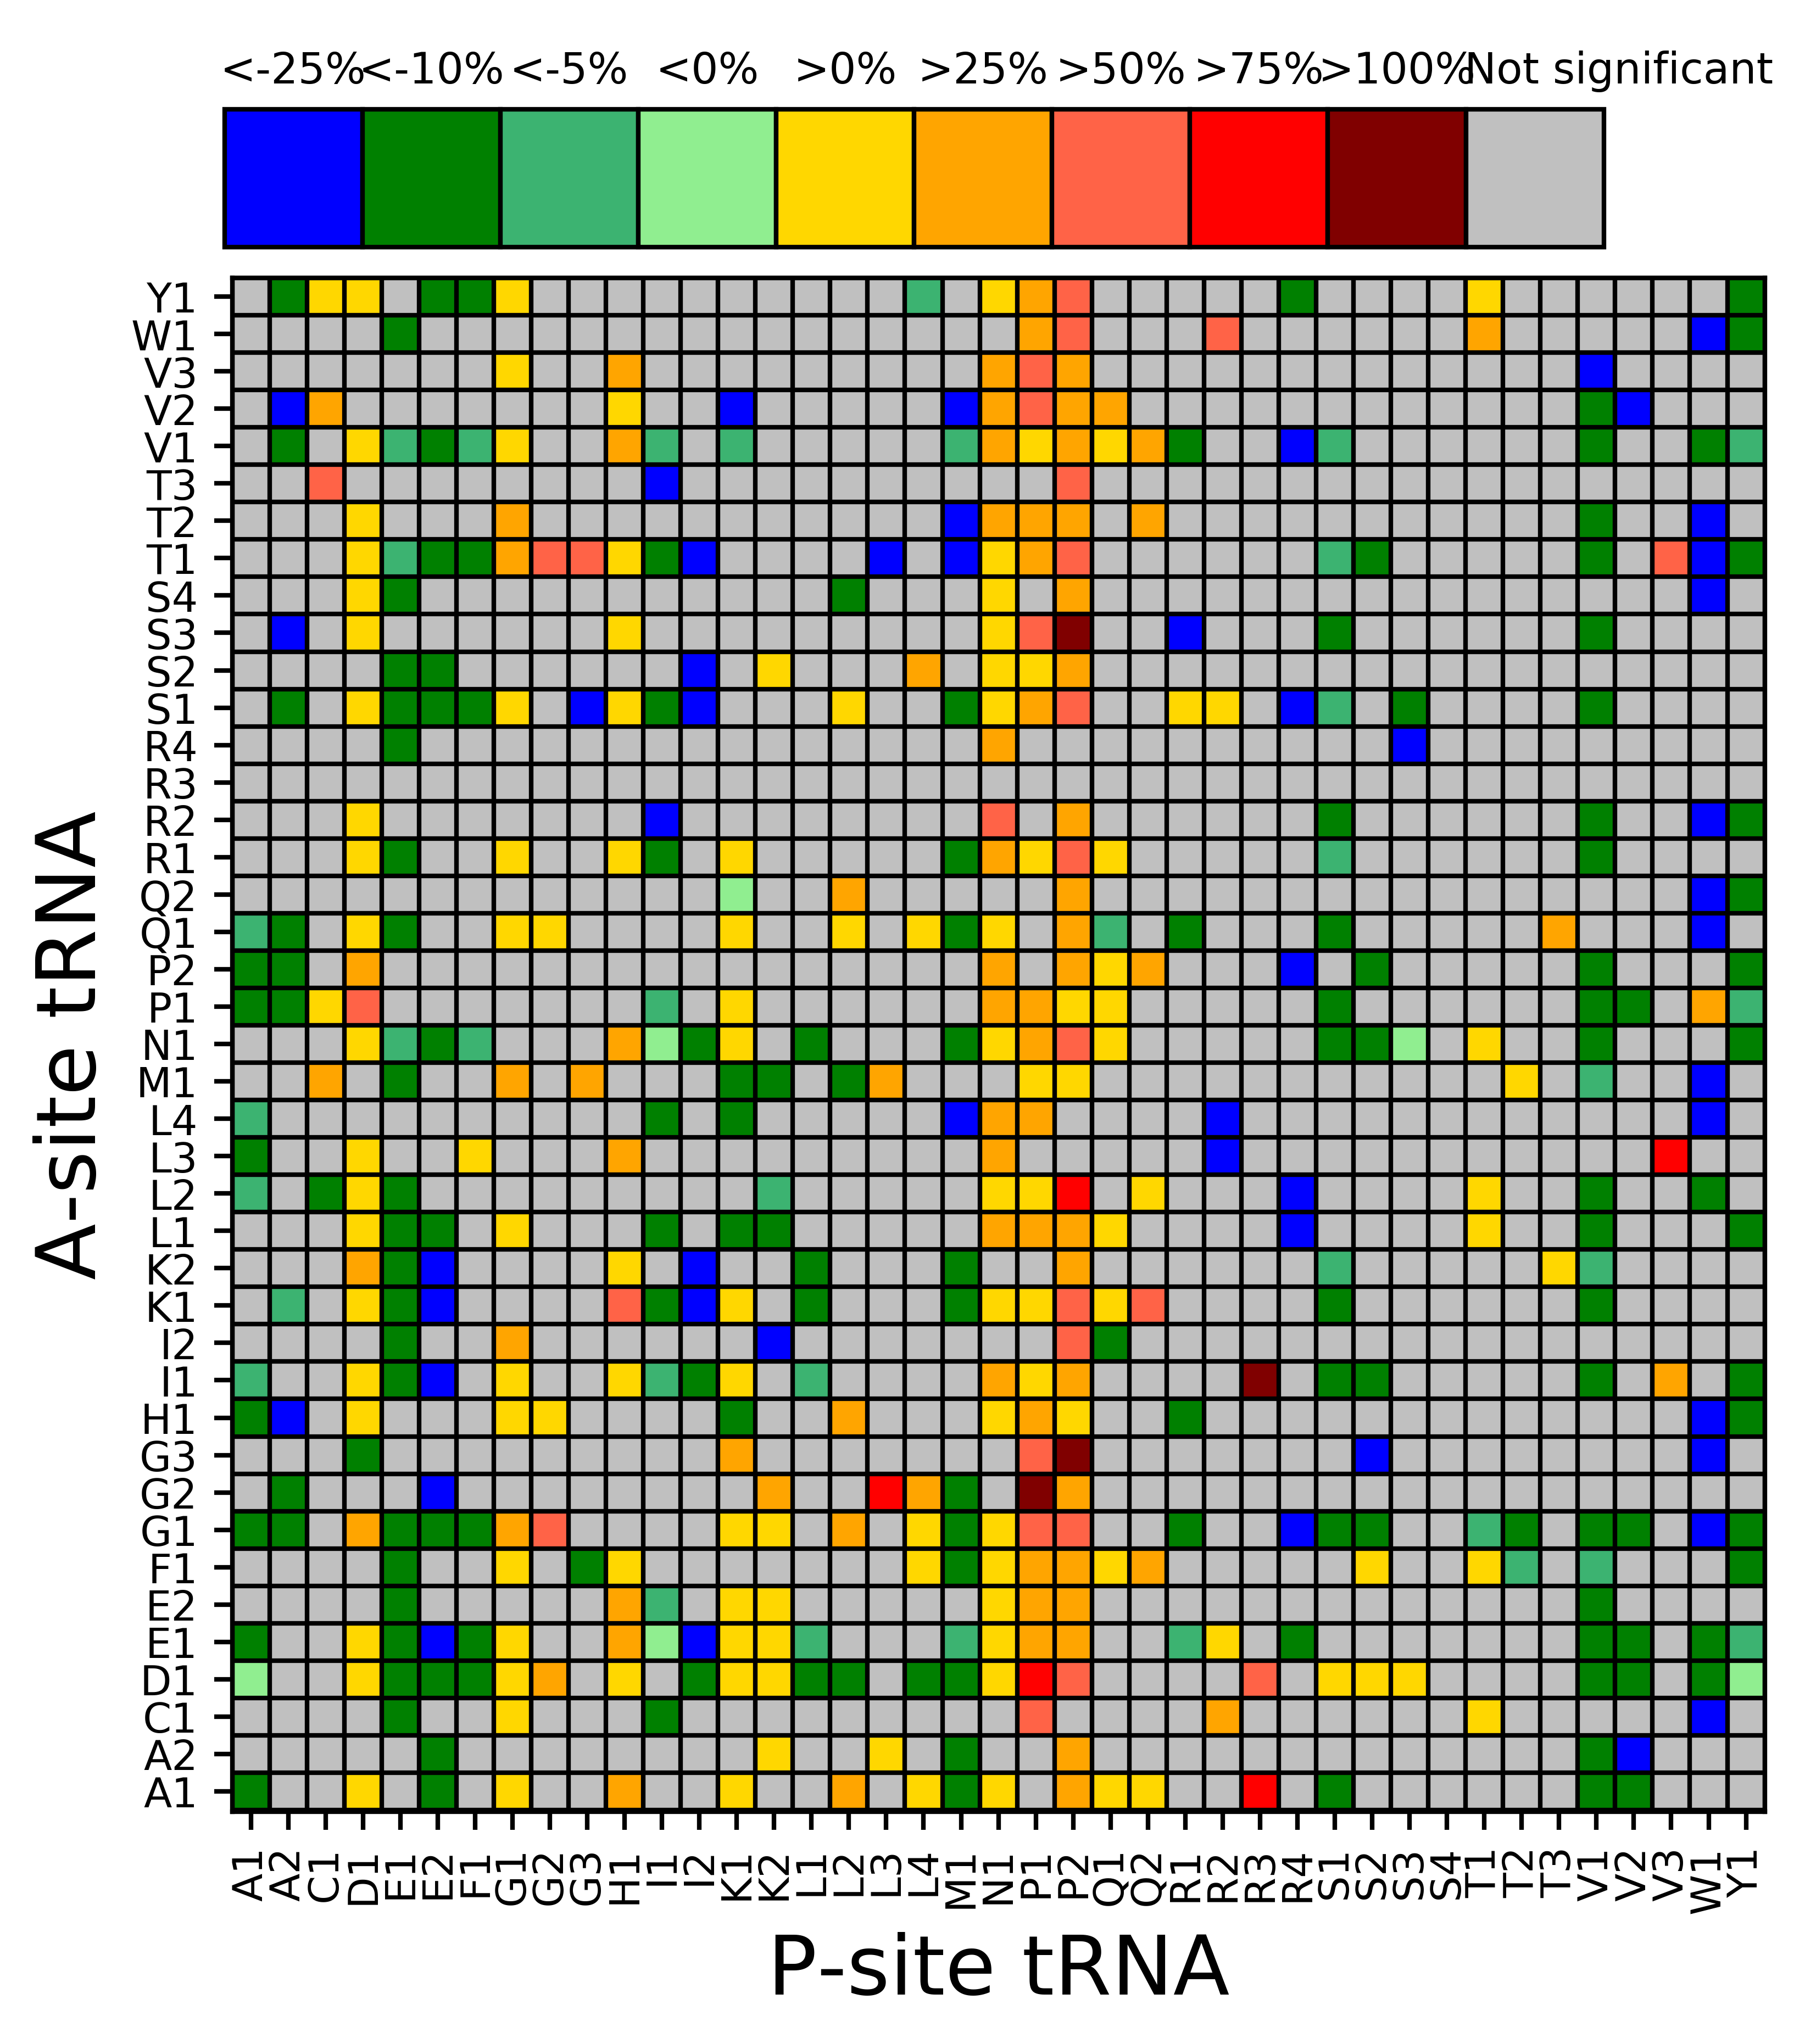


Done


In [67]:
#Read tRNA and amino acid matrix and create matrix figure
#matrix for tRNA
pair_data = {}
data_sets = dataset
# Get all plots of individual datasets to be plotted together as subpanels in Fig S1
plot_dict = {}

data_len = len(data_sets)
#file_pos = 0
input1 = path+'A_site_profile_file/matrix/'
files = os.listdir(input1)
print(files)
tRNA_matrix = list(range(data_len))
amino_aicd_matrix = list(range(data_len))
for file in files:
    if 'tRNA_level' in file:
        file_pos = 0
        for data in dataset:
            if data in file:
                tRNA_matrix[file_pos] = file
            else:
                file_pos+=1
                continue
        
    elif 'matrix_perc_change' in file:
        file_pos = 0
        for data in dataset:
            if data in file:
                amino_aicd_matrix[file_pos] = file
            else:
                file_pos+=1
                continue
        
    else:
        pass
    

#print(tRNA_matrix)
#print(amino_aicd_matrix)
#print(fb)
count = 0
#print(data_sets)
#new_list[]
#print(fd)
for datset in data_sets:
    pair_data[datset], perc_dict, pval_dict = parse_psite_matrix_info(input1+tRNA_matrix[count])
    count+=1
#print(db)
measure_robustness_of_pairs(pair_data, data_sets, threshold=threshold_value, control_factor='Not_controlled_for_any_factors_tRNA_matrix')


#matrix for amino acid
print('Matrix for amino acid')
pair_data_1 = {}
count = 0
for datset in data_sets:
    #print(datset)
    pair_data_1[datset], perc_dict_1, pval_dict_1 = parse_psite_matrix_info_amino_acid(input1+amino_aicd_matrix[count])
    count += 1

measure_robustness_of_pairs_amino_acid(pair_data_1, data_sets, threshold=threshold_value, control_factor='Not_controlled_for_any_factors_amino_acid_matrix')

threshold_value_str = str(threshold_value)
#file moves in folder
#print(db)
#file_move()
shutil.copyfile(path+'A_site_profile_file/robust_tRNA_matrix/Robust_aminoacid_pairs_Not_controlled_for_any_factors_tRNA_matrix_'+threshold_value_str+'_datasets.tab',
                path+'A_site_profile_file/robust_tRNA_matrix/robust_all_not_filtered.tab')

#filter tab files
#print(bdf)
robust_file_name = tab_file_filter(
    path+'A_site_profile_file/robust_tRNA_matrix/Robust_aminoacid_pairs_Not_controlled_for_any_factors_tRNA_matrix_'+threshold_value_str+'_datasets.tab')
#print(bf)
#create matrix fig for amino acid and tRNA
matrix_fig()

print ('\nDone')